# Parameters

In [4]:
datasets = ['yago3-10', 'codex-m', 'wnrr', 'fb15k-237', 'wn18']
symbolic_models = [('anyburl', 'AnyBURL')]
subsymbolic_models = [('complex', 'ComplEx'), ('rescal', 'RESCAL')]

bp_threshold = 15

# Imports

In [5]:
%run utils.ipynb
%run graphs.ipynb
%run format_predictions.ipynb

from matplotlib.backends.backend_pdf import PdfPages
import os
import pandas as pd

# Analysis

Working on yago3-10 - AnyBURL - ComplEx


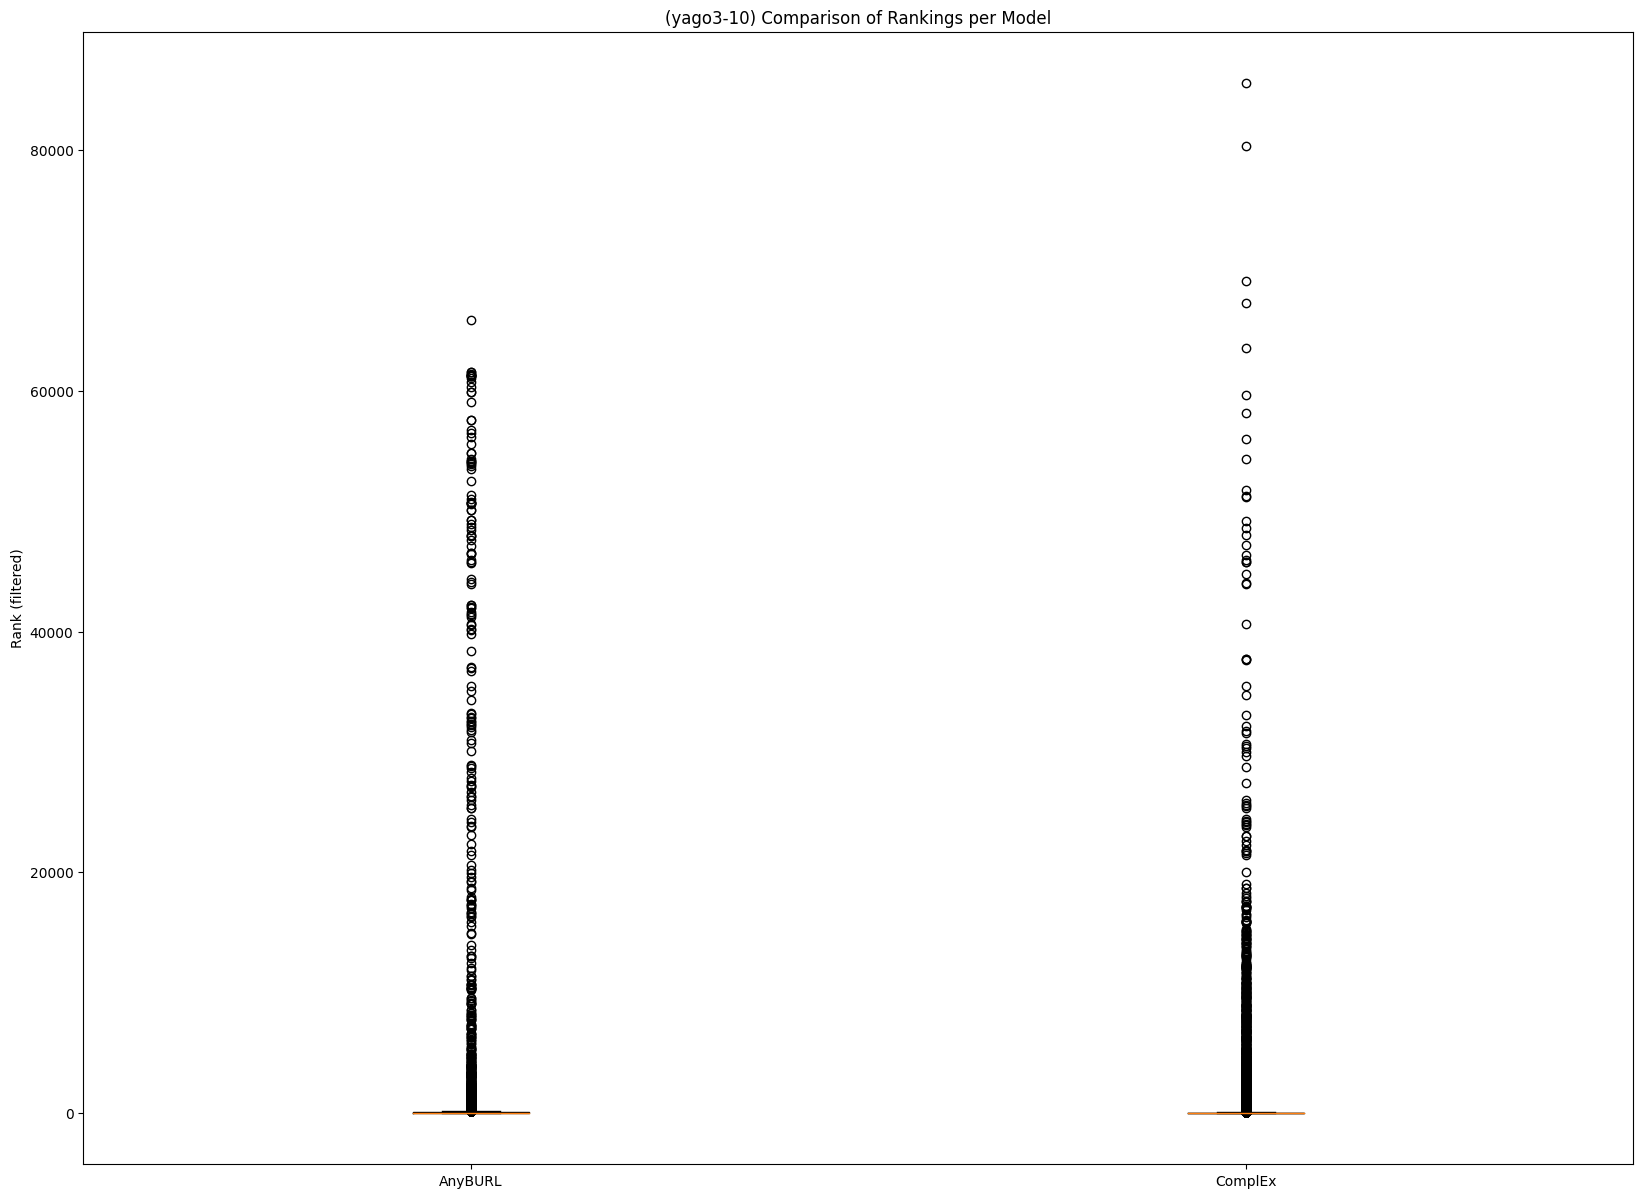

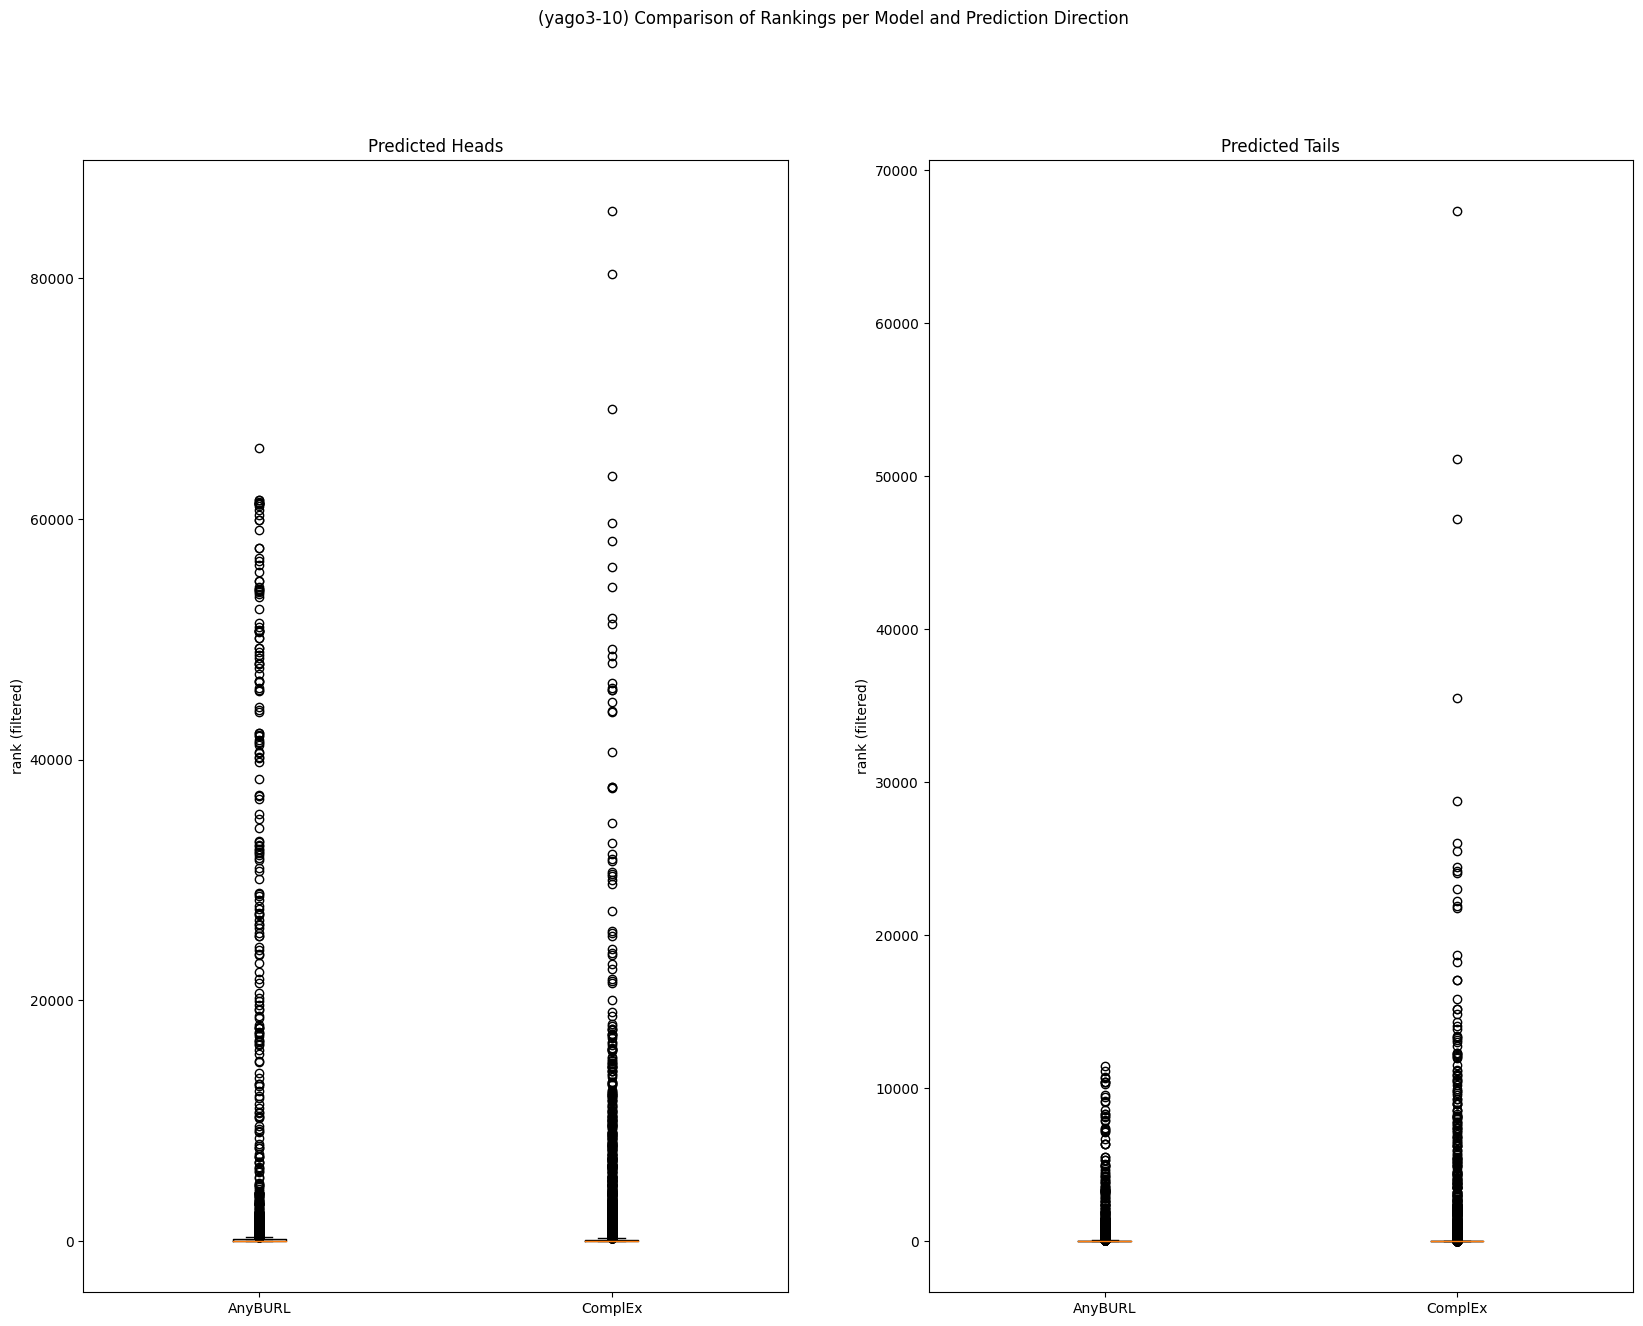

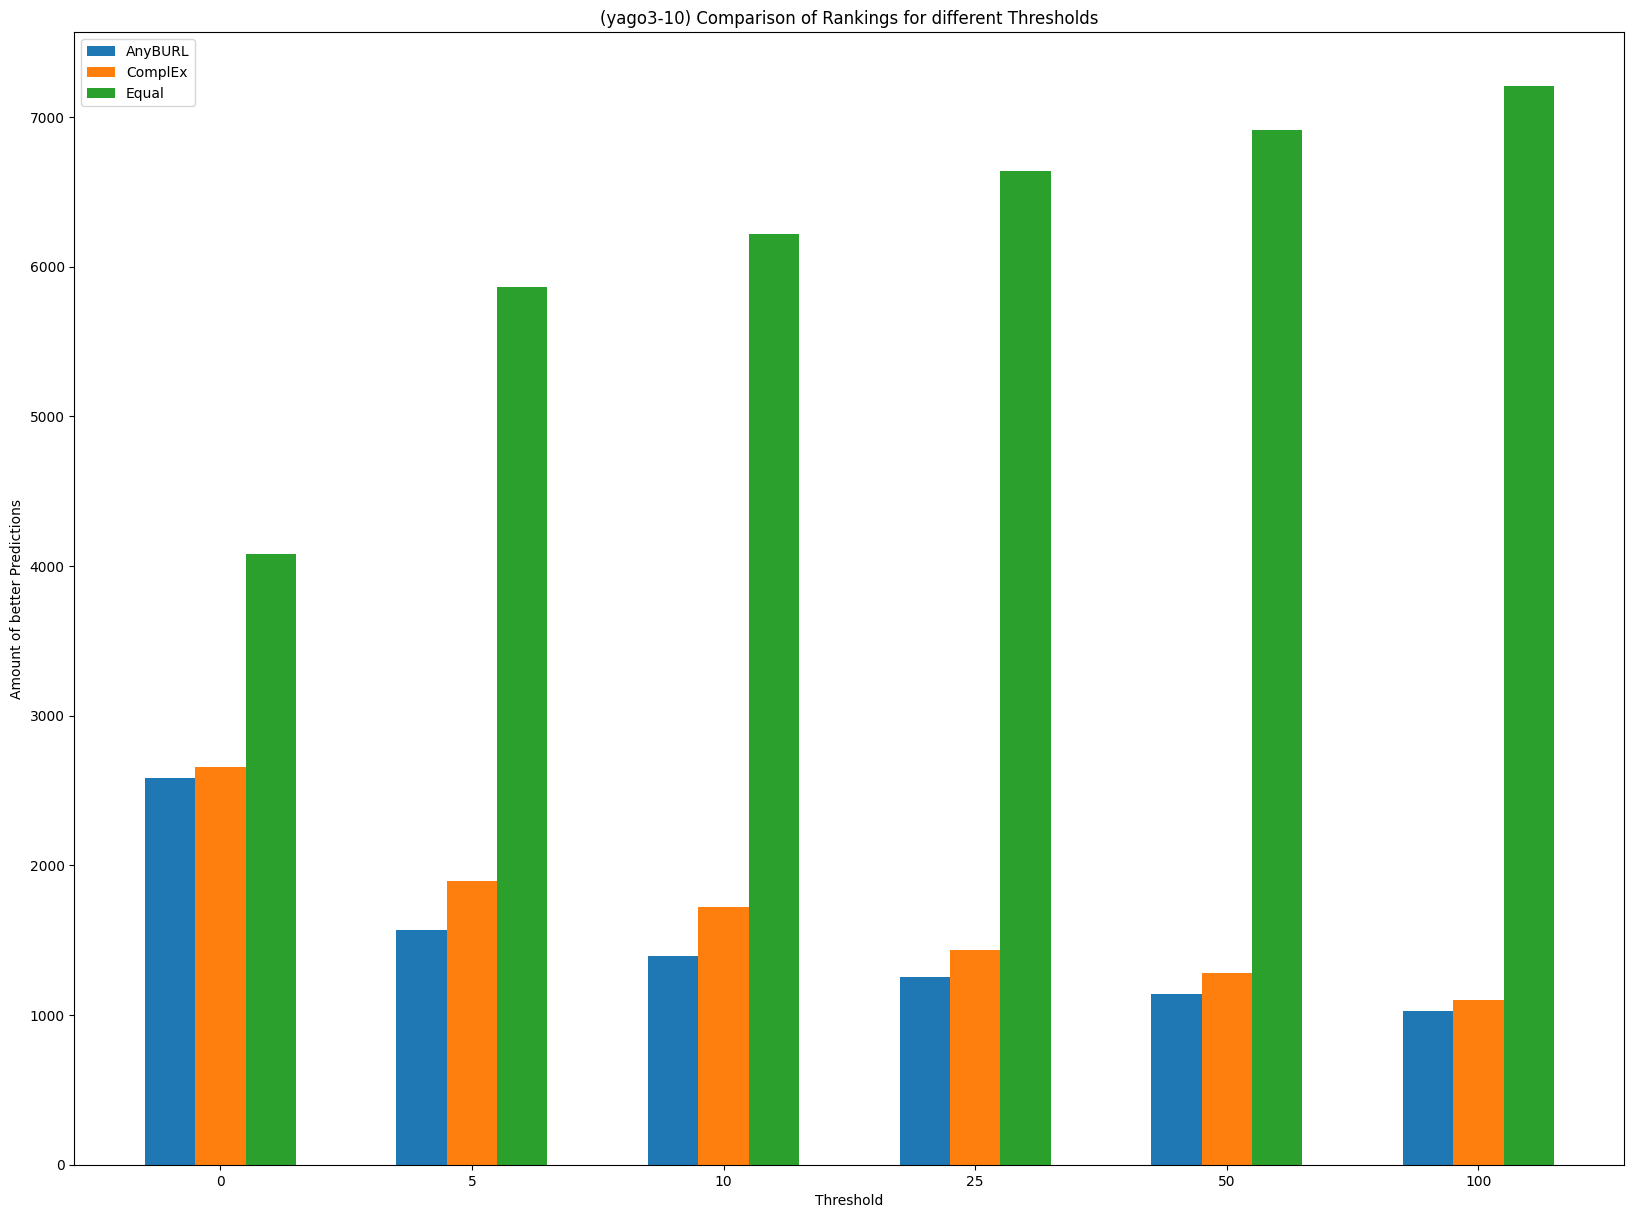

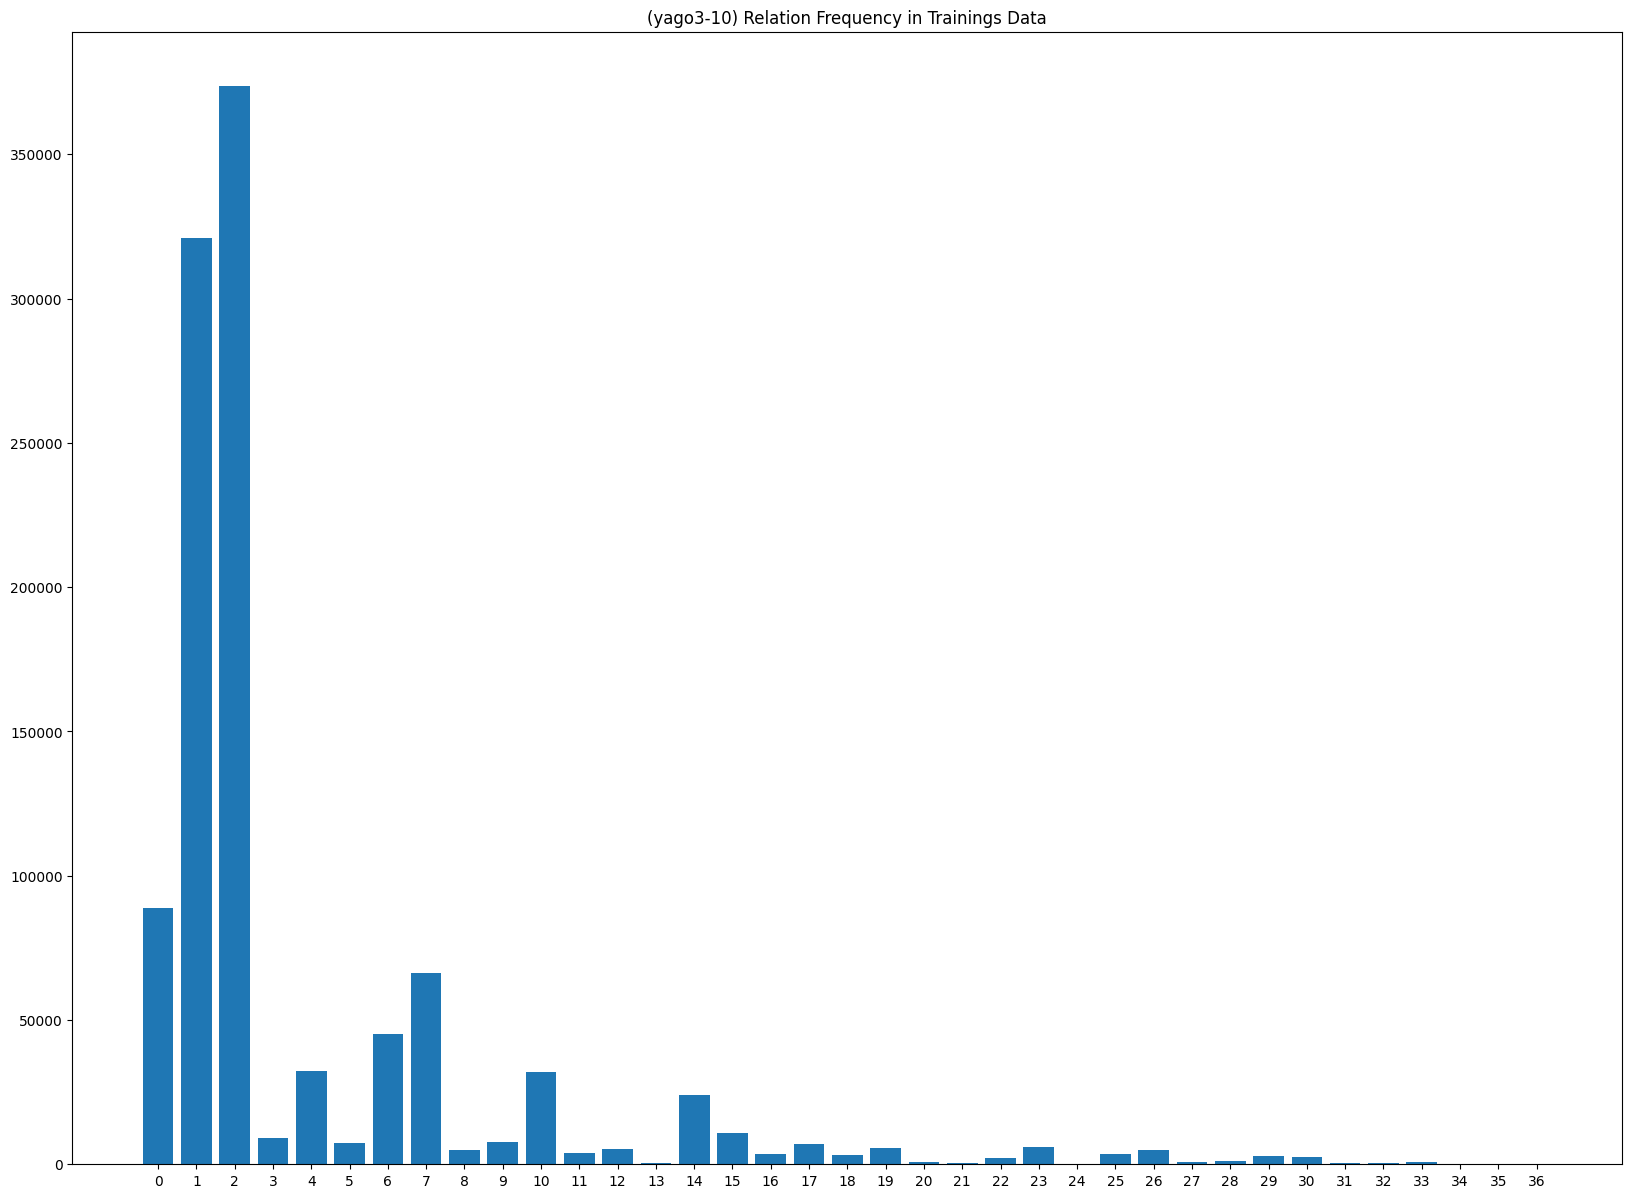

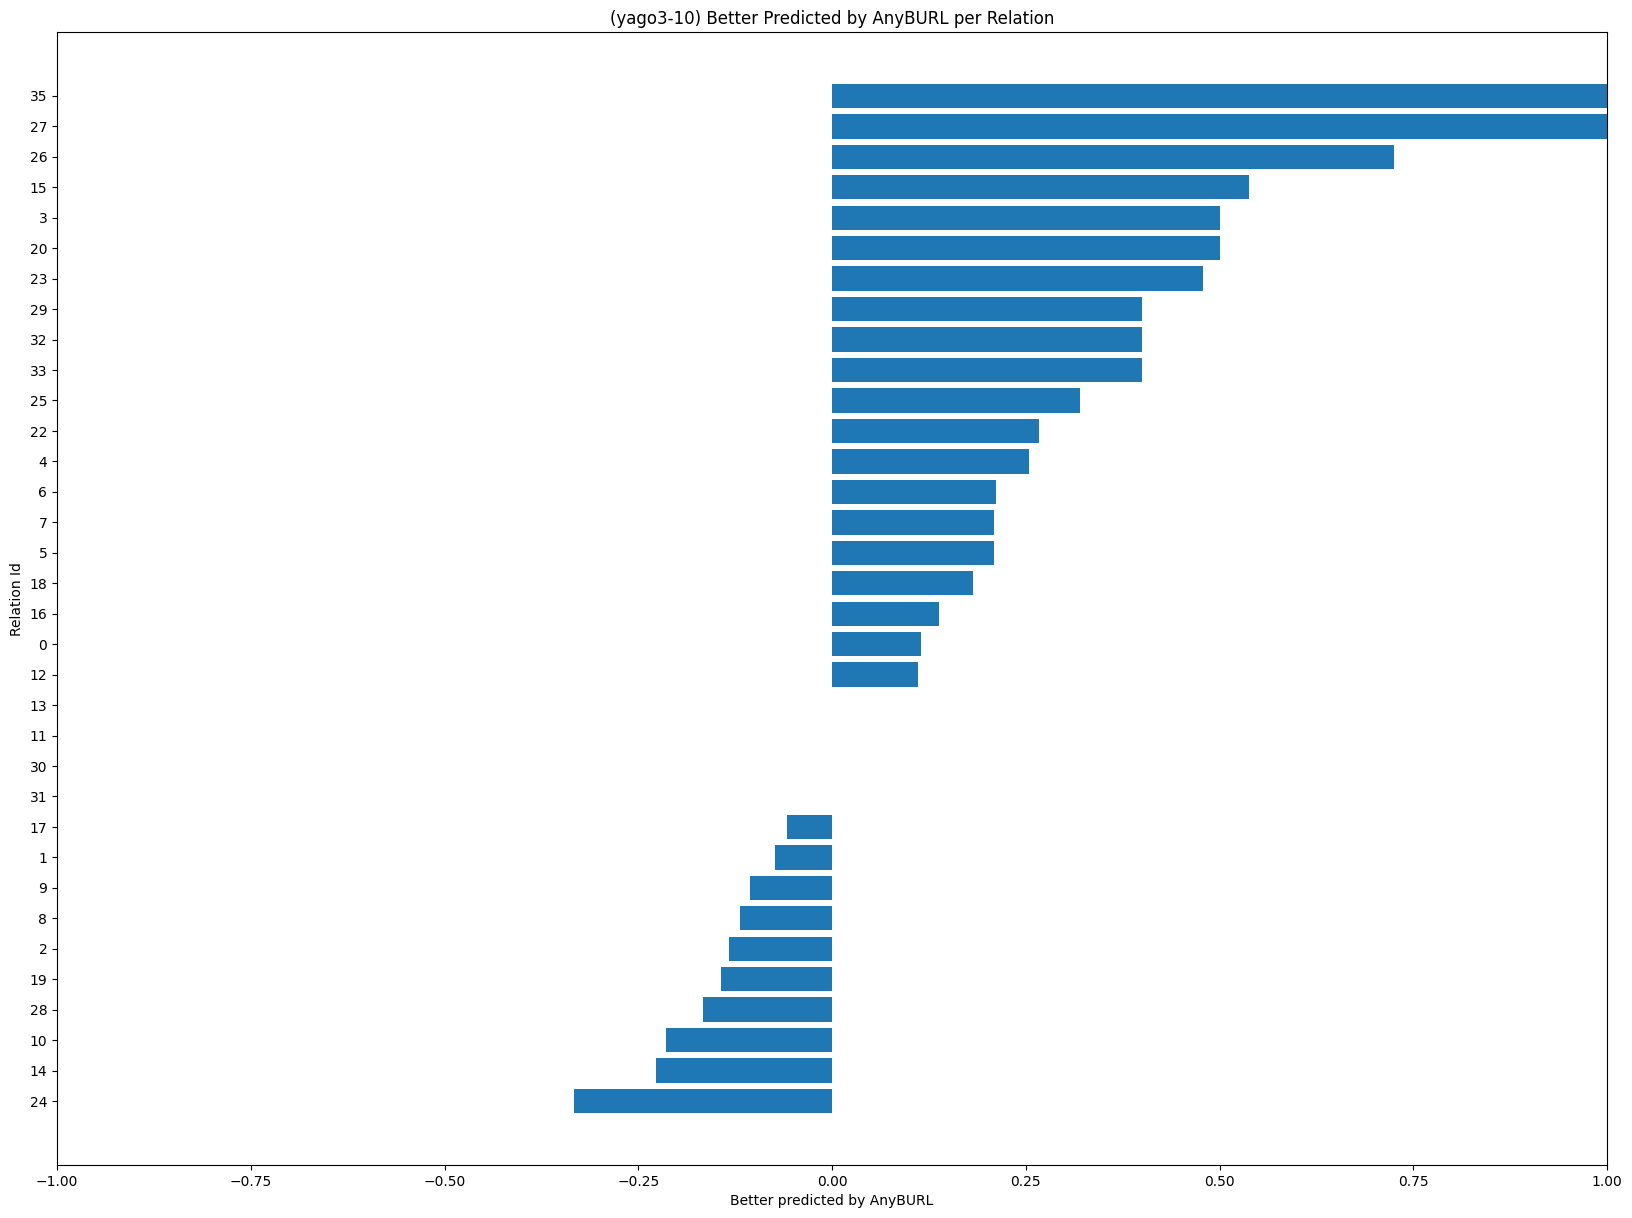

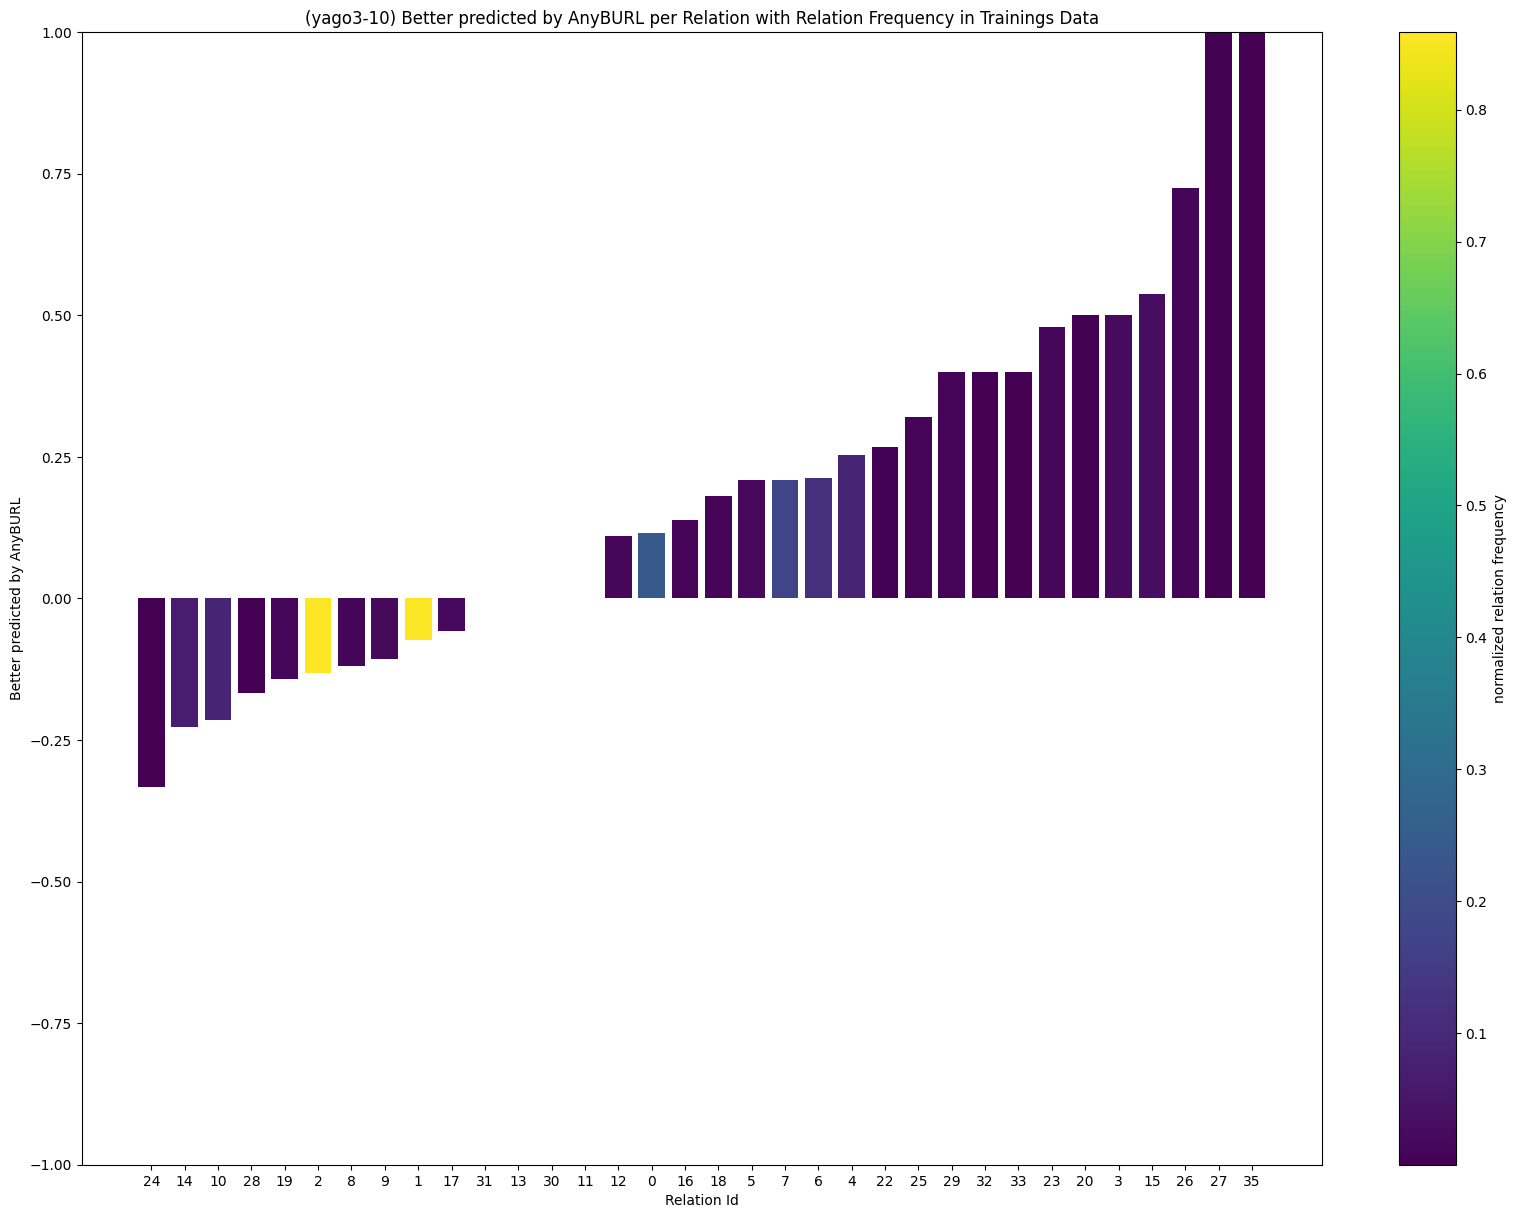

Loading configuration of dataset yago3-10 from d:\files\git\kge\data\yago3-10 ...
Setting complex.entity_embedder.dropout to 0., was set to -0.3128825817257166.
Loaded 37 keys from map relation_strings
  306439 distinct sp pairs in train
  85683 distinct po pairs in train


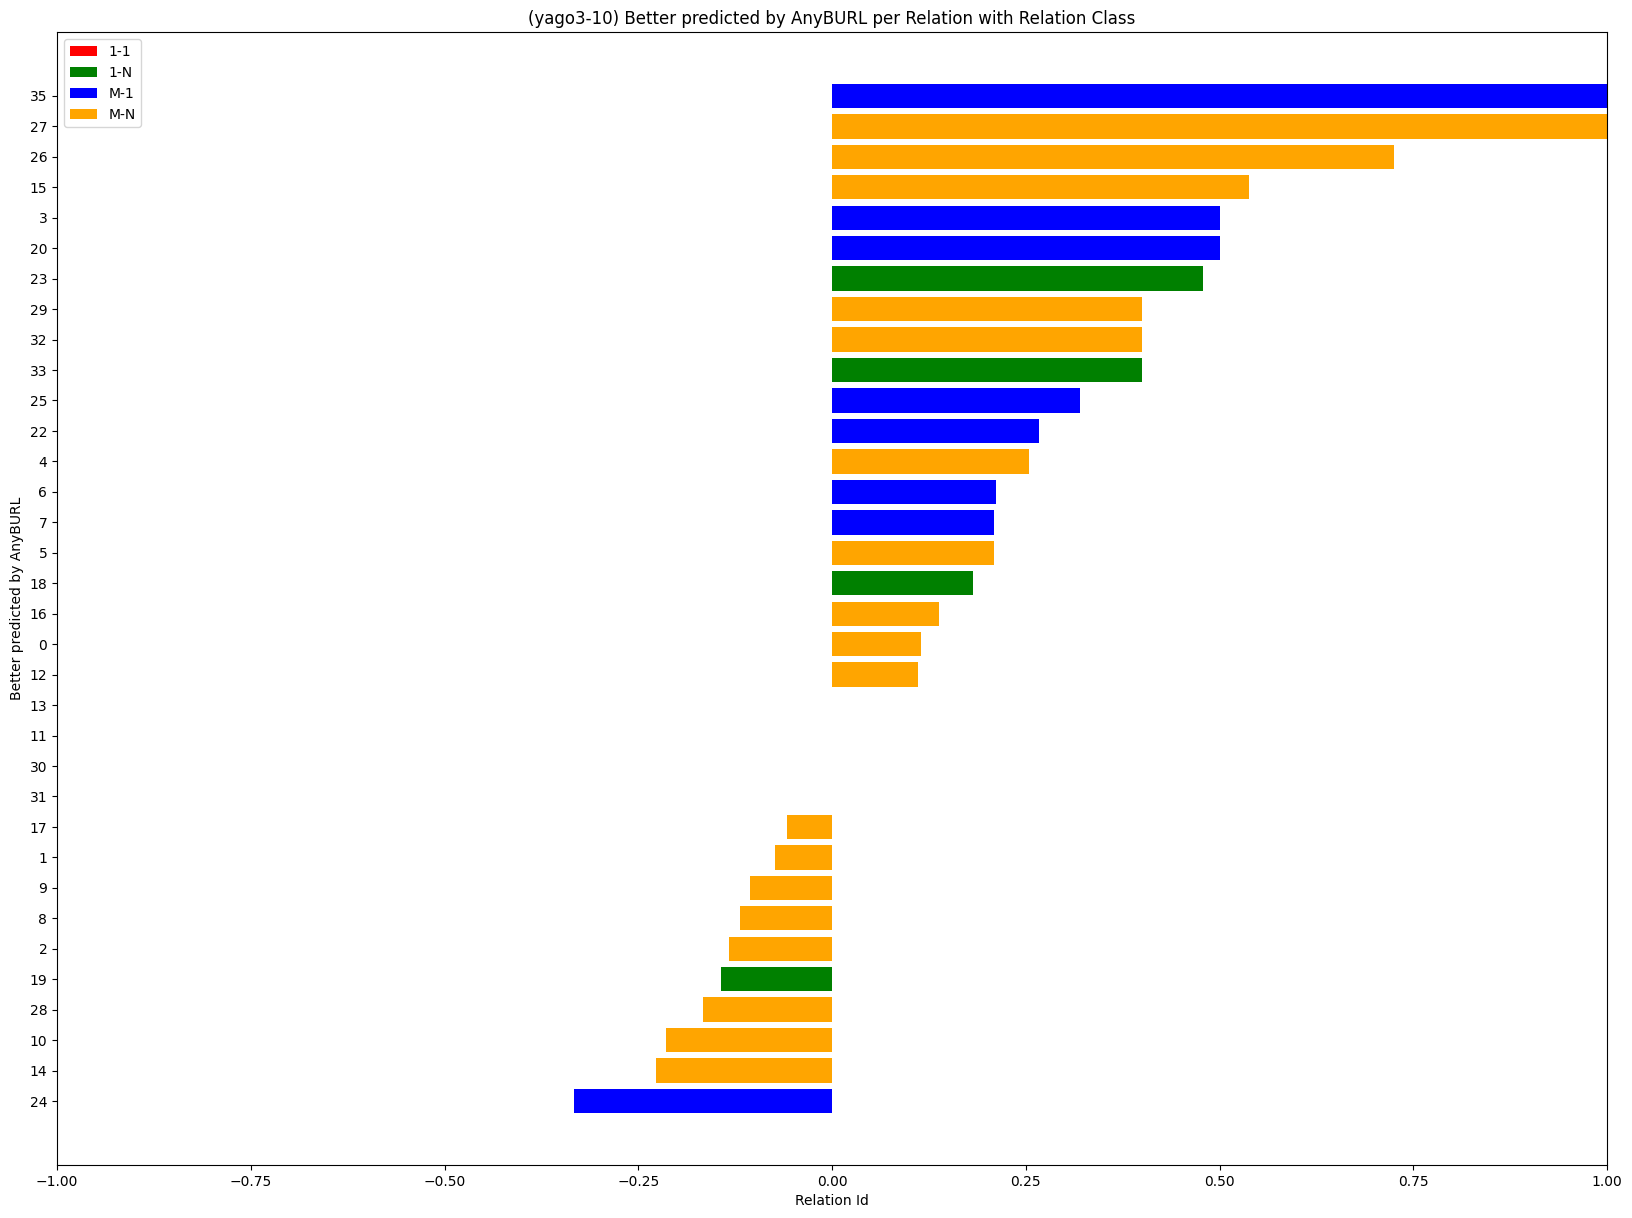

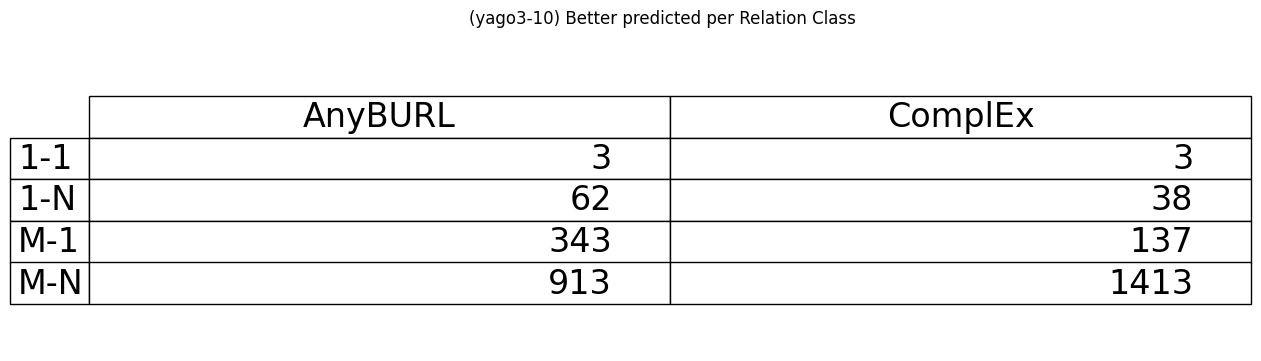

Working on yago3-10 - AnyBURL - RESCAL


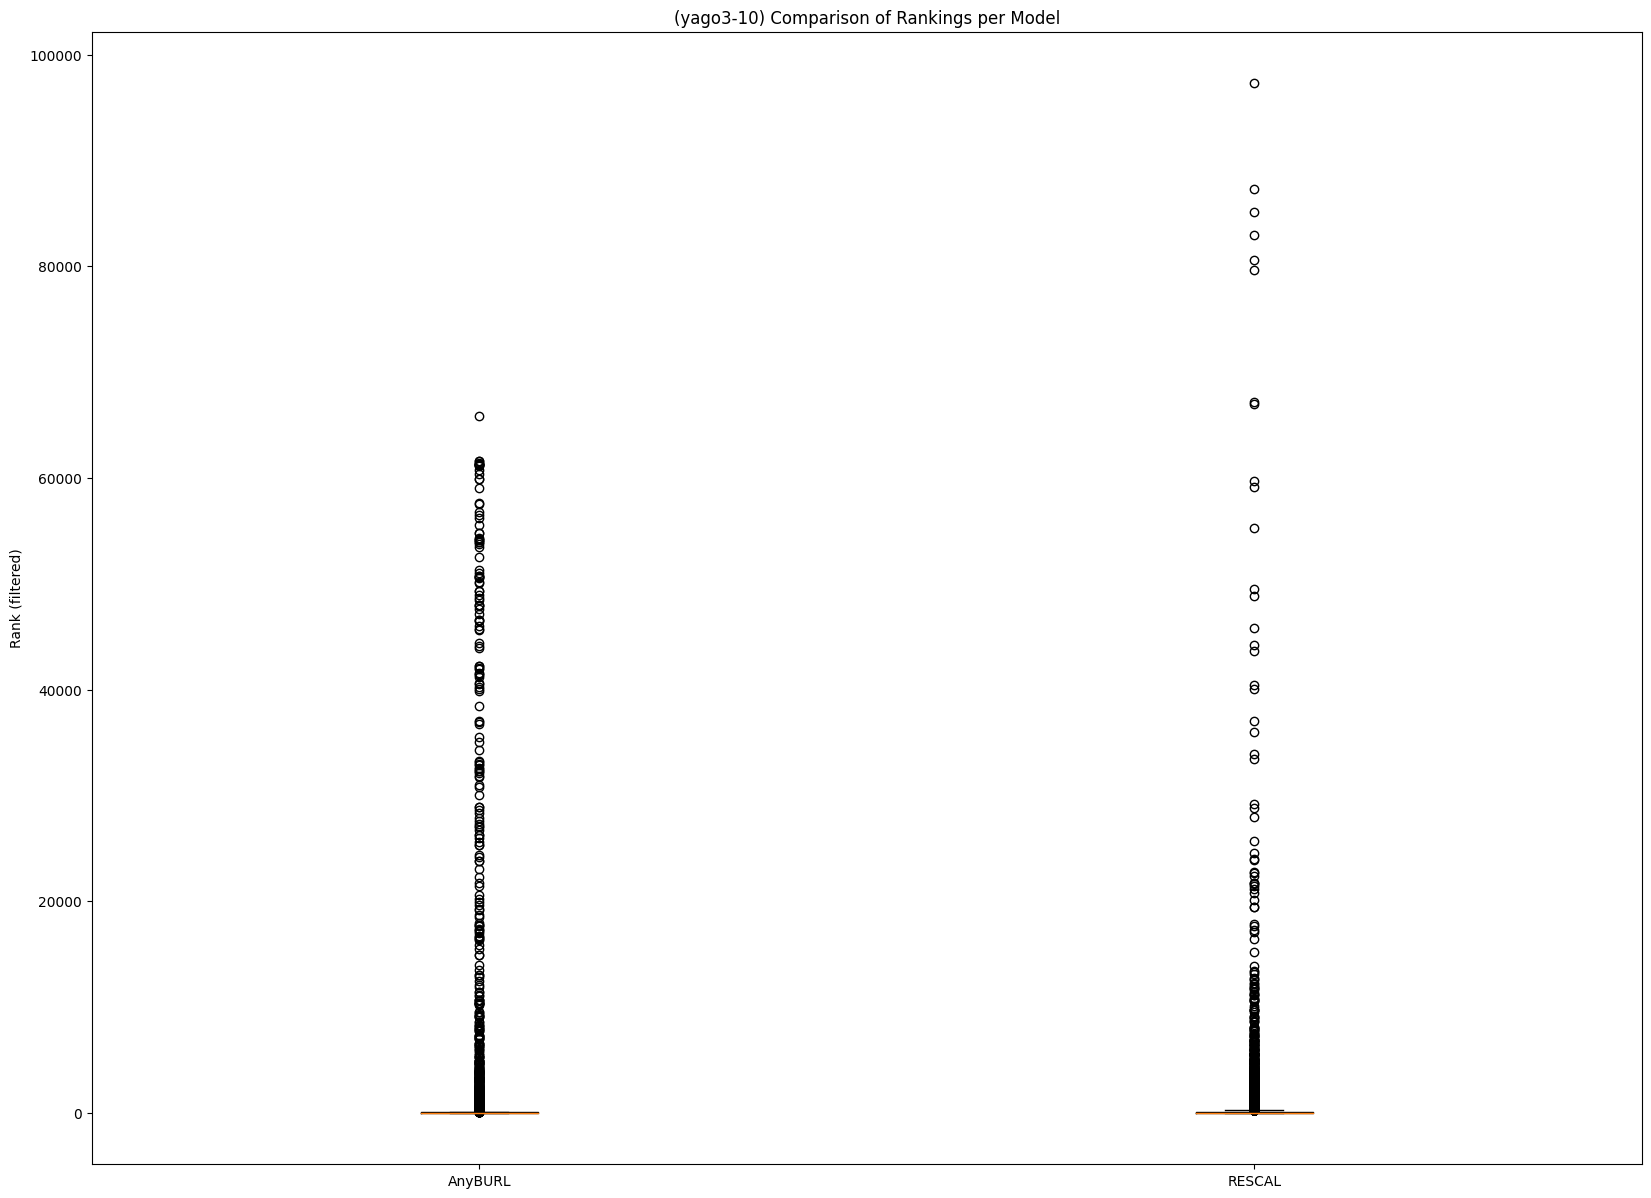

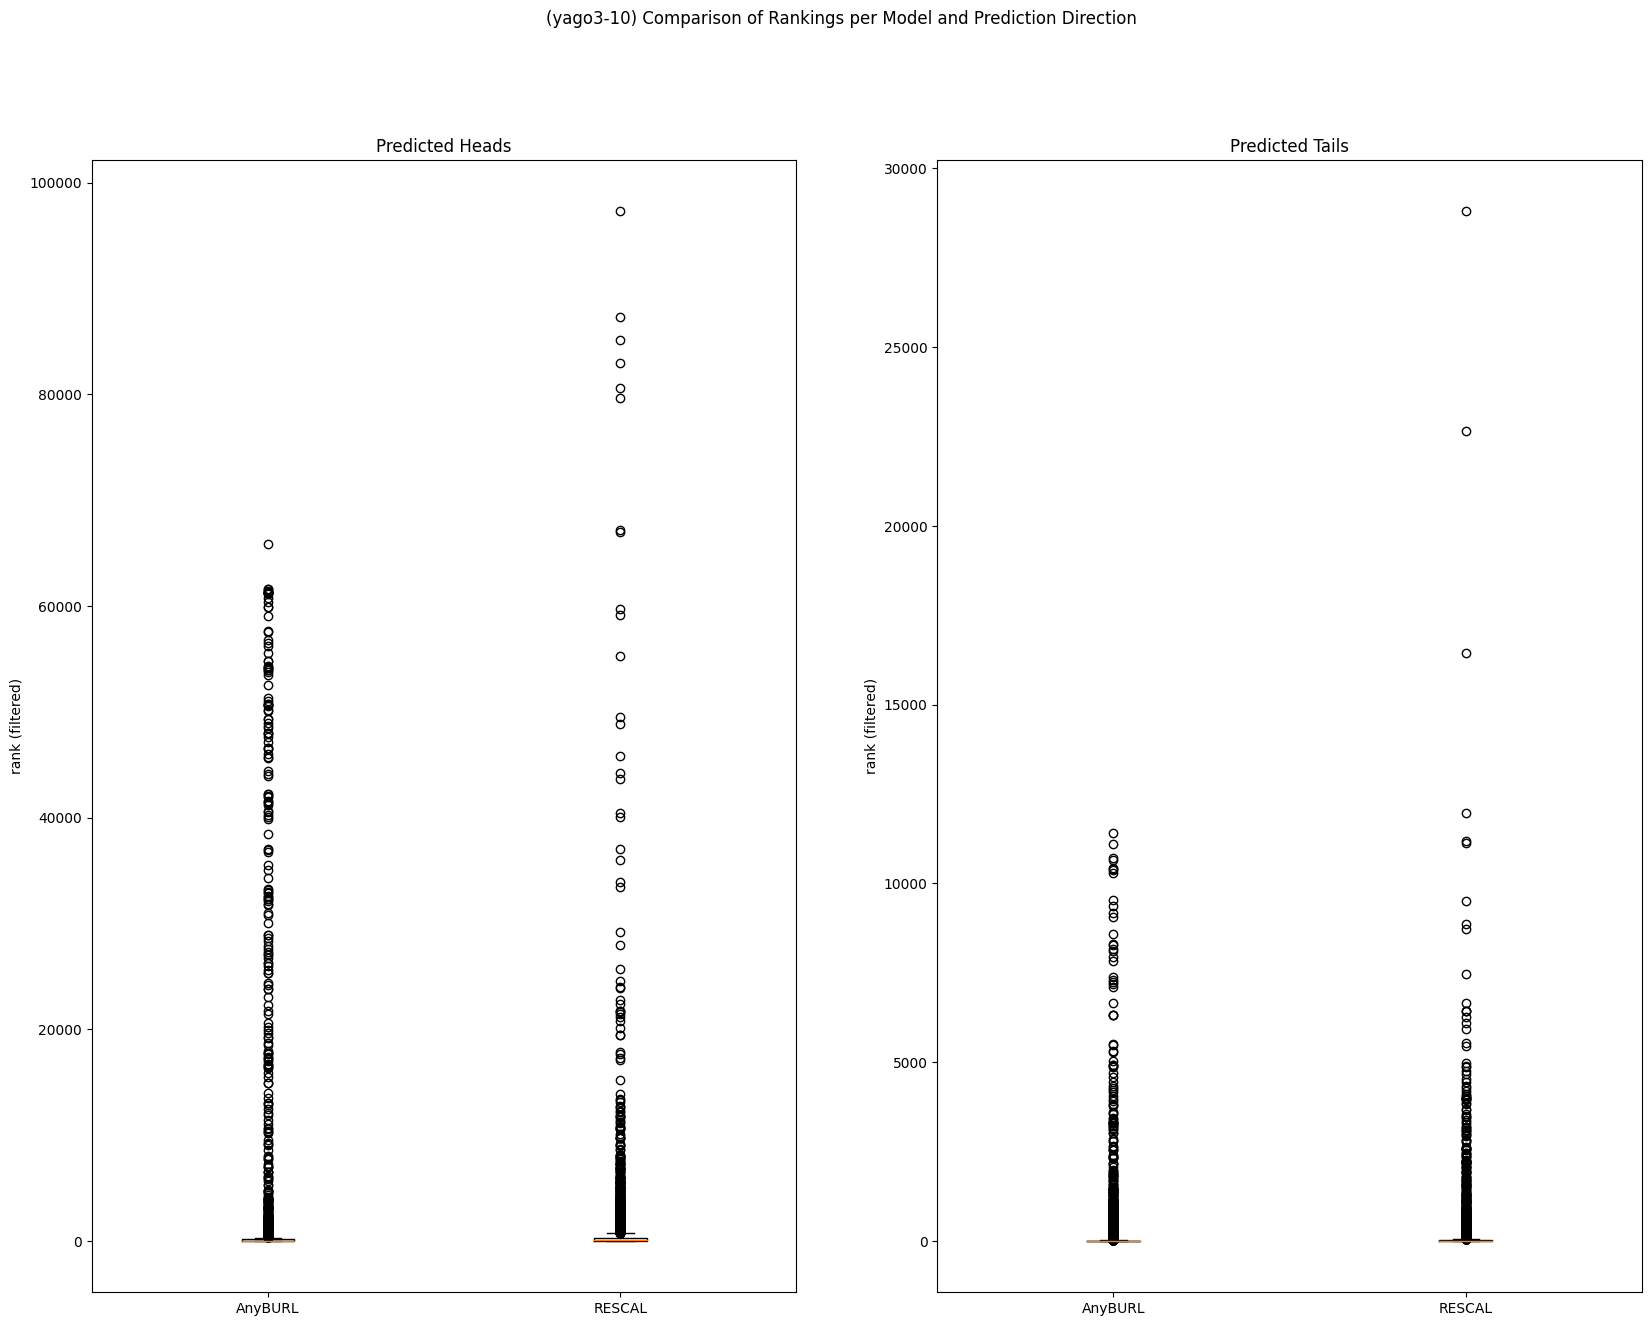

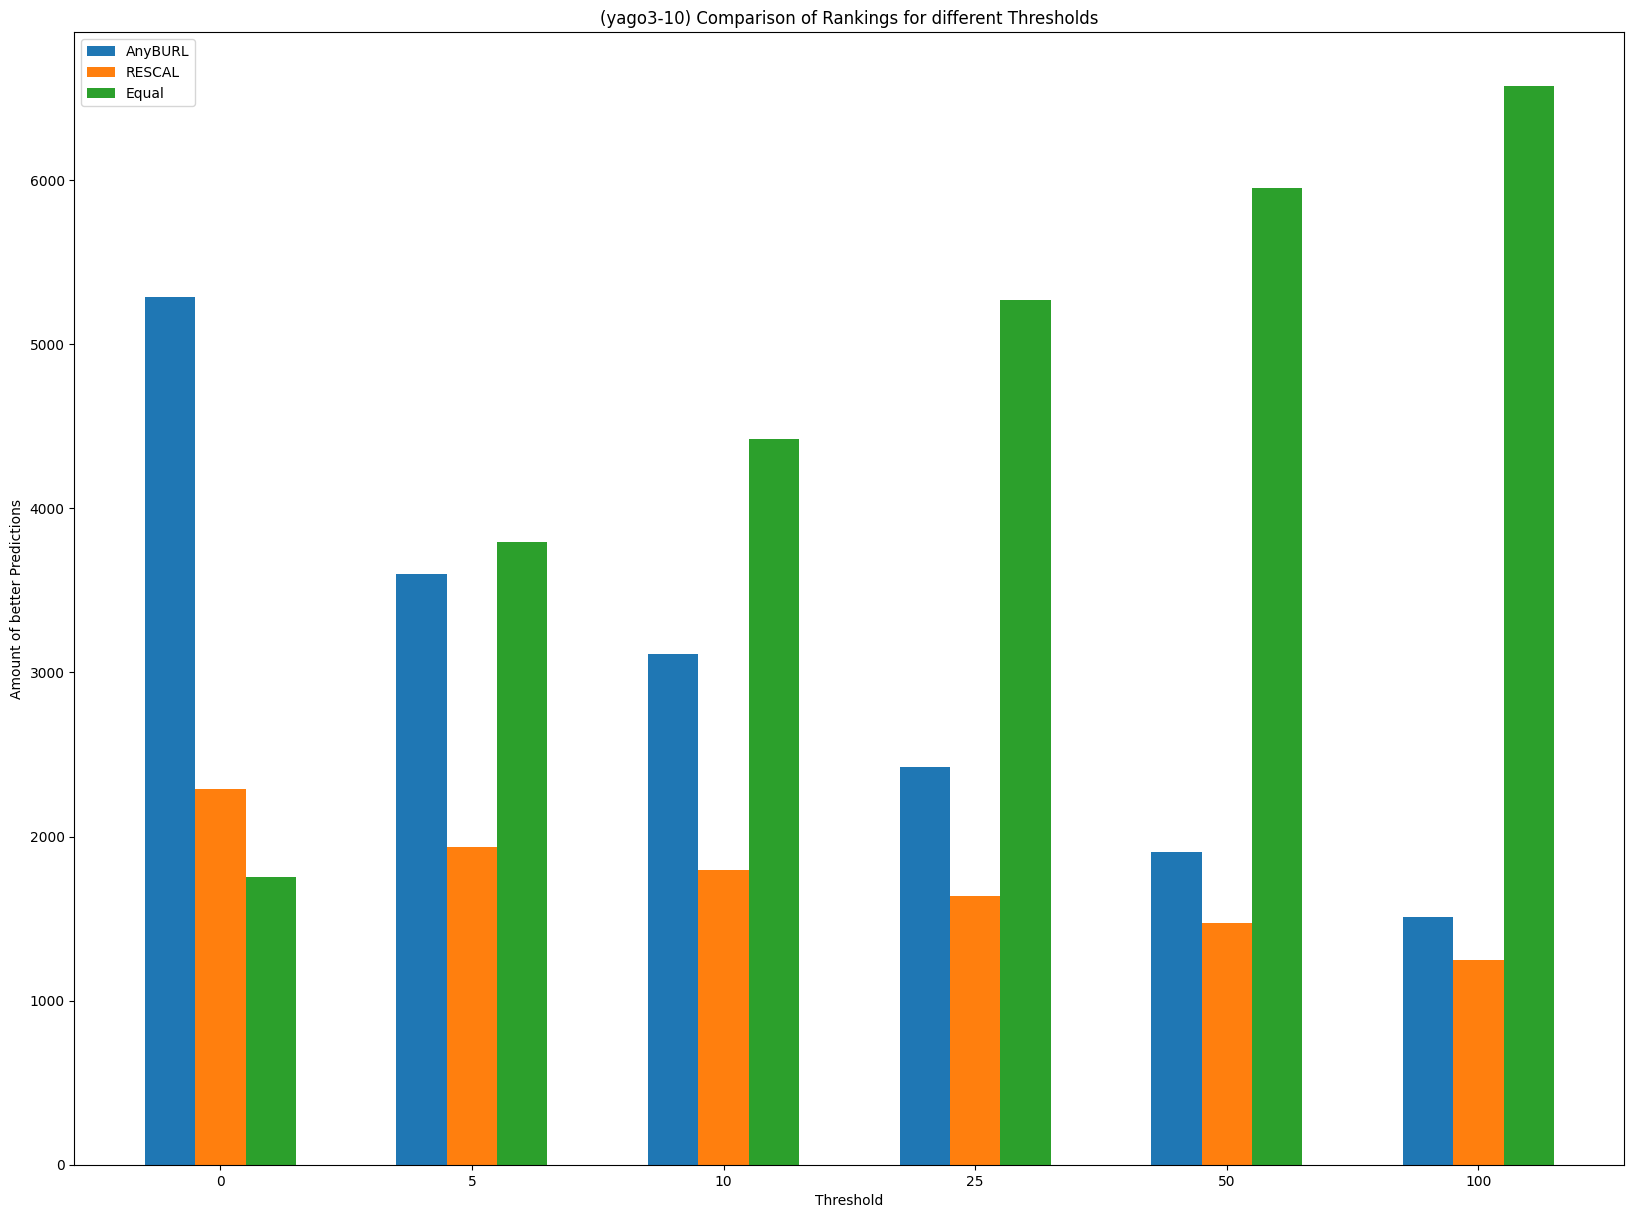

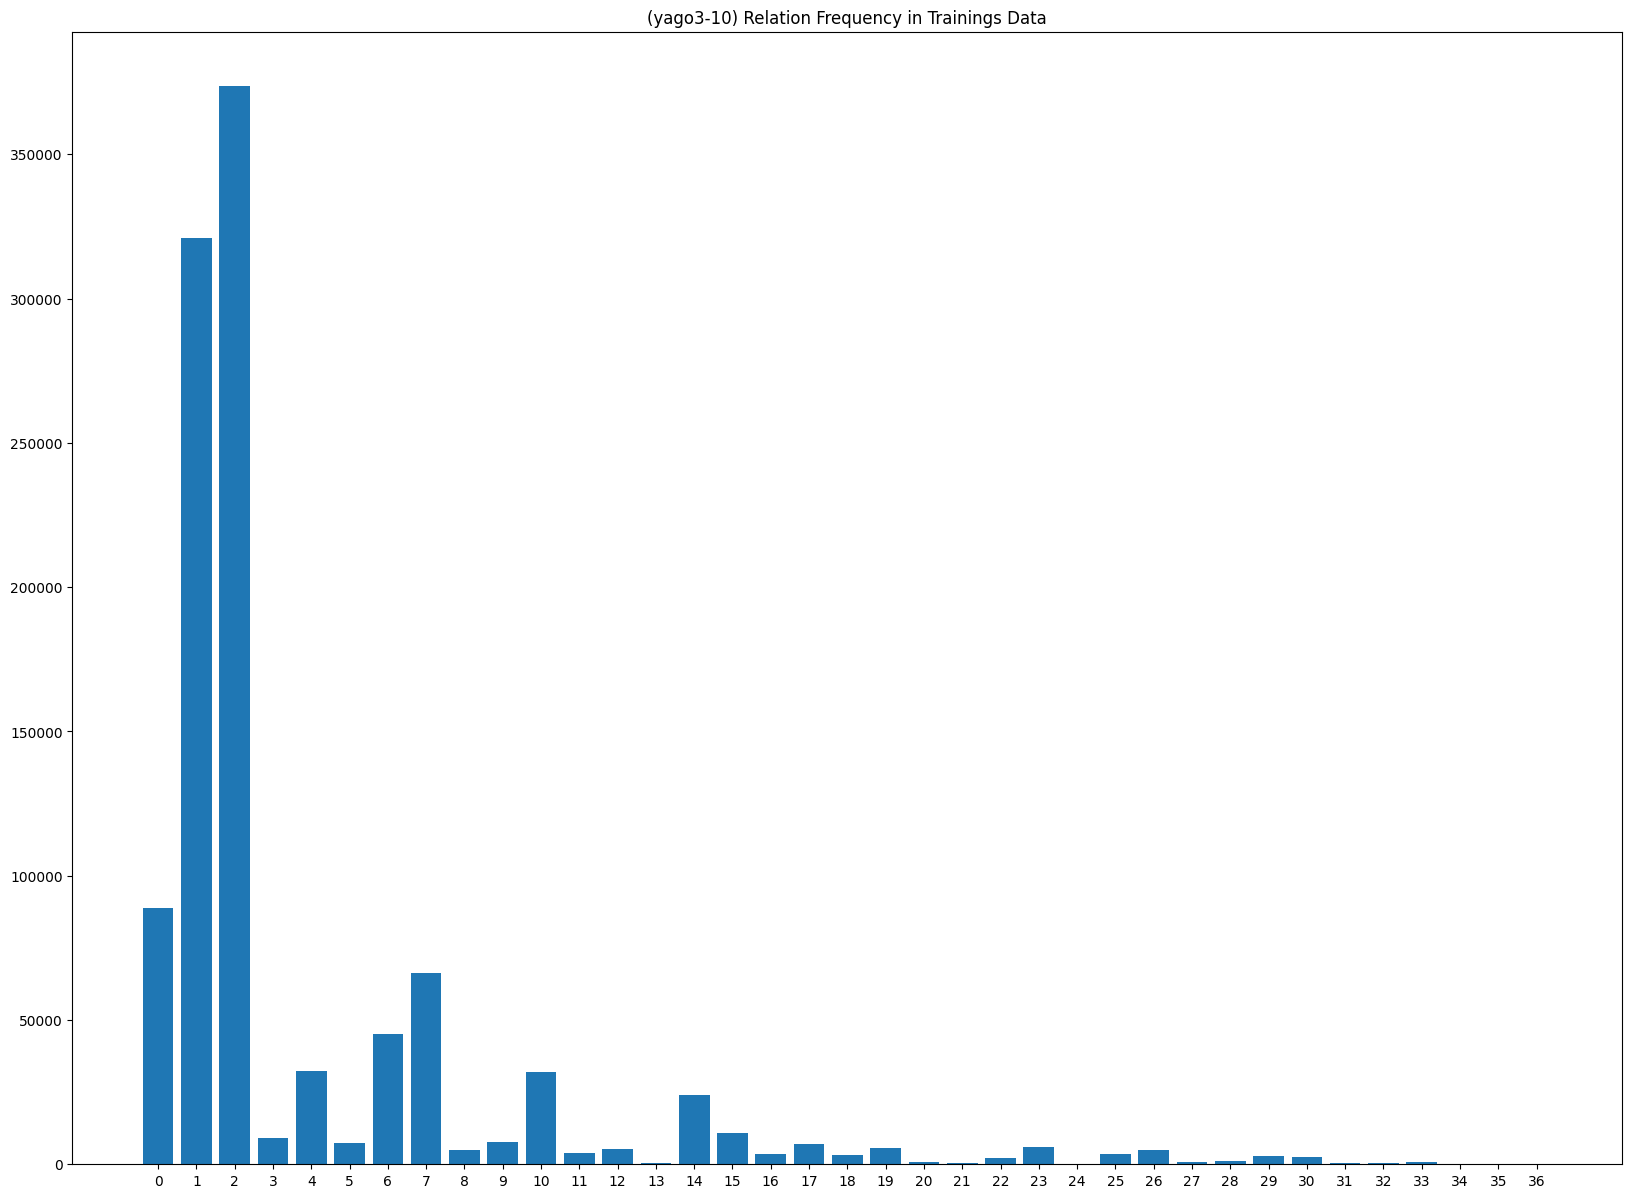

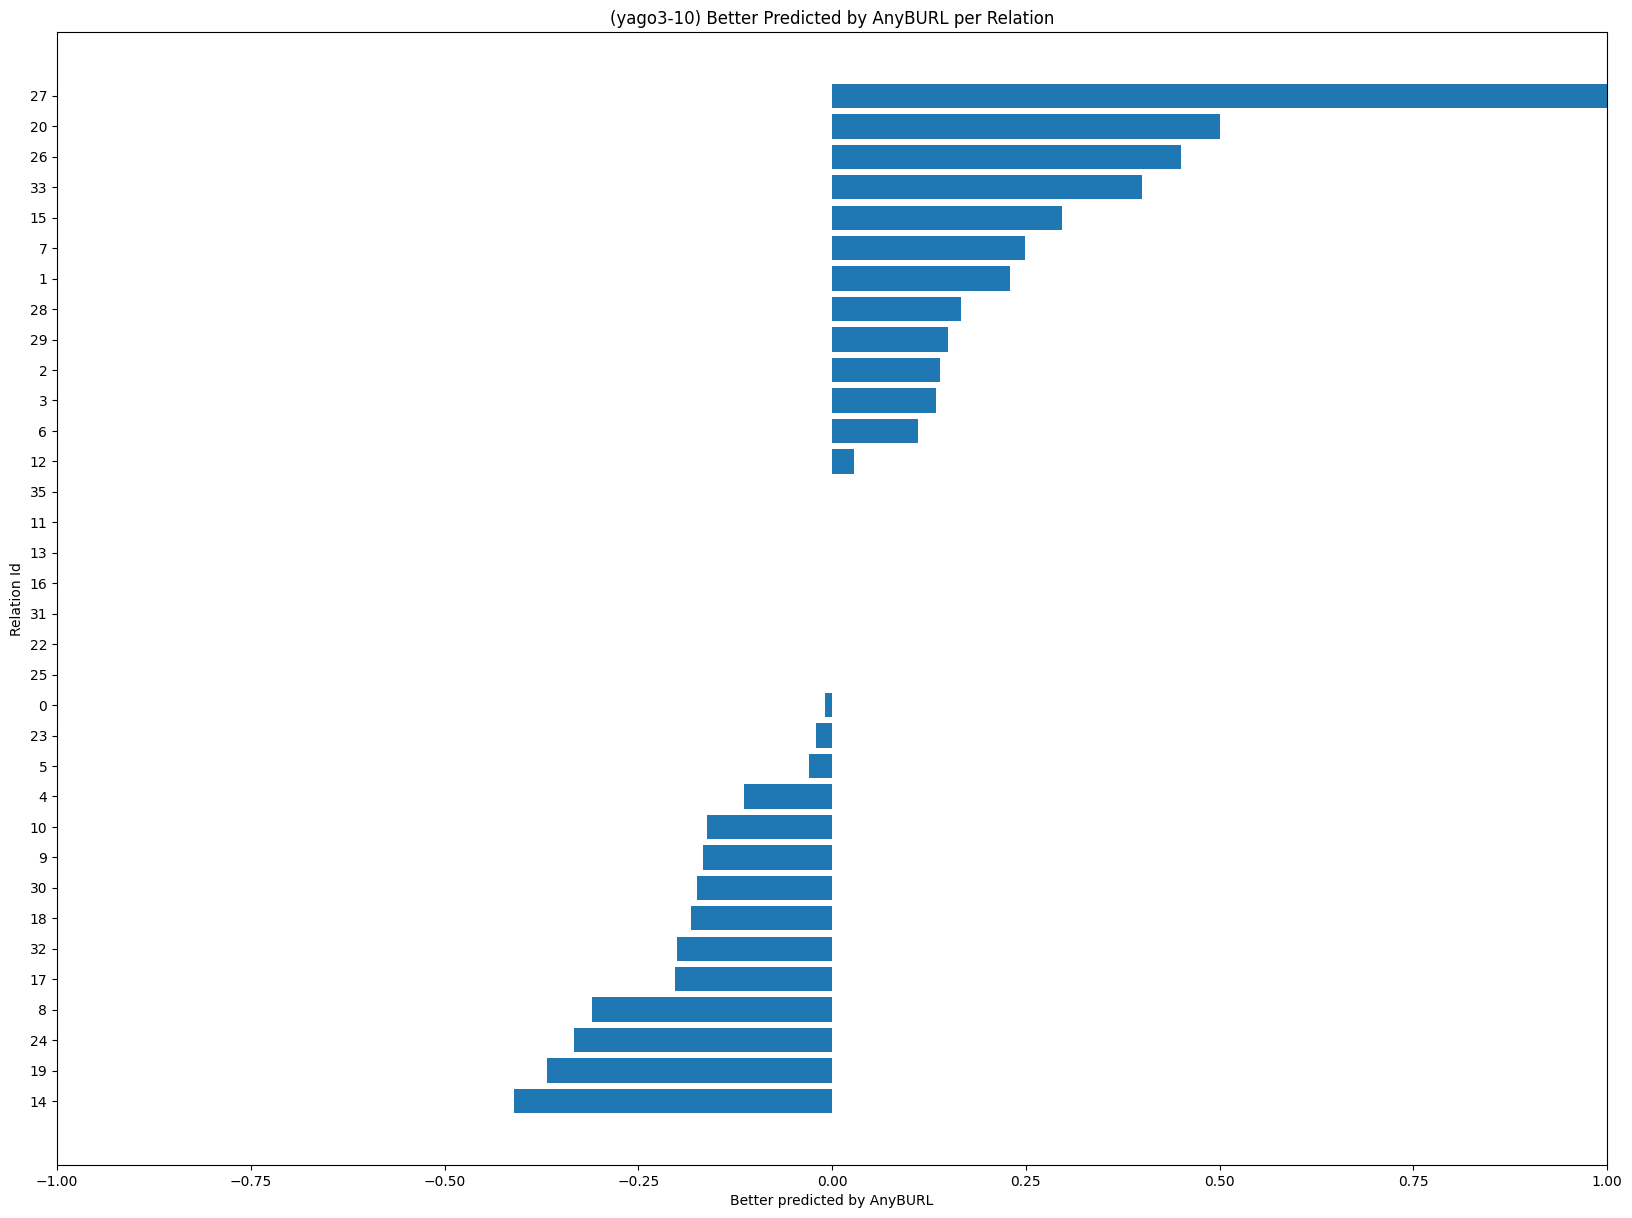

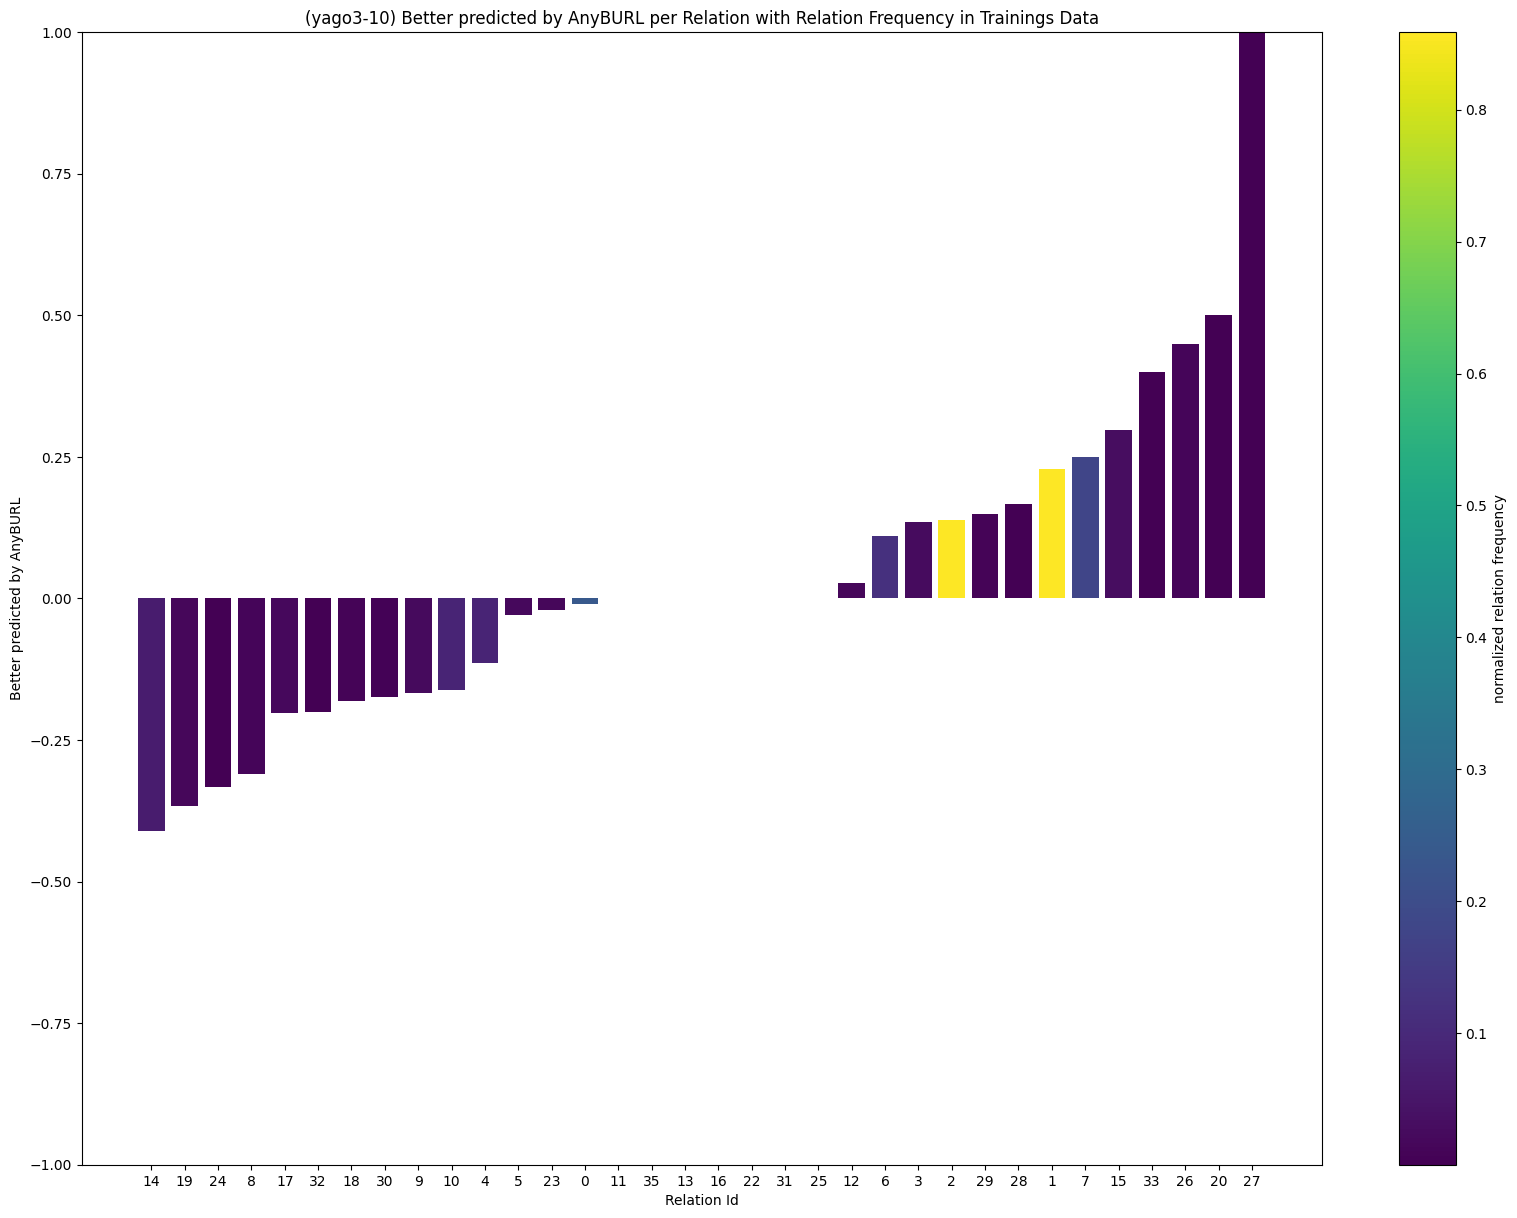

Loading configuration of dataset yago3-10 from d:\files\git\kge\data\yago3-10 ...
Loaded 37 keys from map relation_strings
  306439 distinct sp pairs in train
  85683 distinct po pairs in train


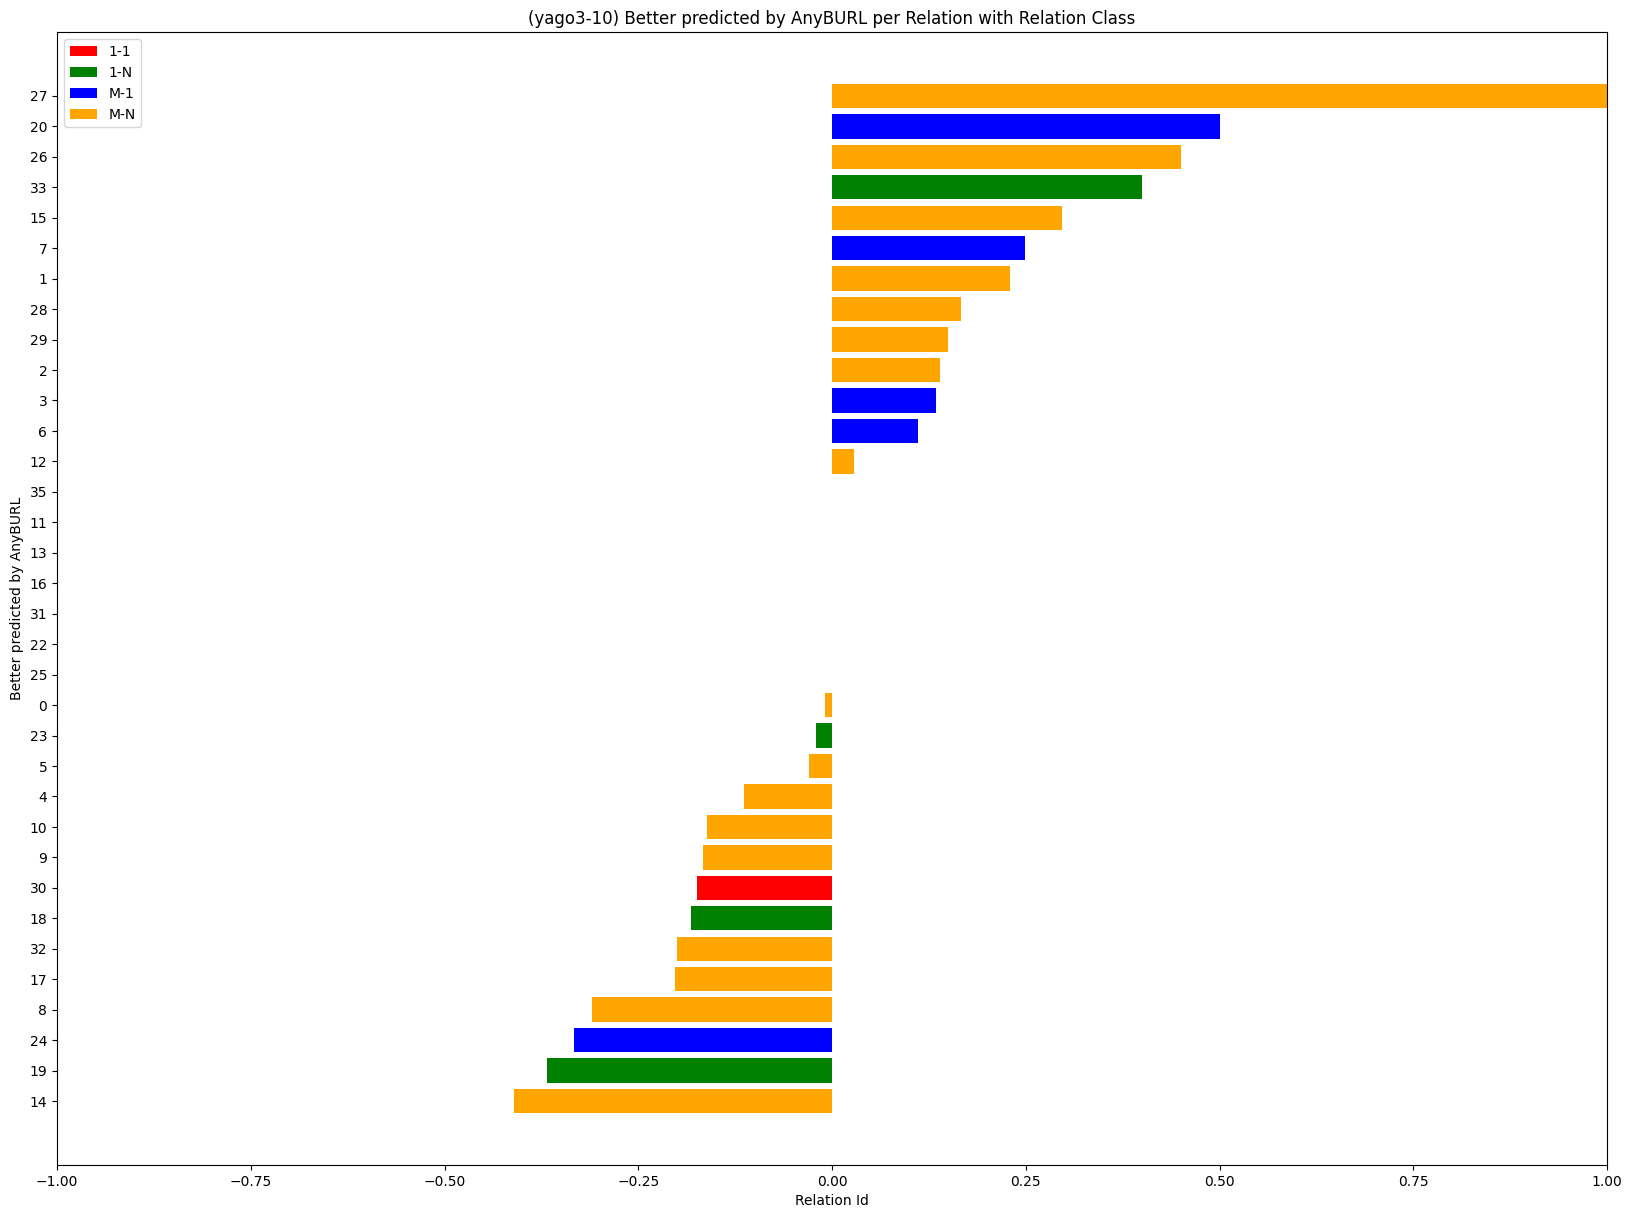

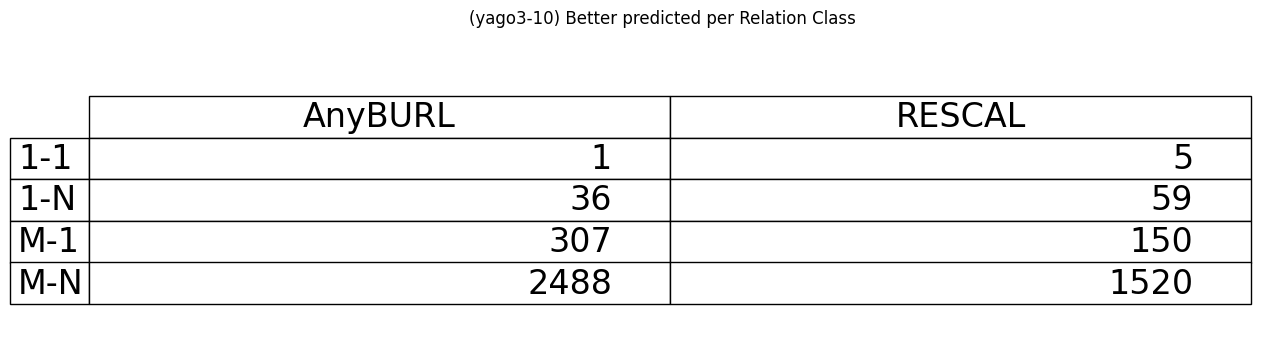

Working on codex-m - AnyBURL - ComplEx


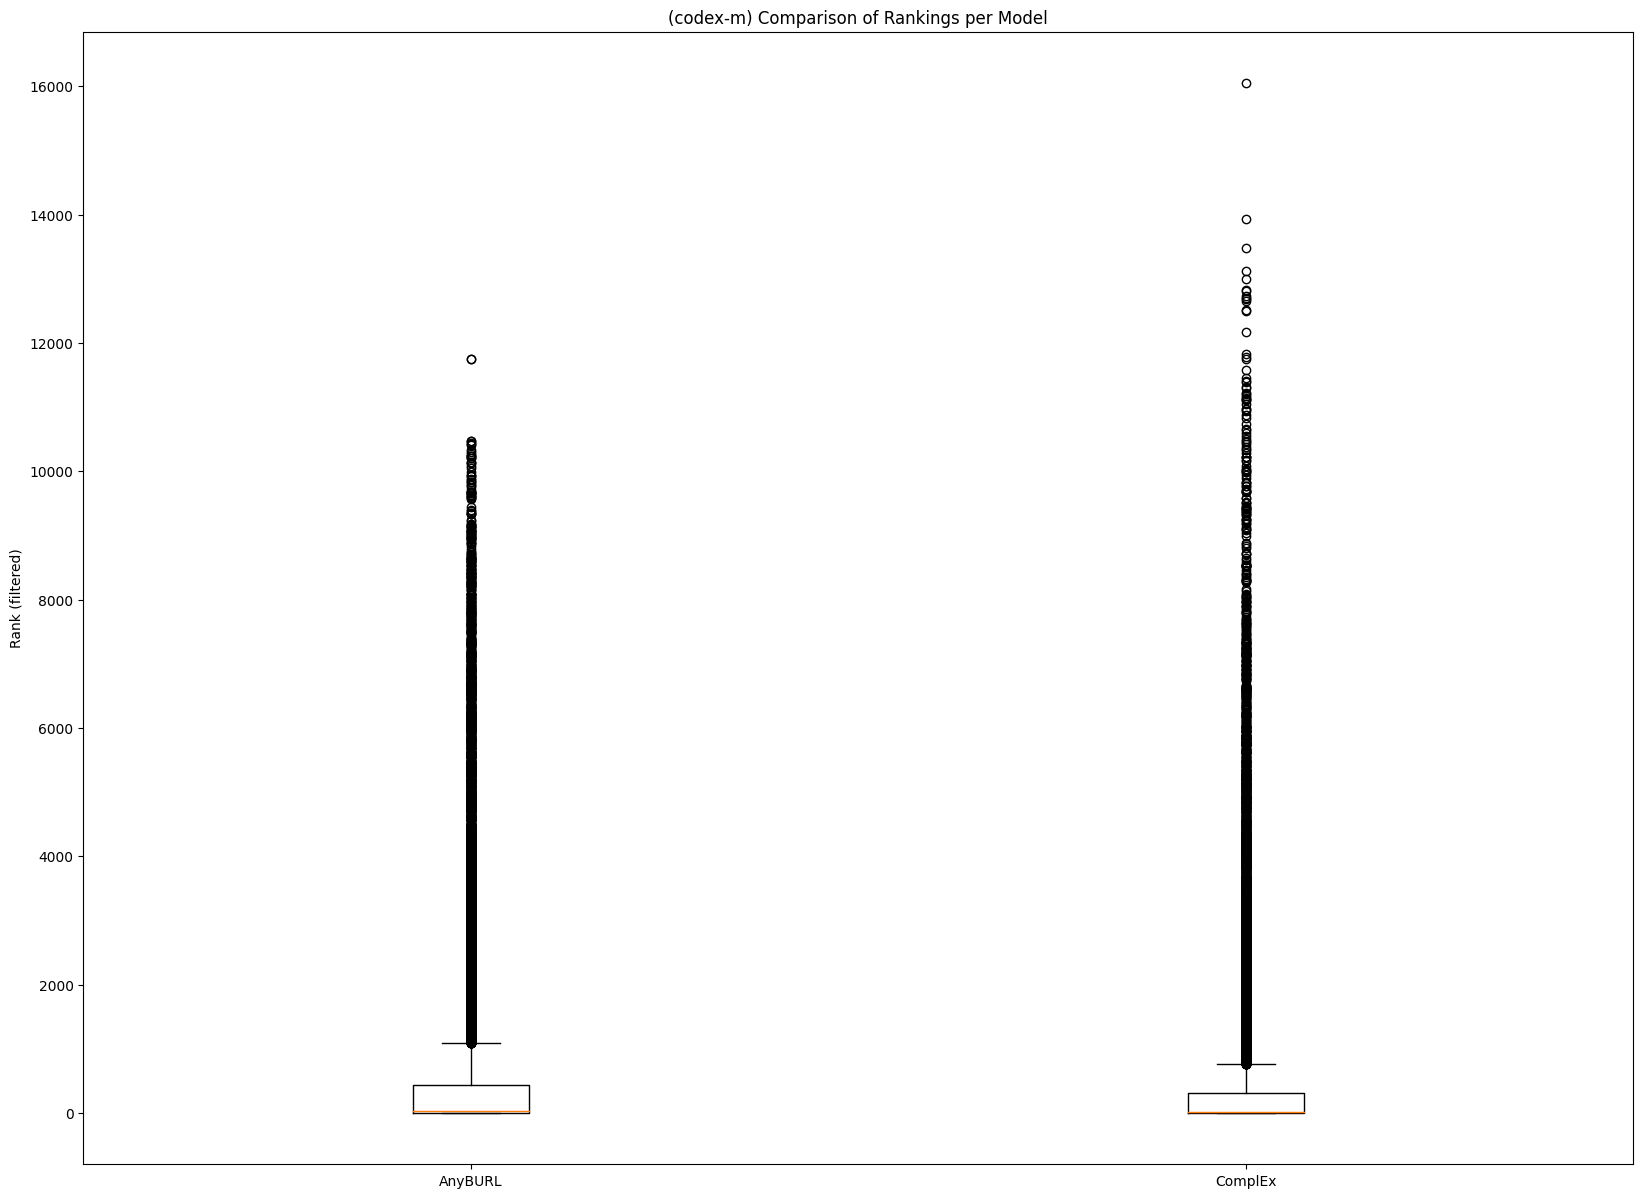

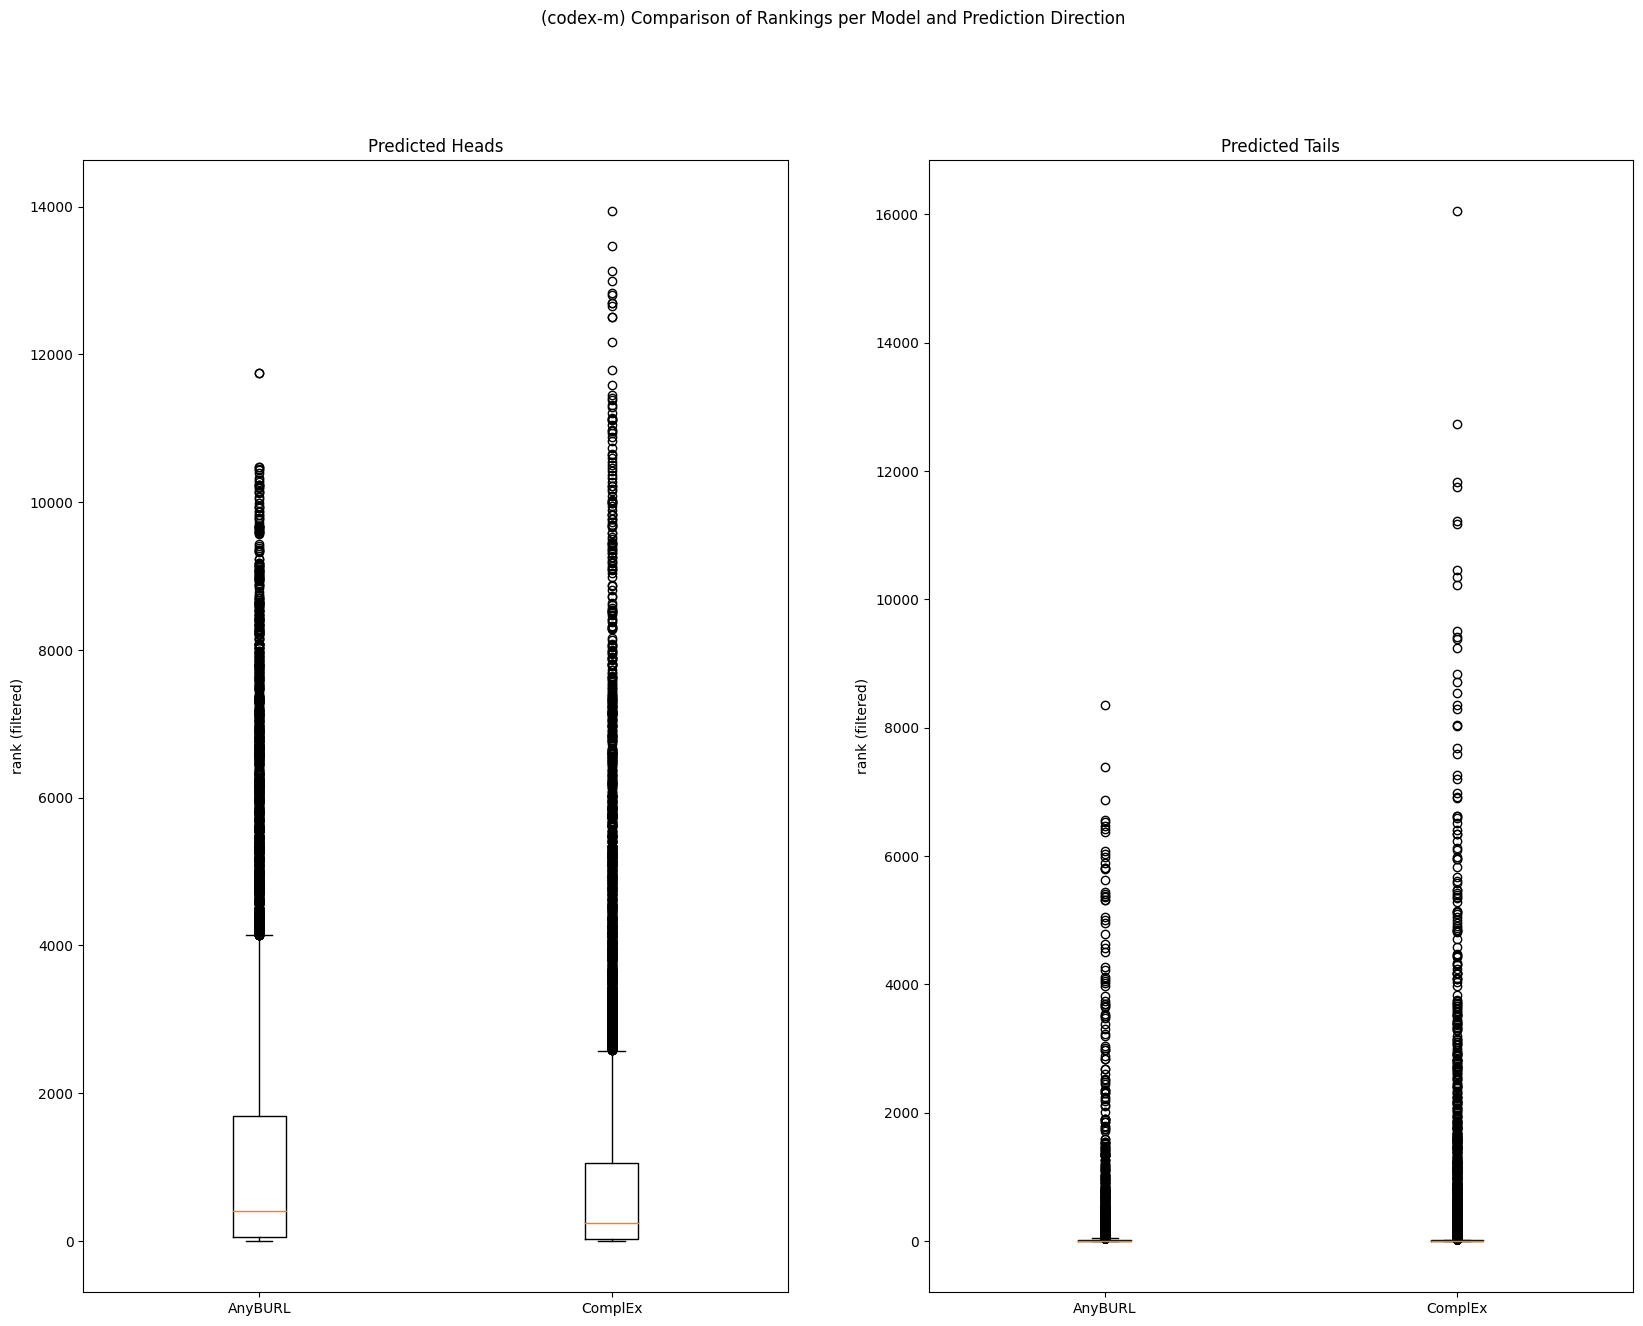

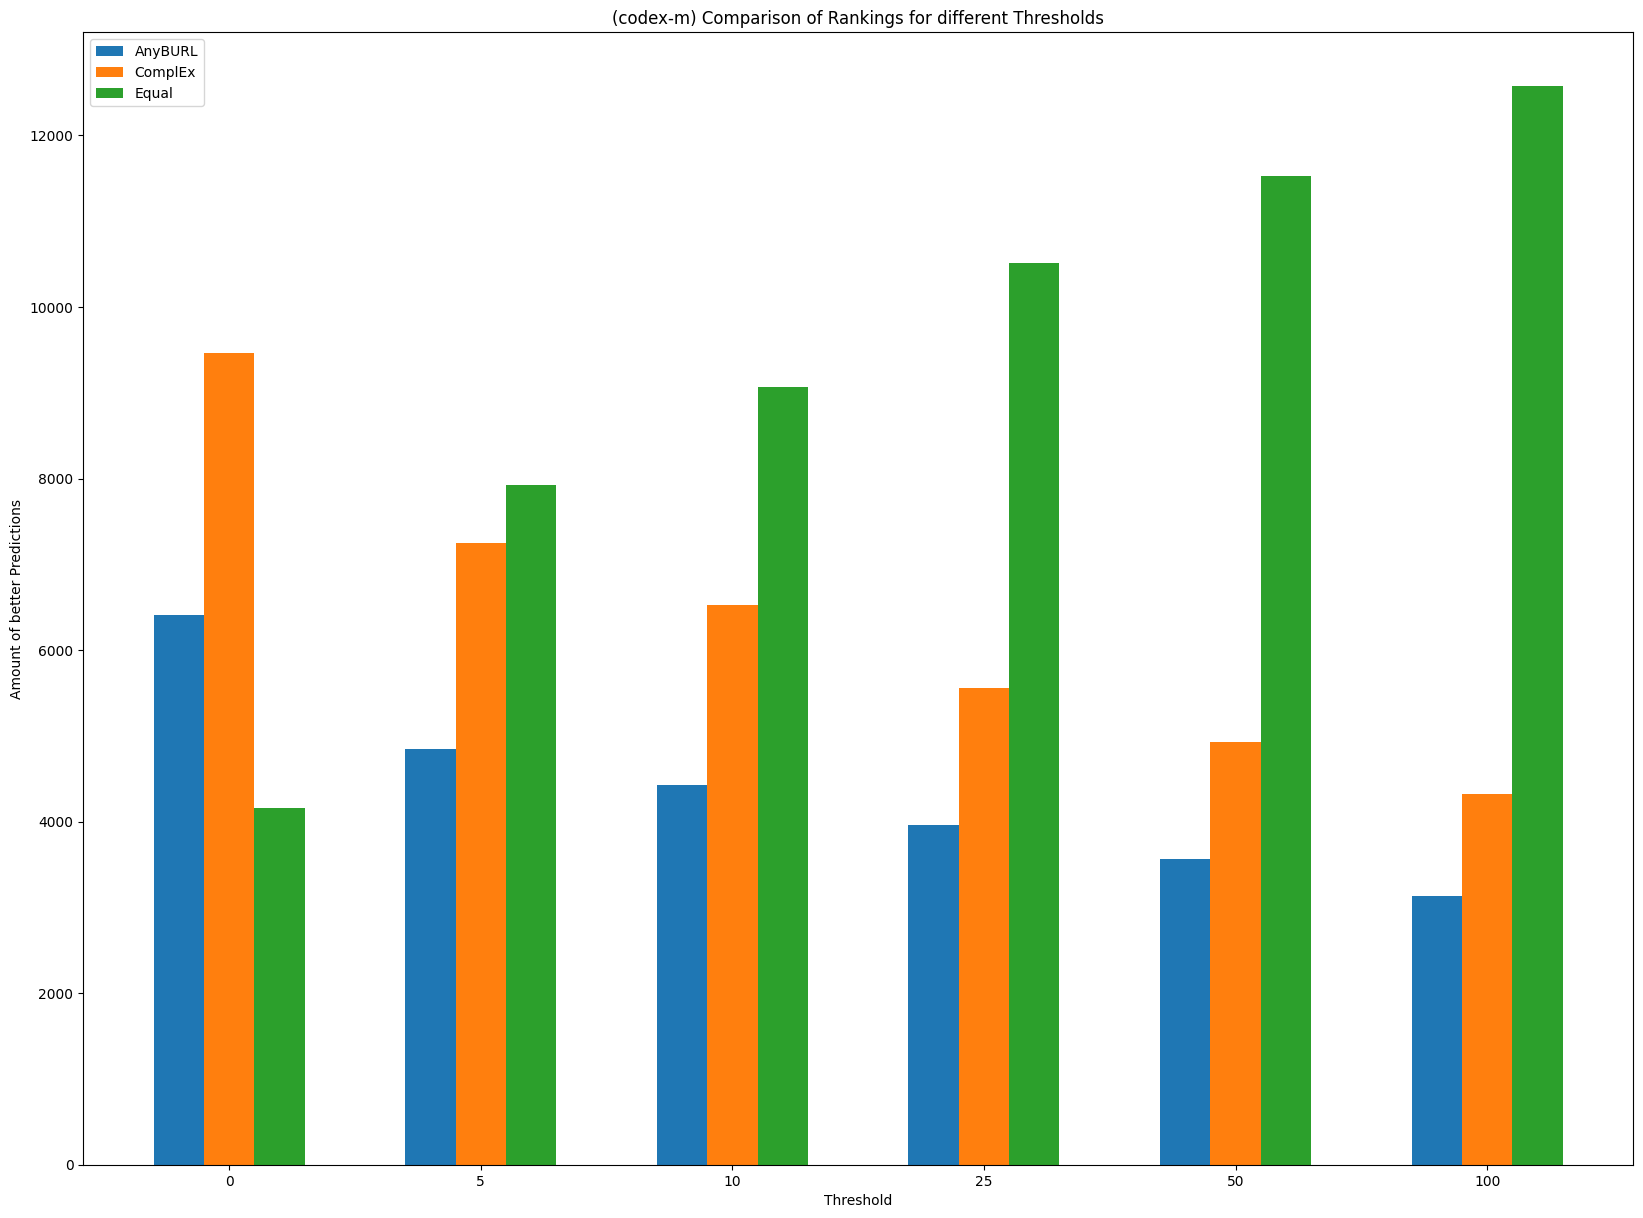

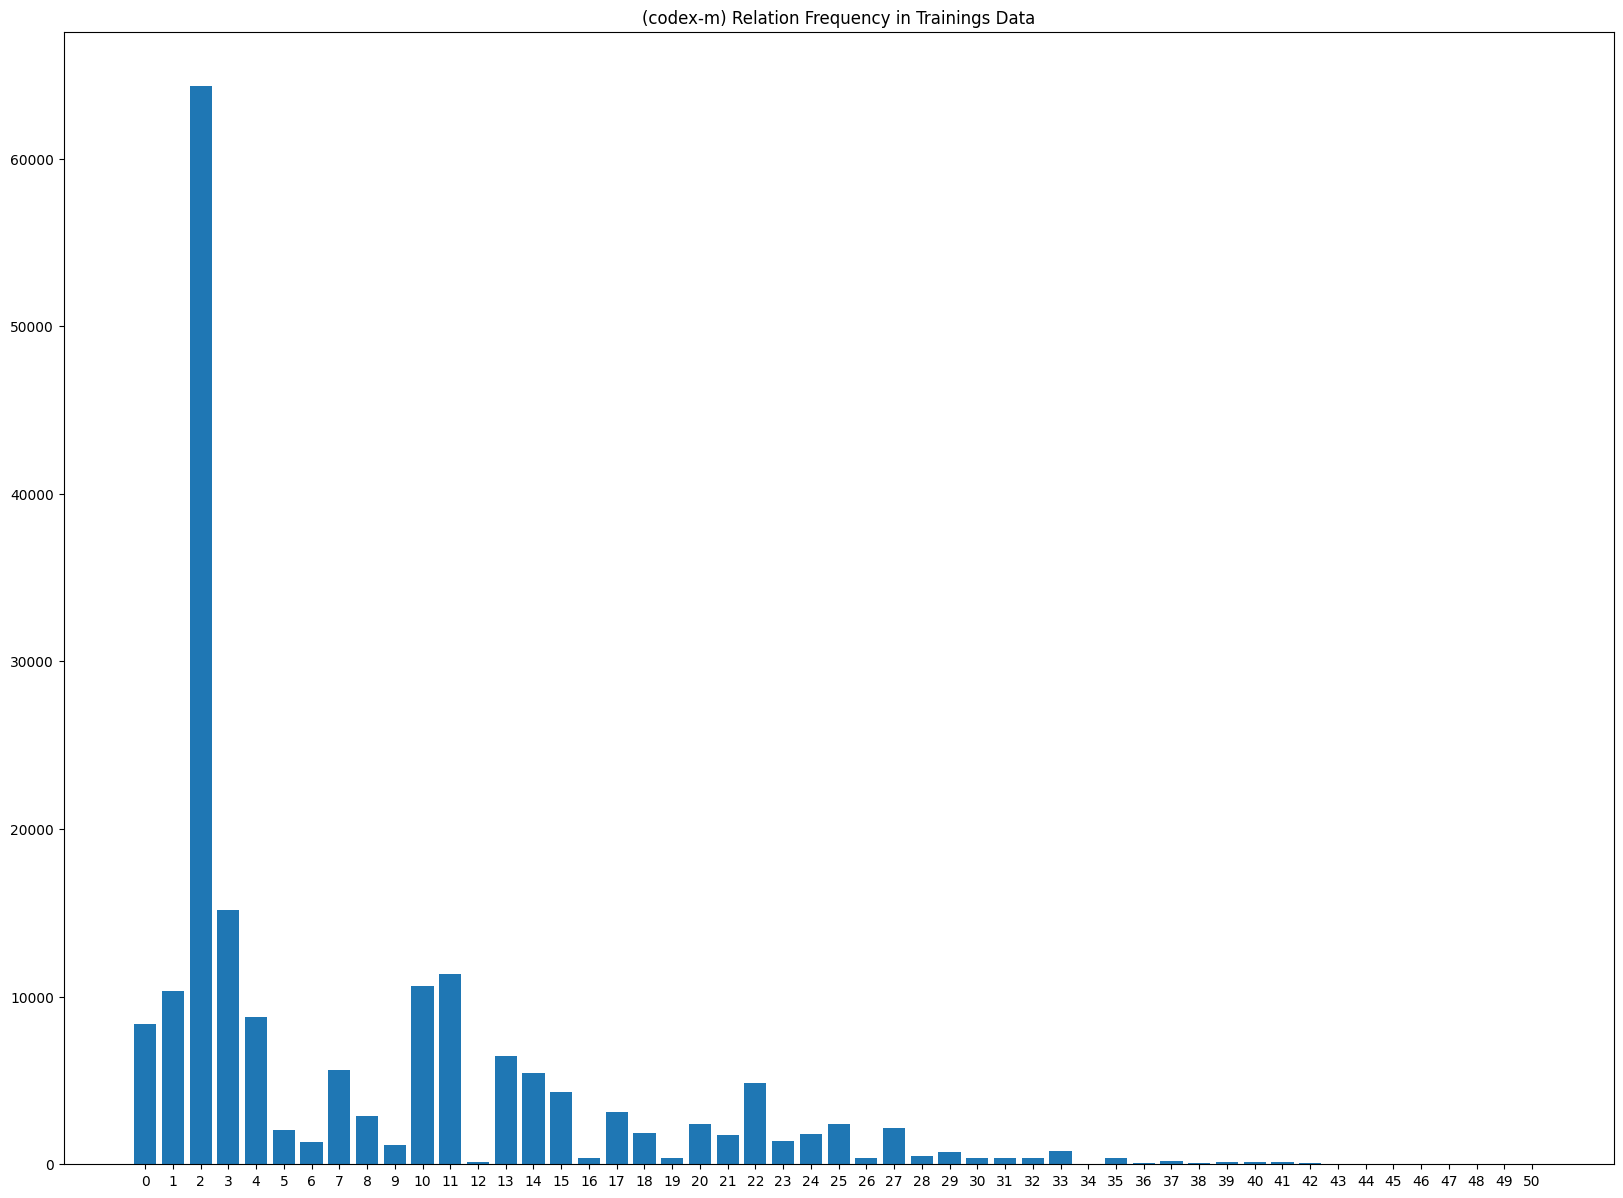

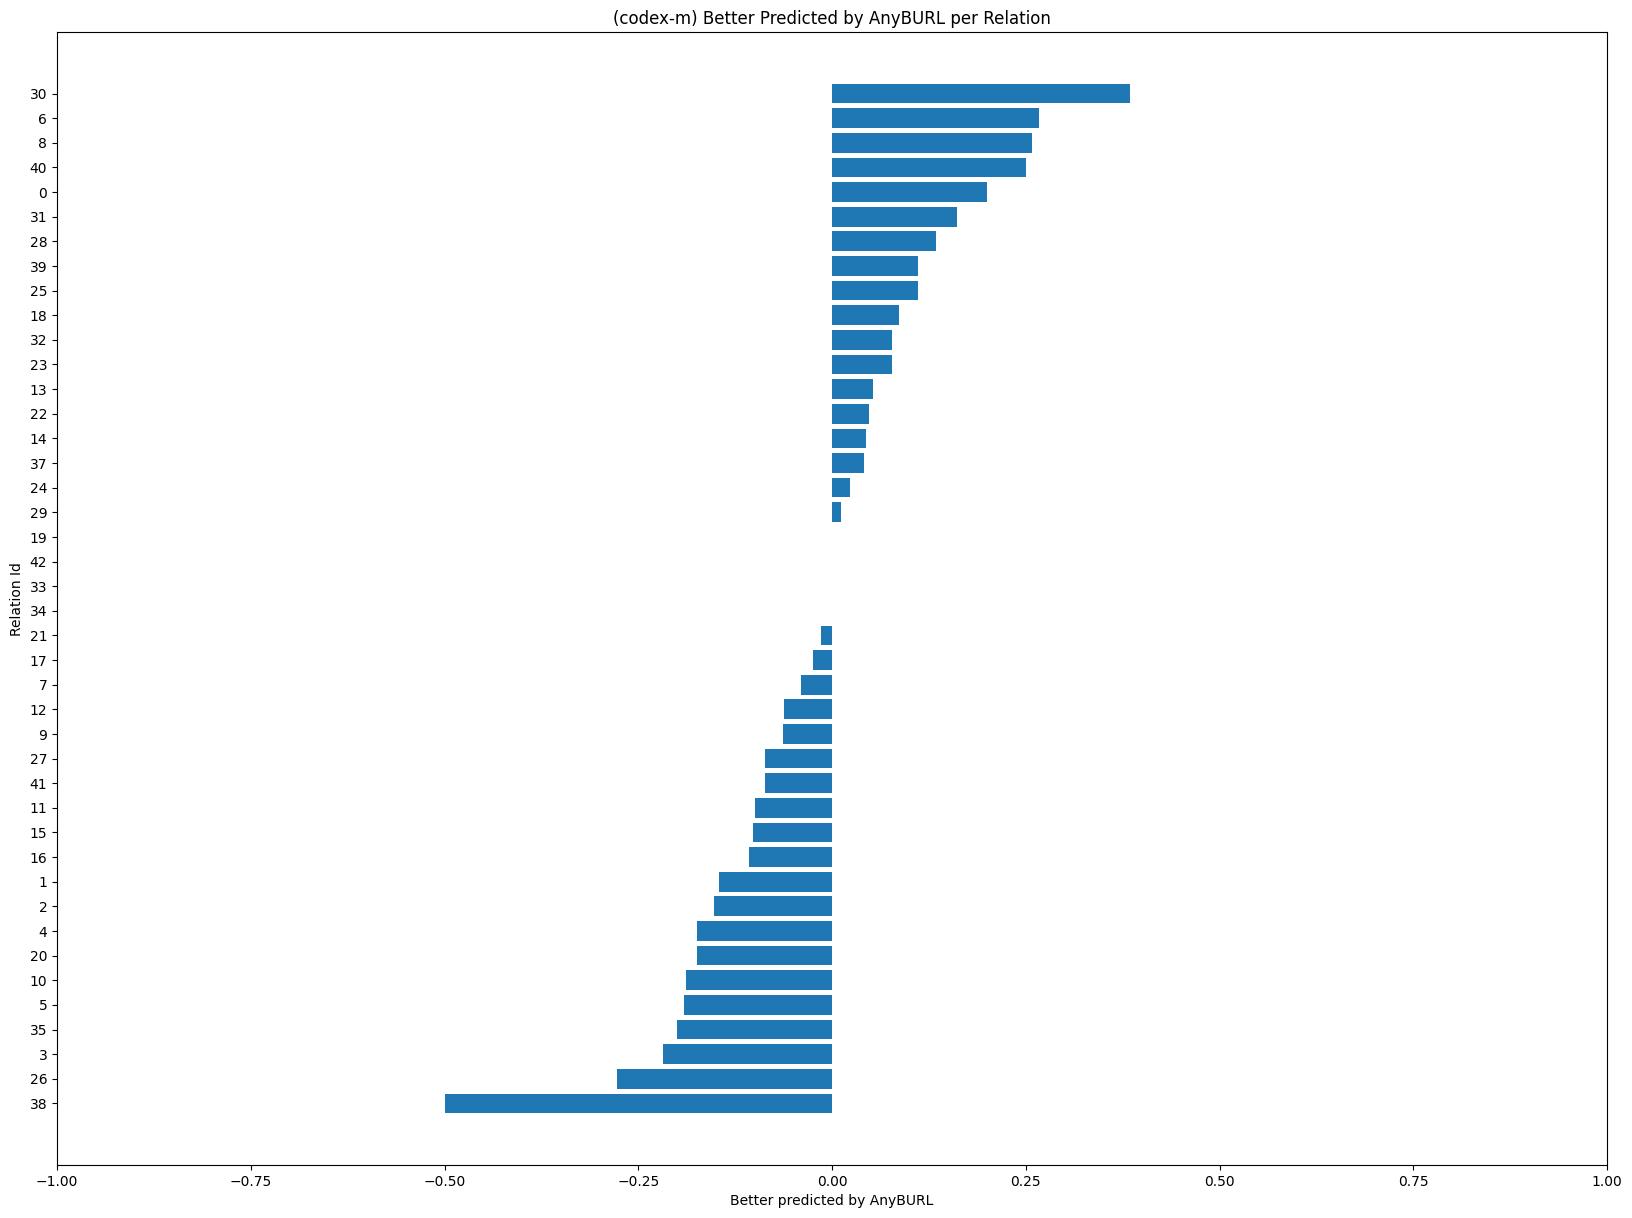

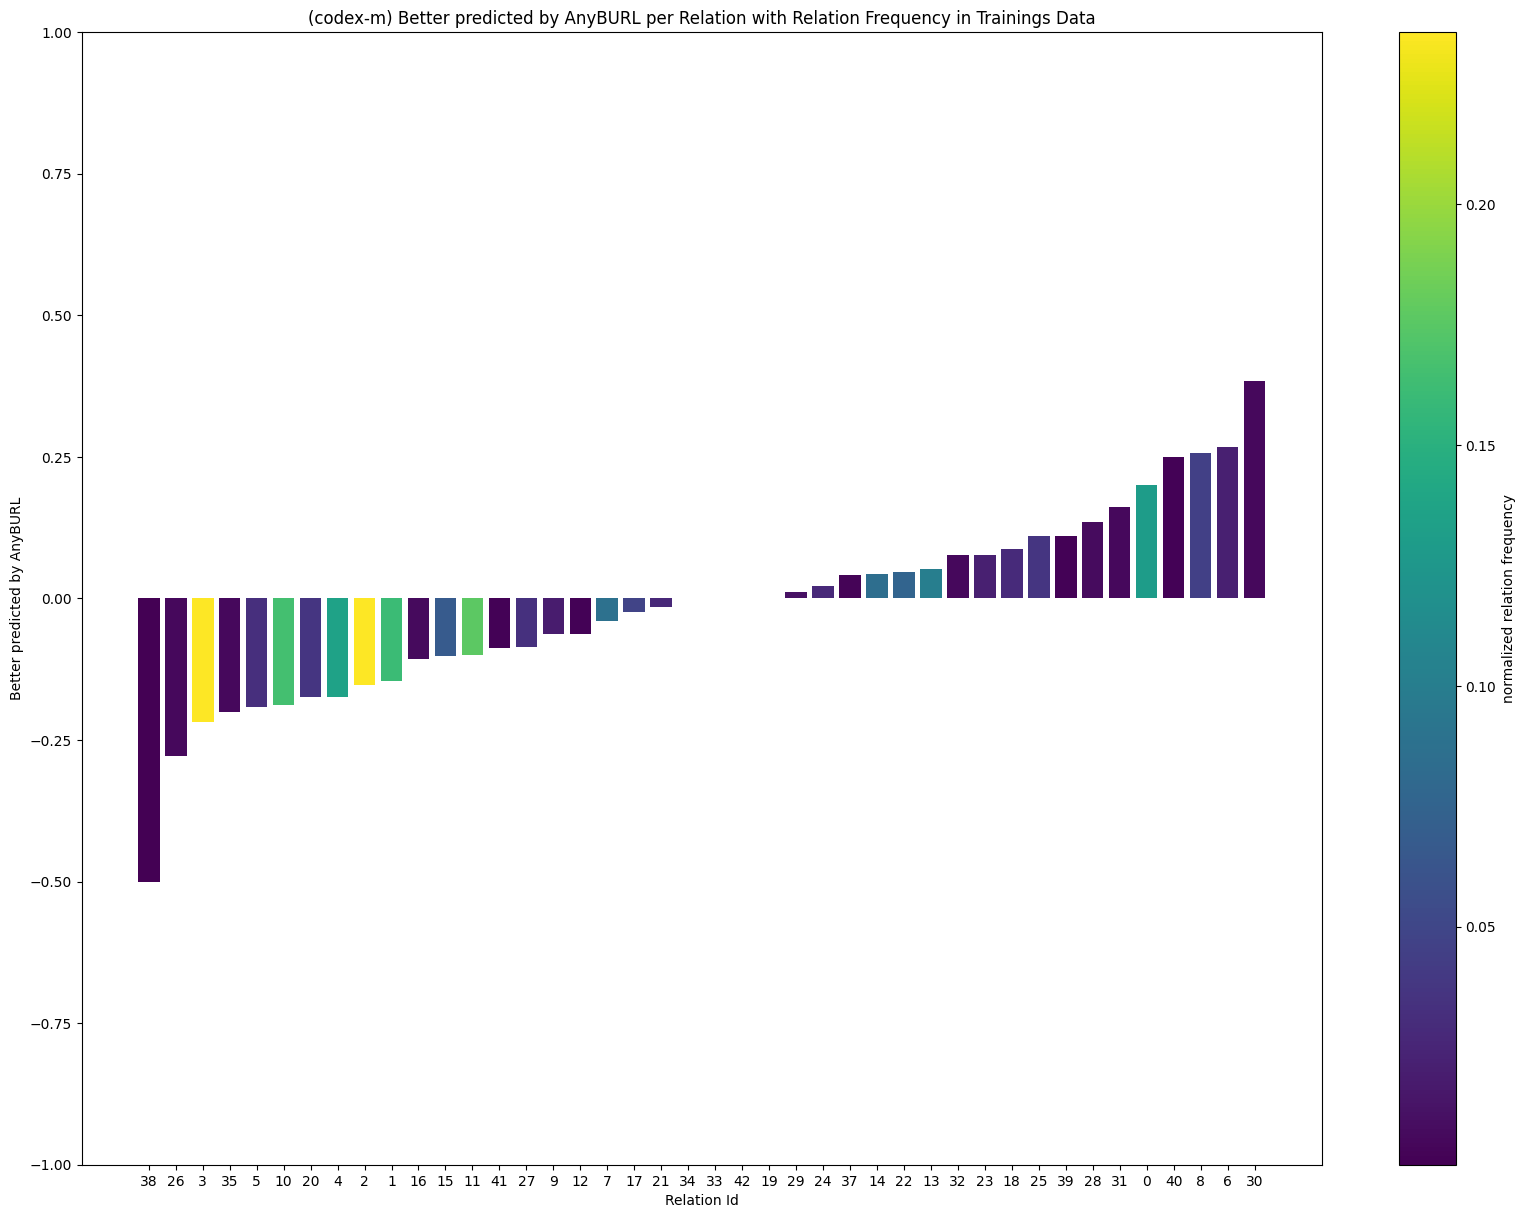

Loading configuration of dataset codex-m from d:\files\git\kge\data\codex-m ...
Loaded 51 keys from map relation_ids
Loaded 51 keys from map relation_strings
  91210 distinct sp pairs in train
  9926 distinct po pairs in train


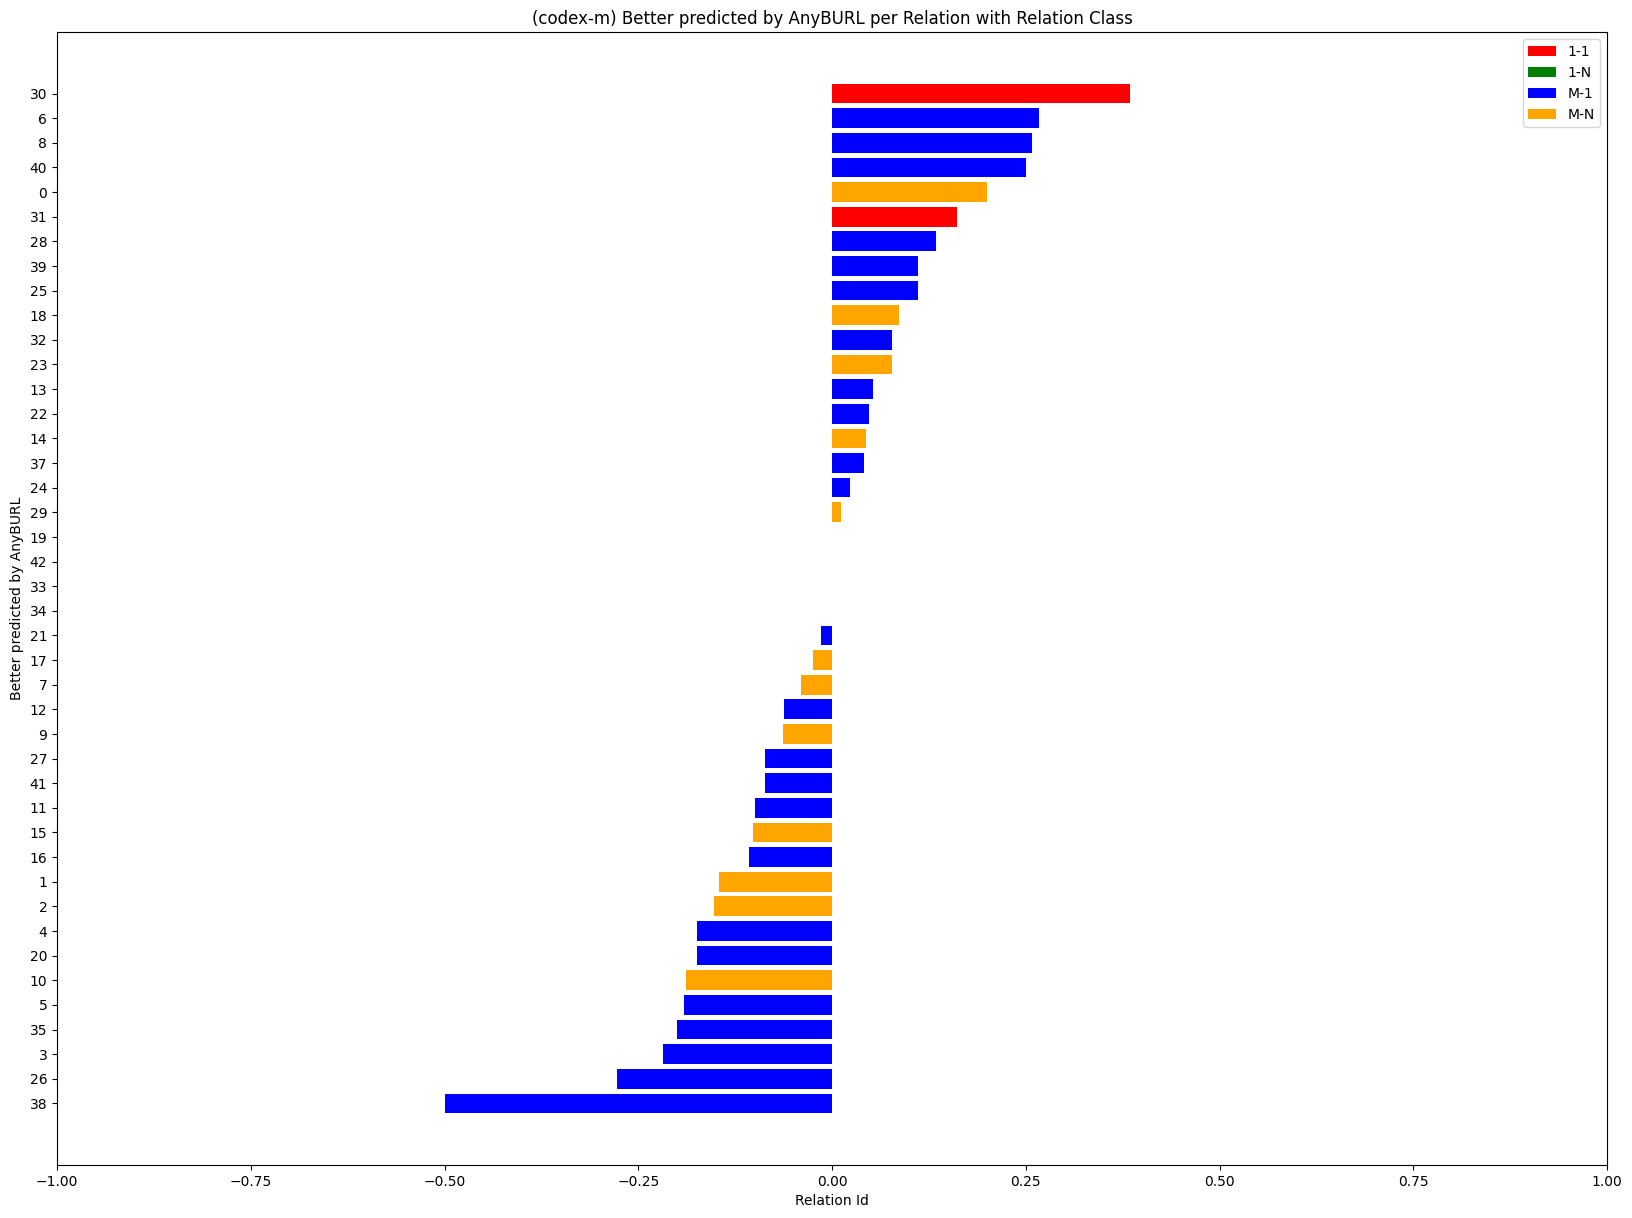

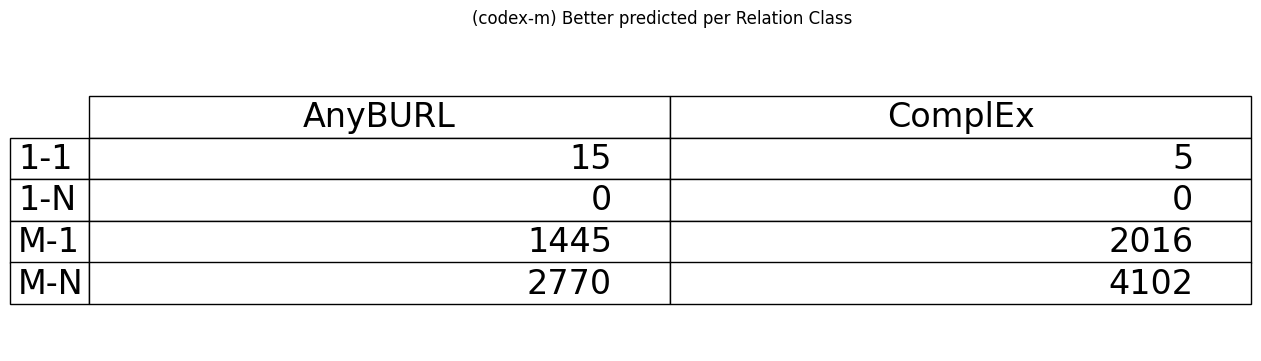

Working on codex-m - AnyBURL - RESCAL


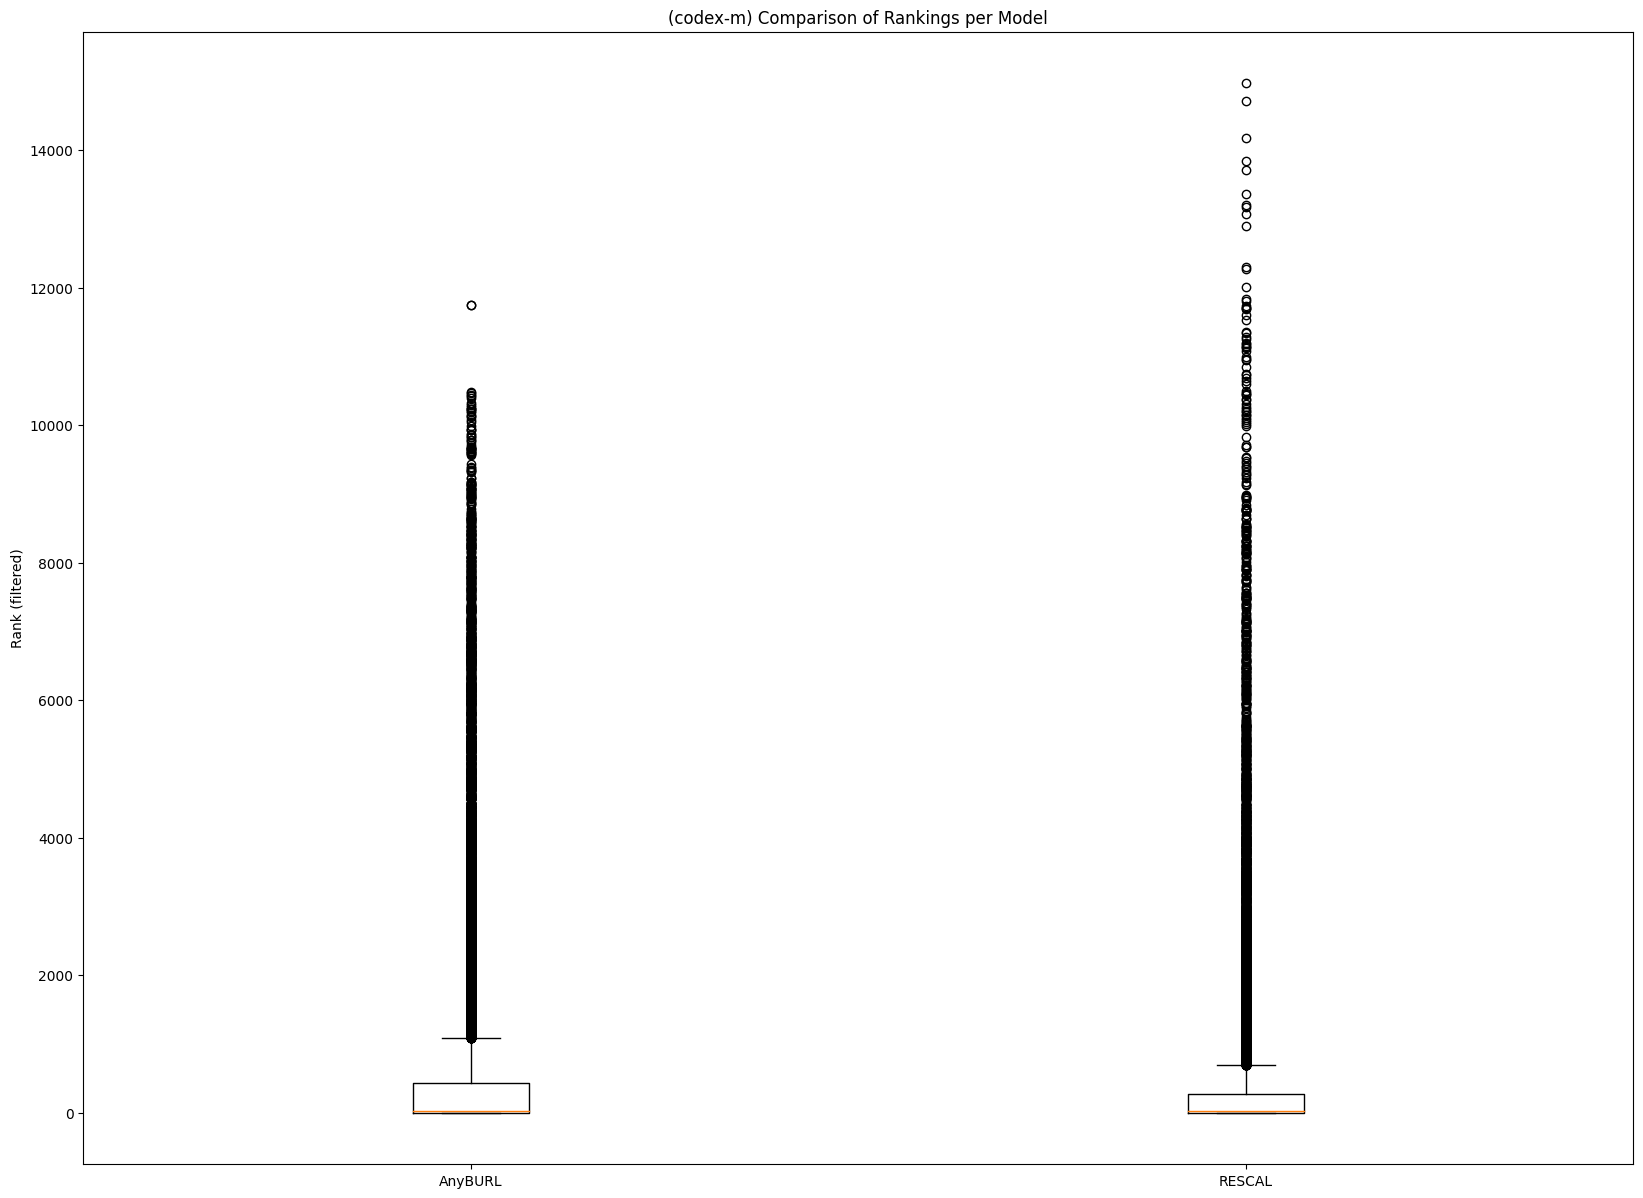

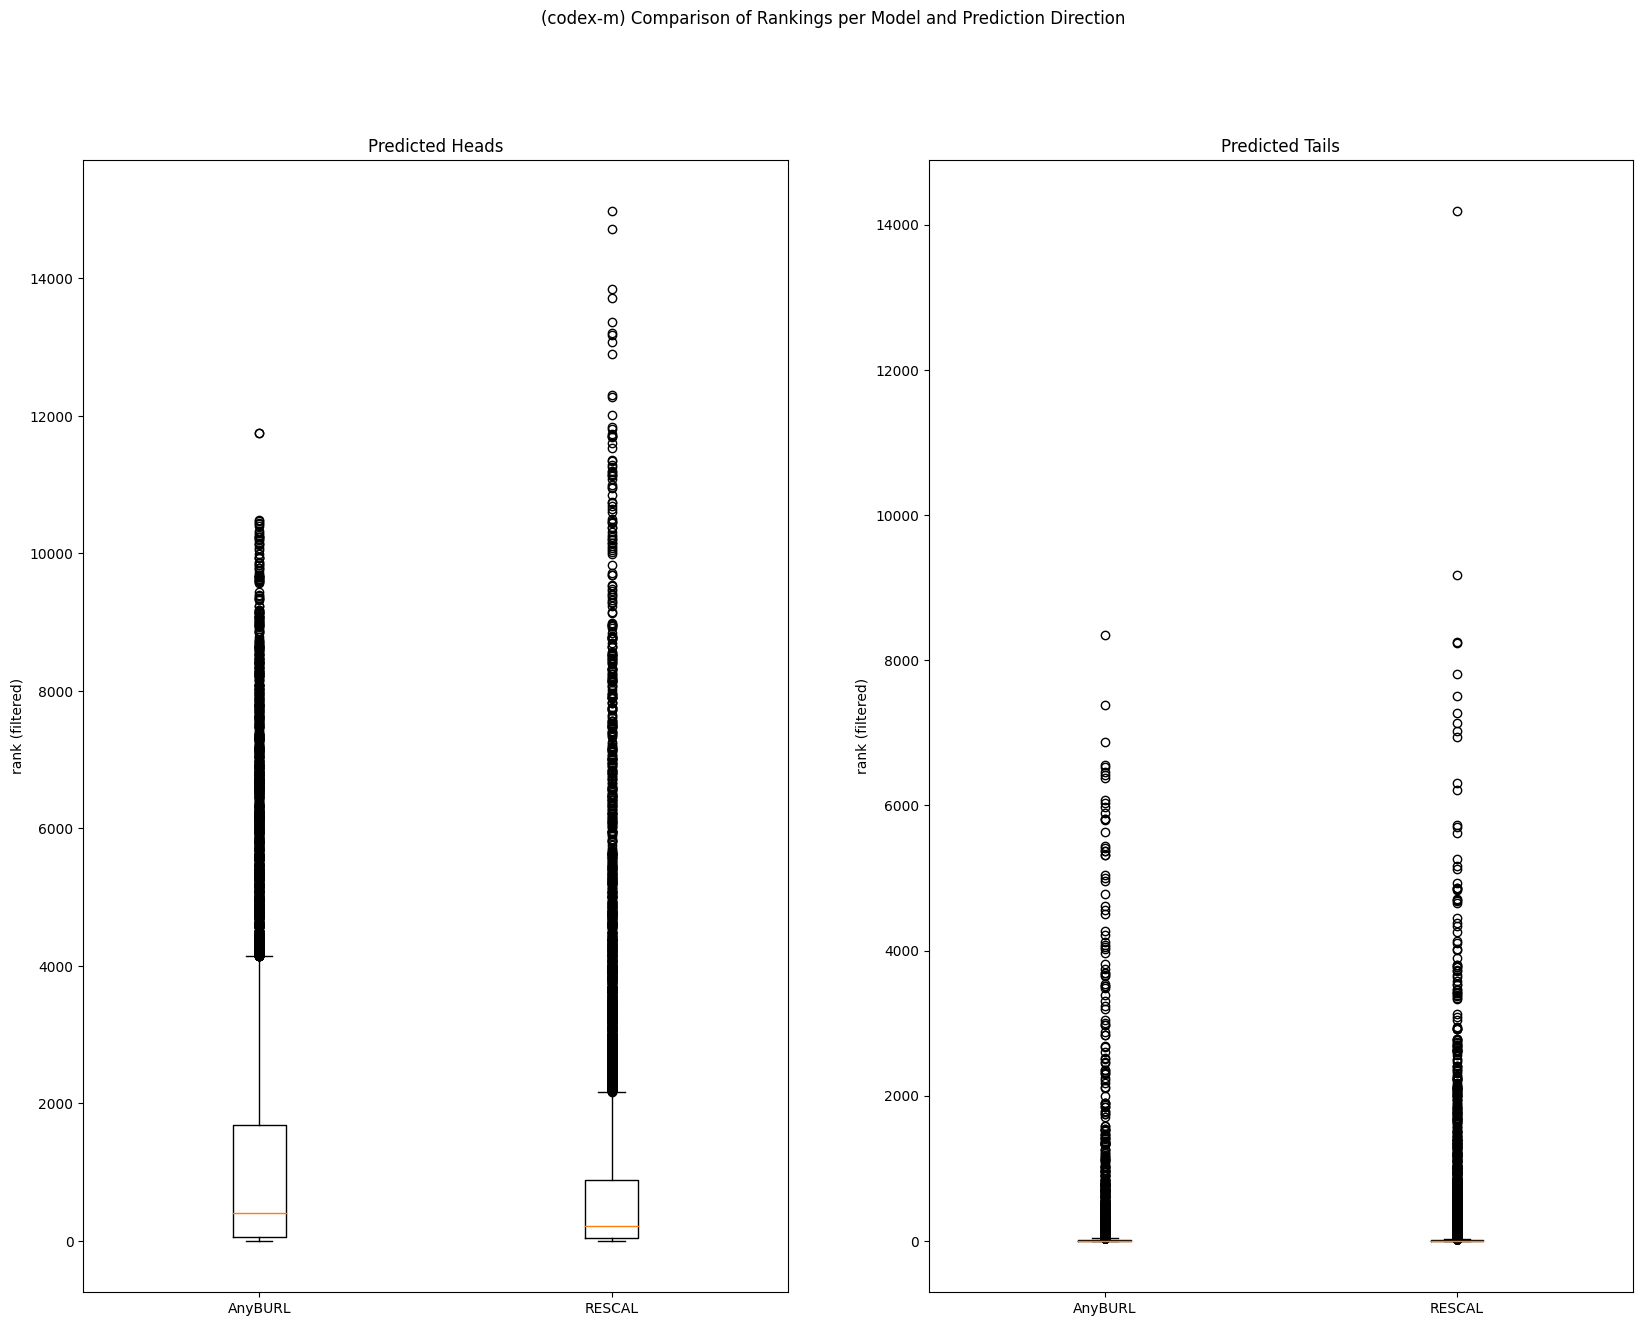

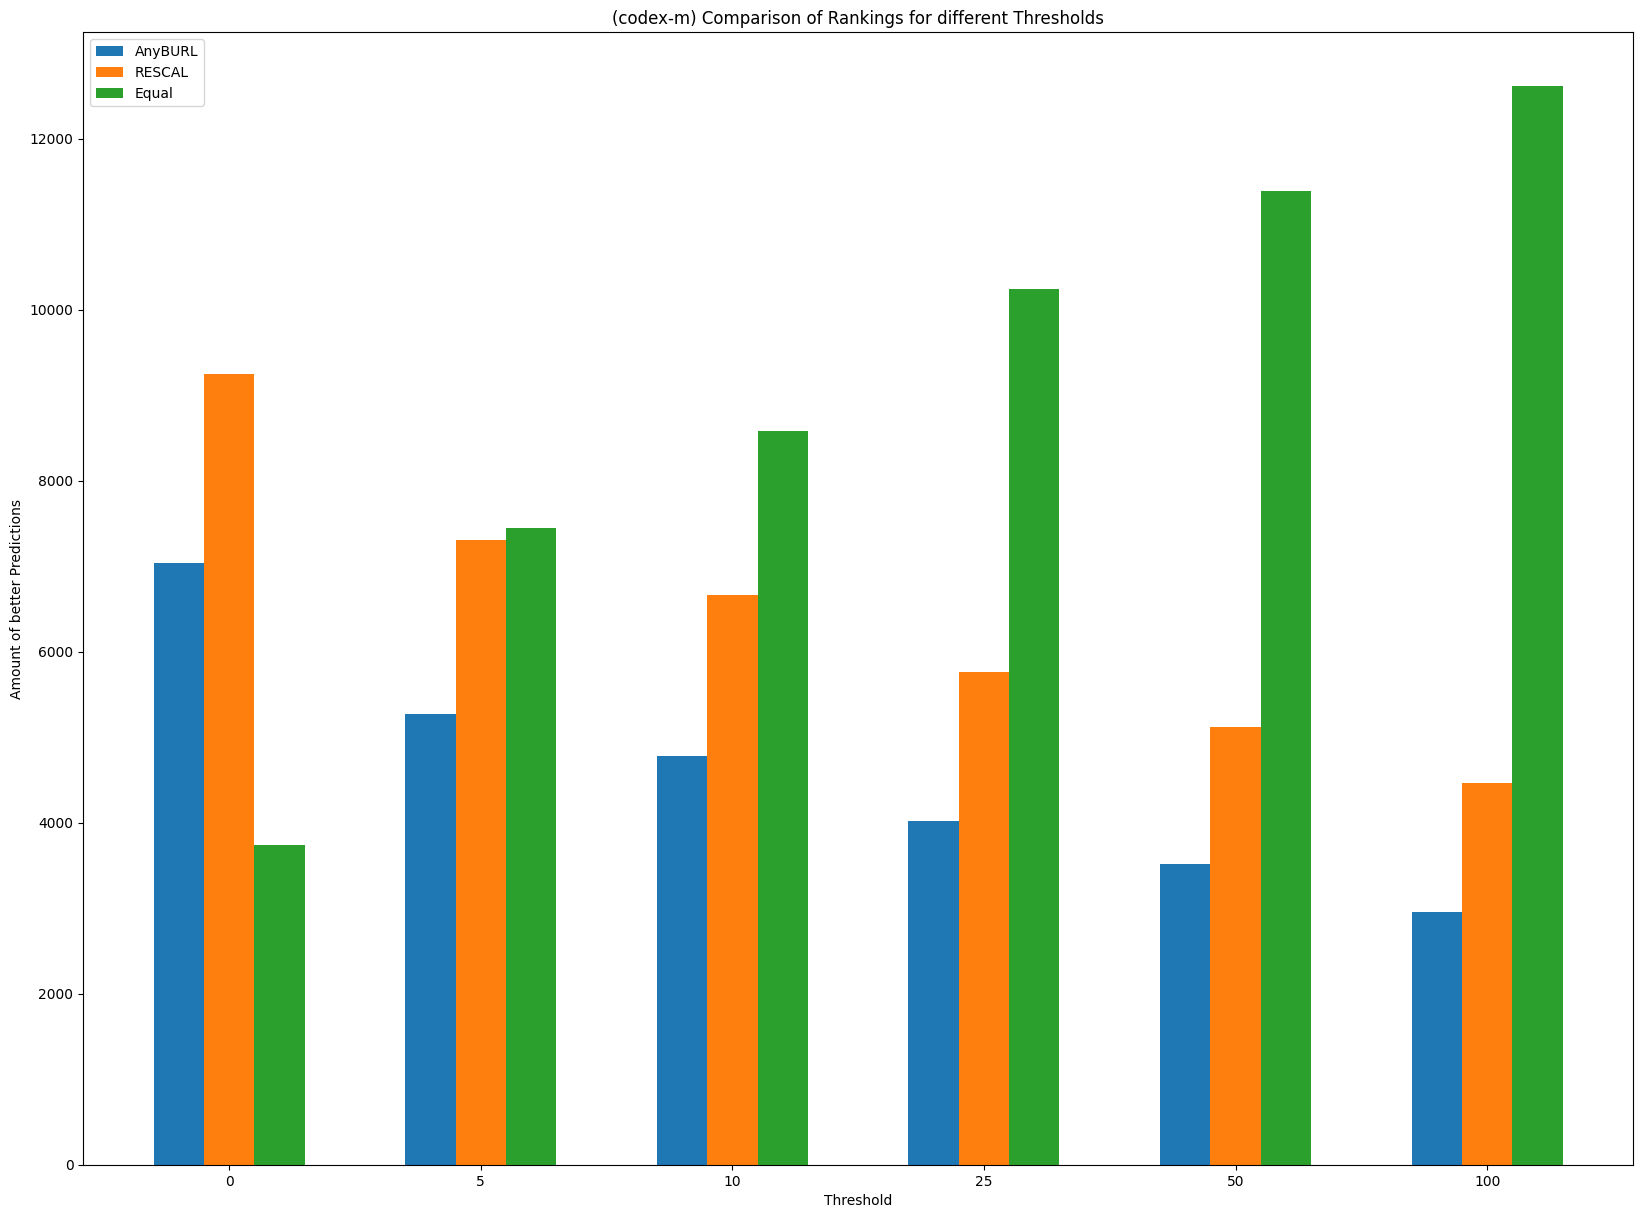

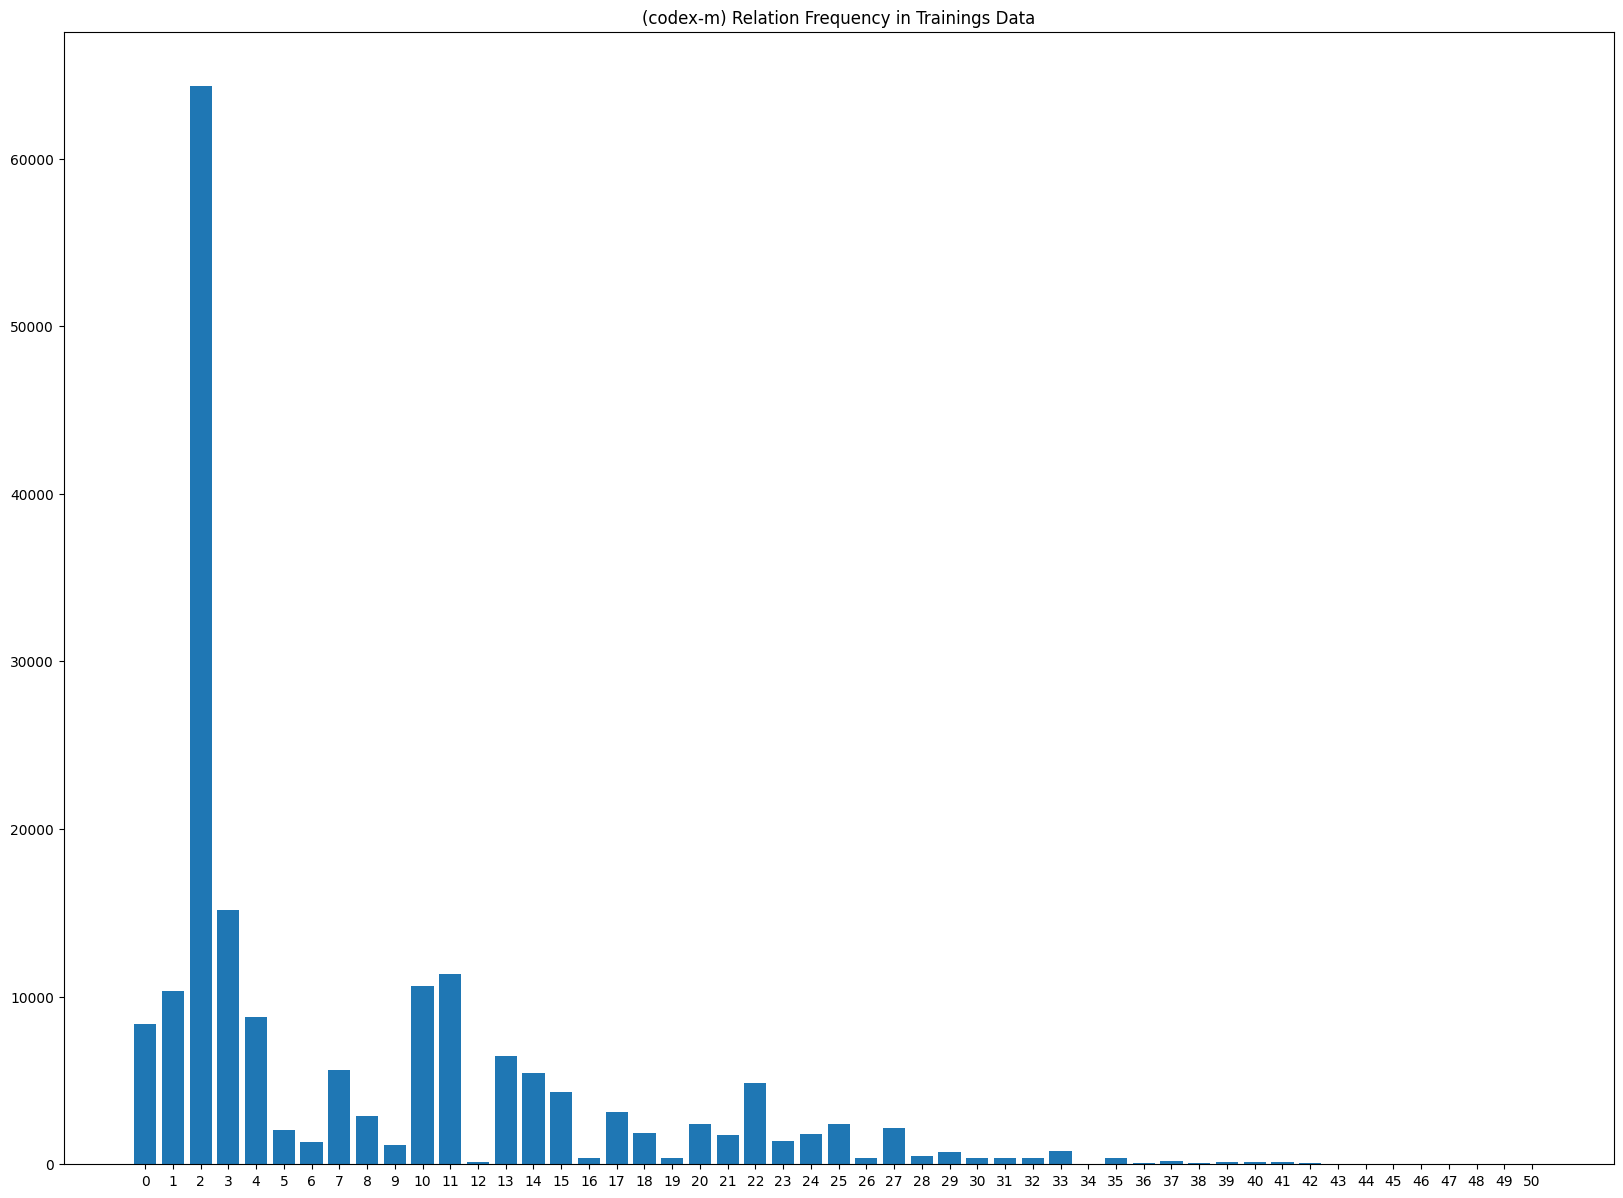

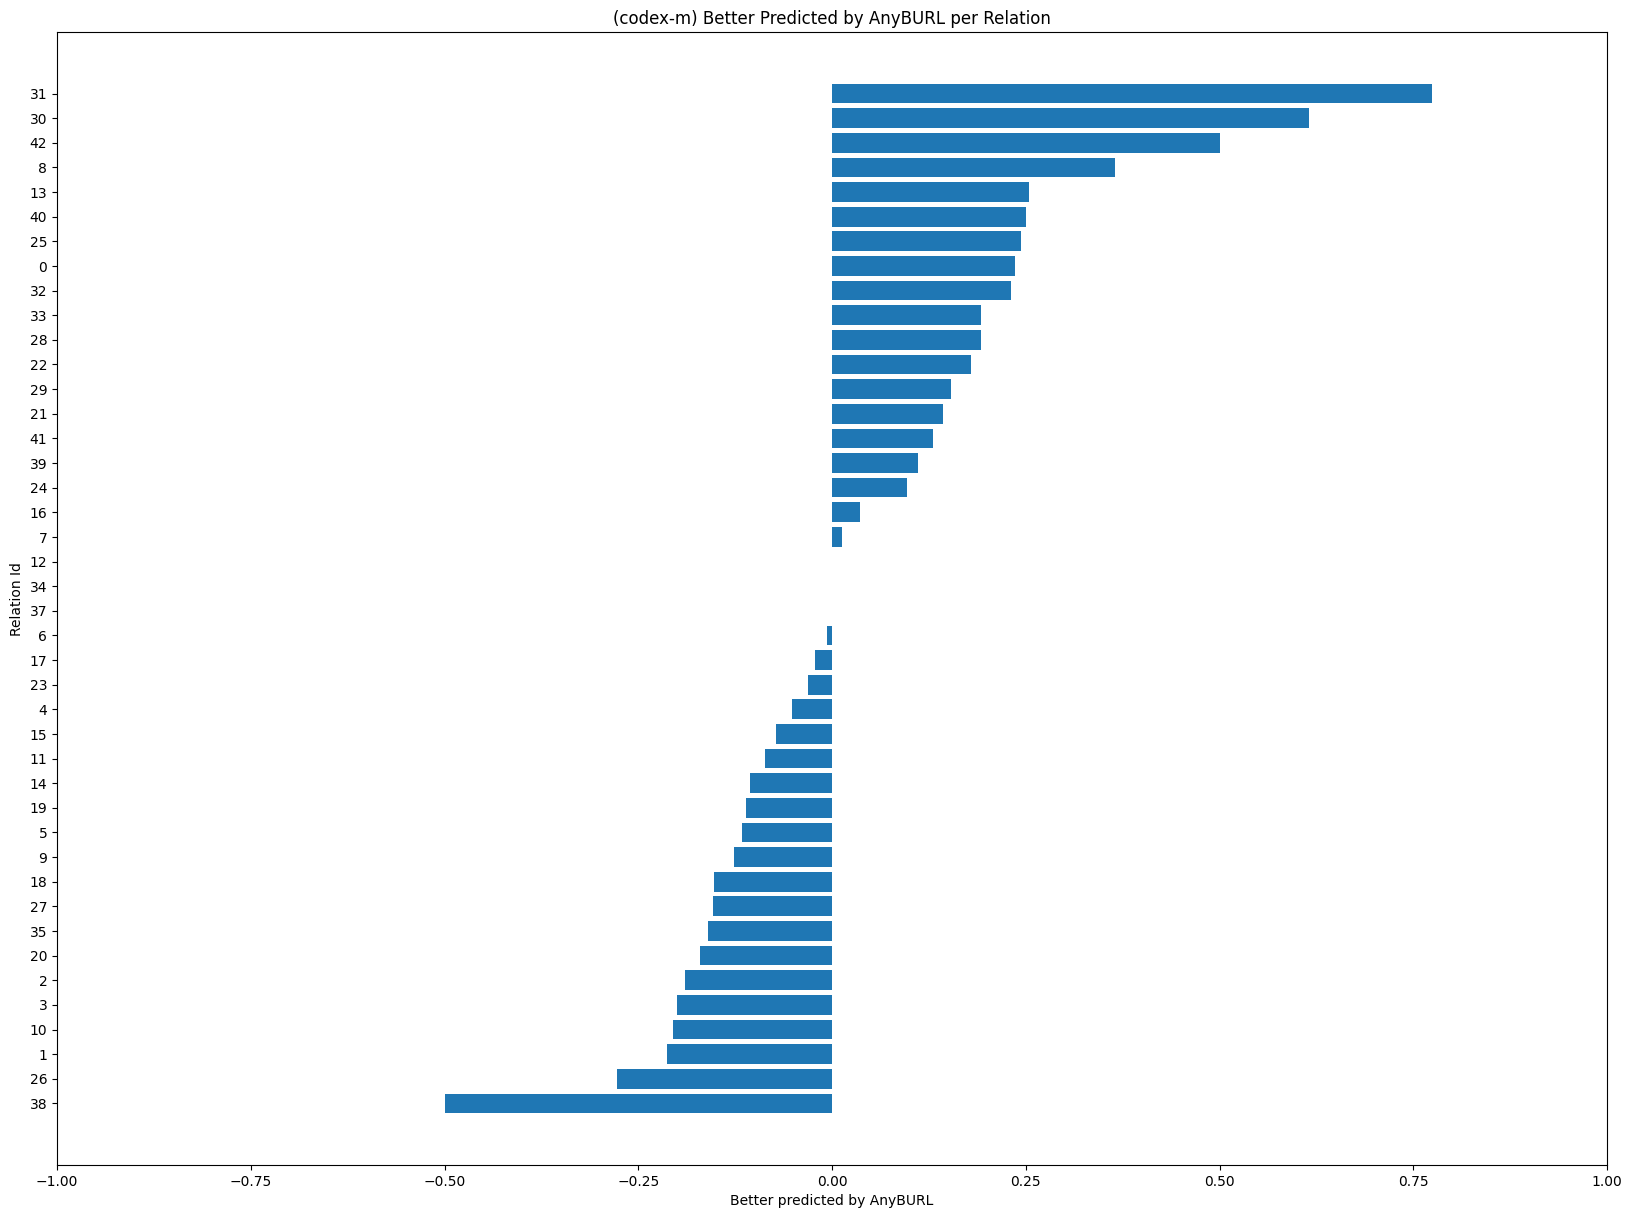

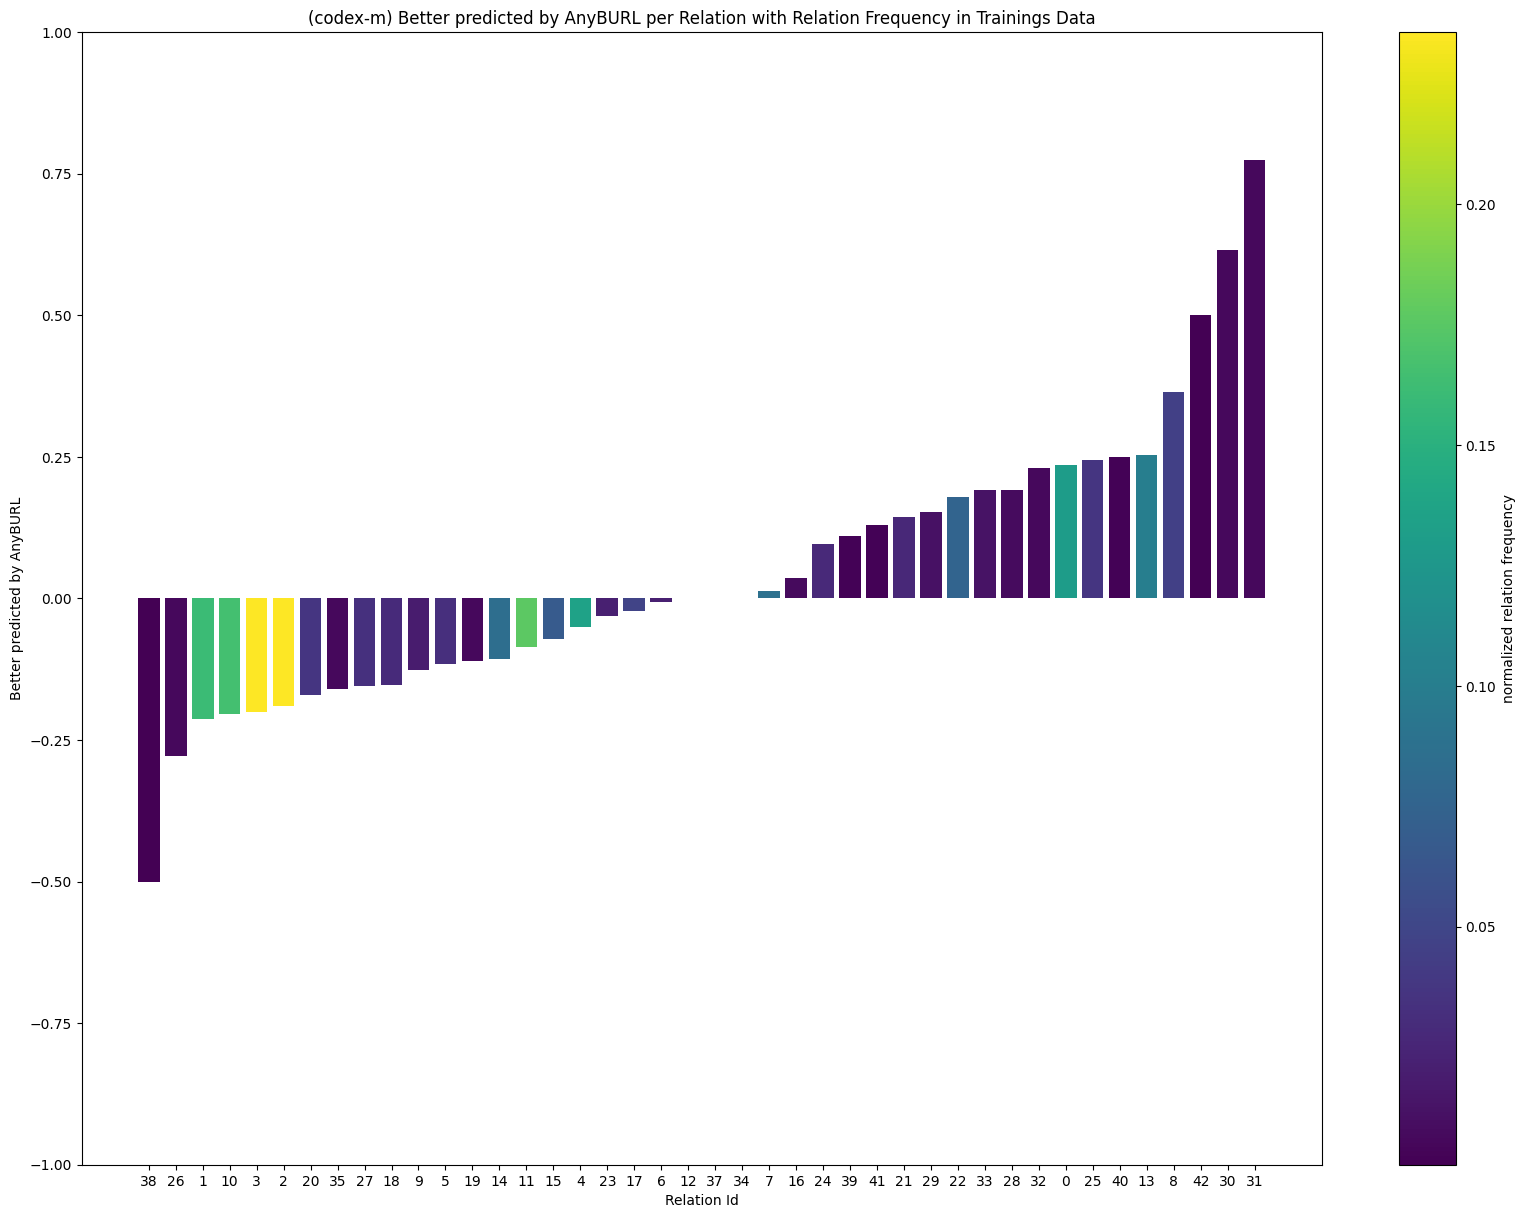

Loading configuration of dataset codex-m from d:\files\git\kge\data\codex-m ...
Loaded 51 keys from map relation_ids
Setting reciprocal_relations_model.base_model.entity_embedder.dropout to 0., was set to -0.06161046028137207.
Setting reciprocal_relations_model.base_model.relation_embedder.dropout to 0., was set to -0.03550026472657919.
Loaded 51 keys from map relation_strings
  91210 distinct sp pairs in train
  9926 distinct po pairs in train


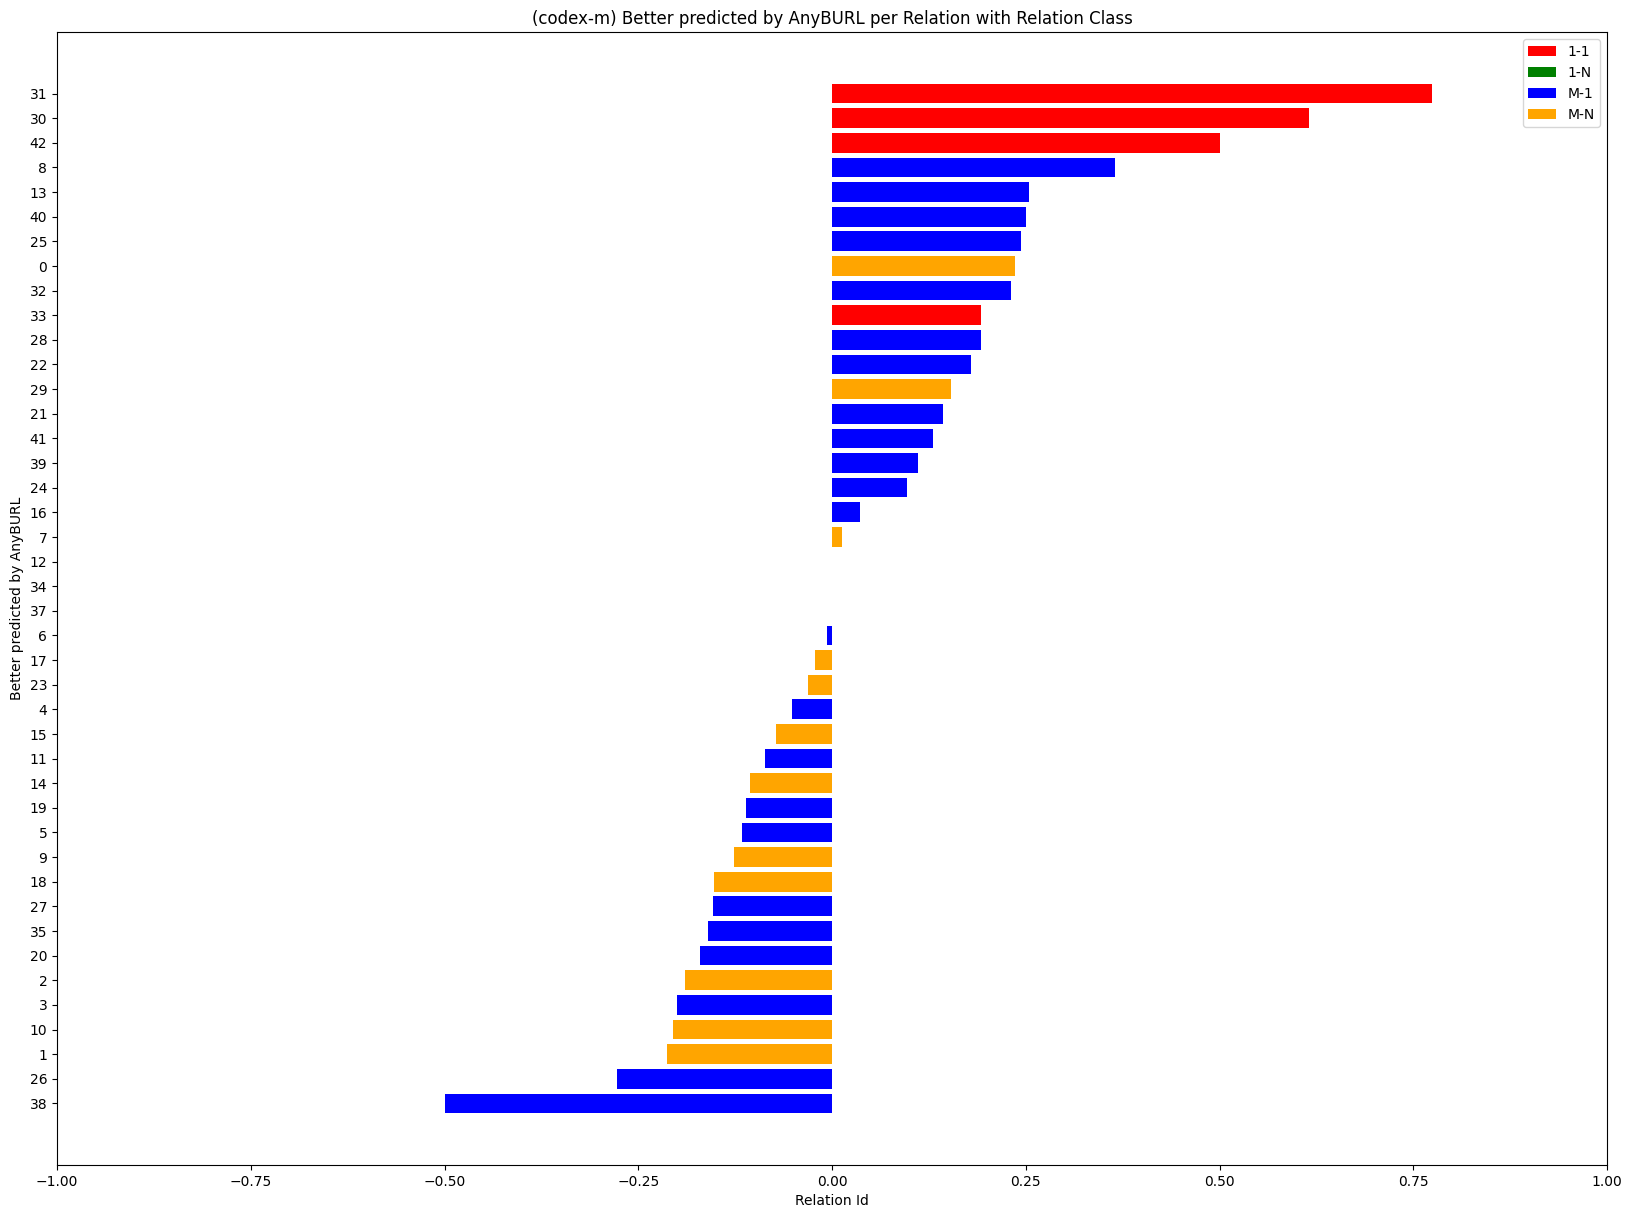

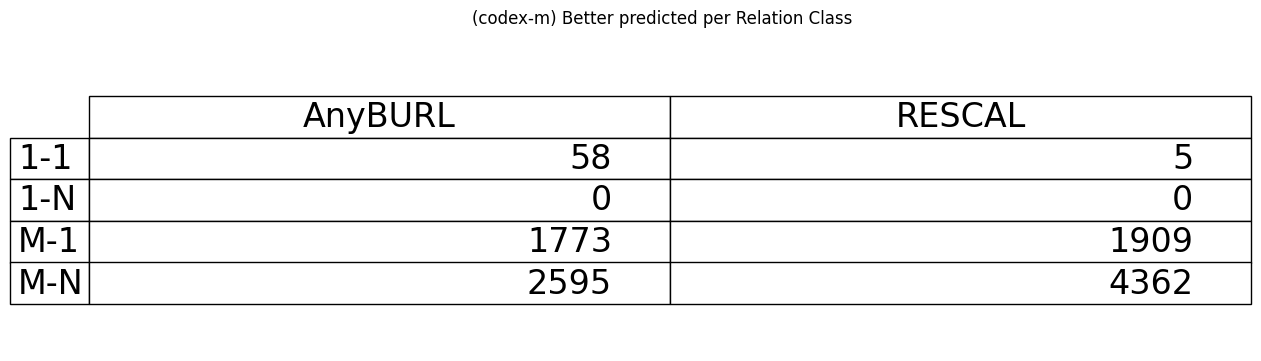

Working on wnrr - AnyBURL - ComplEx


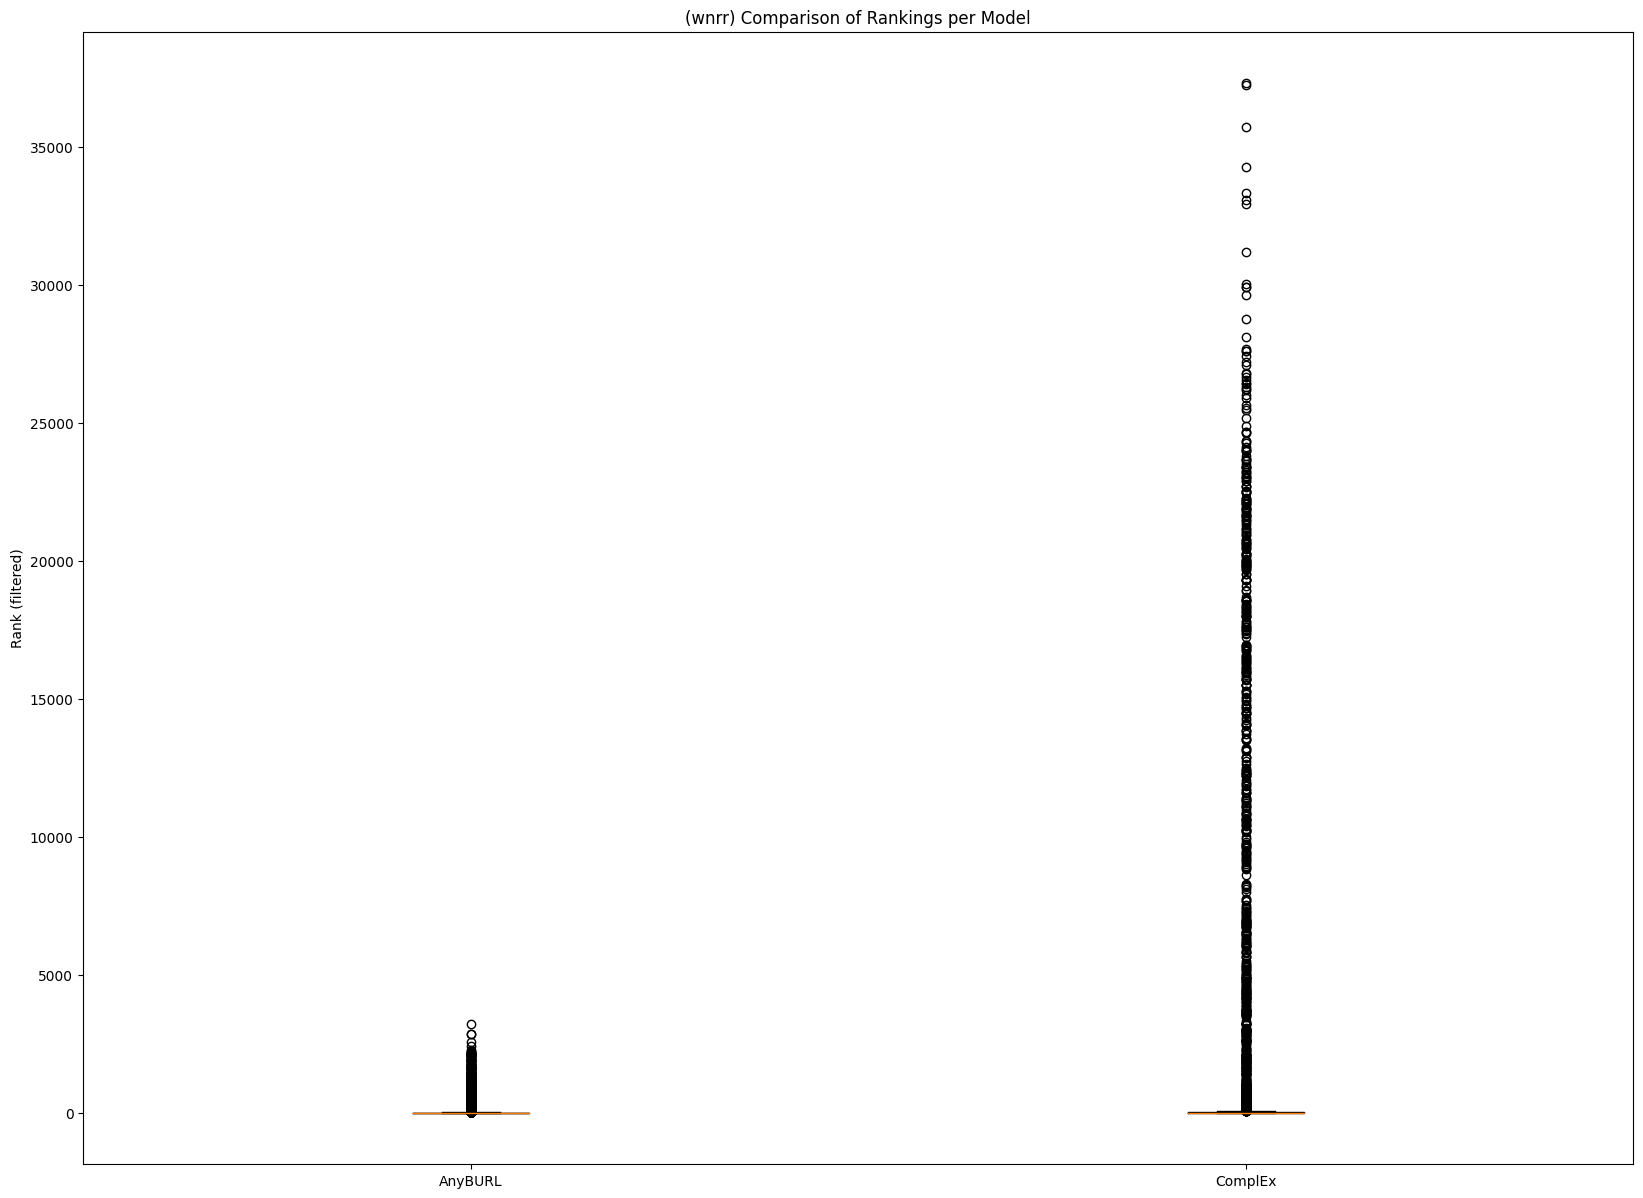

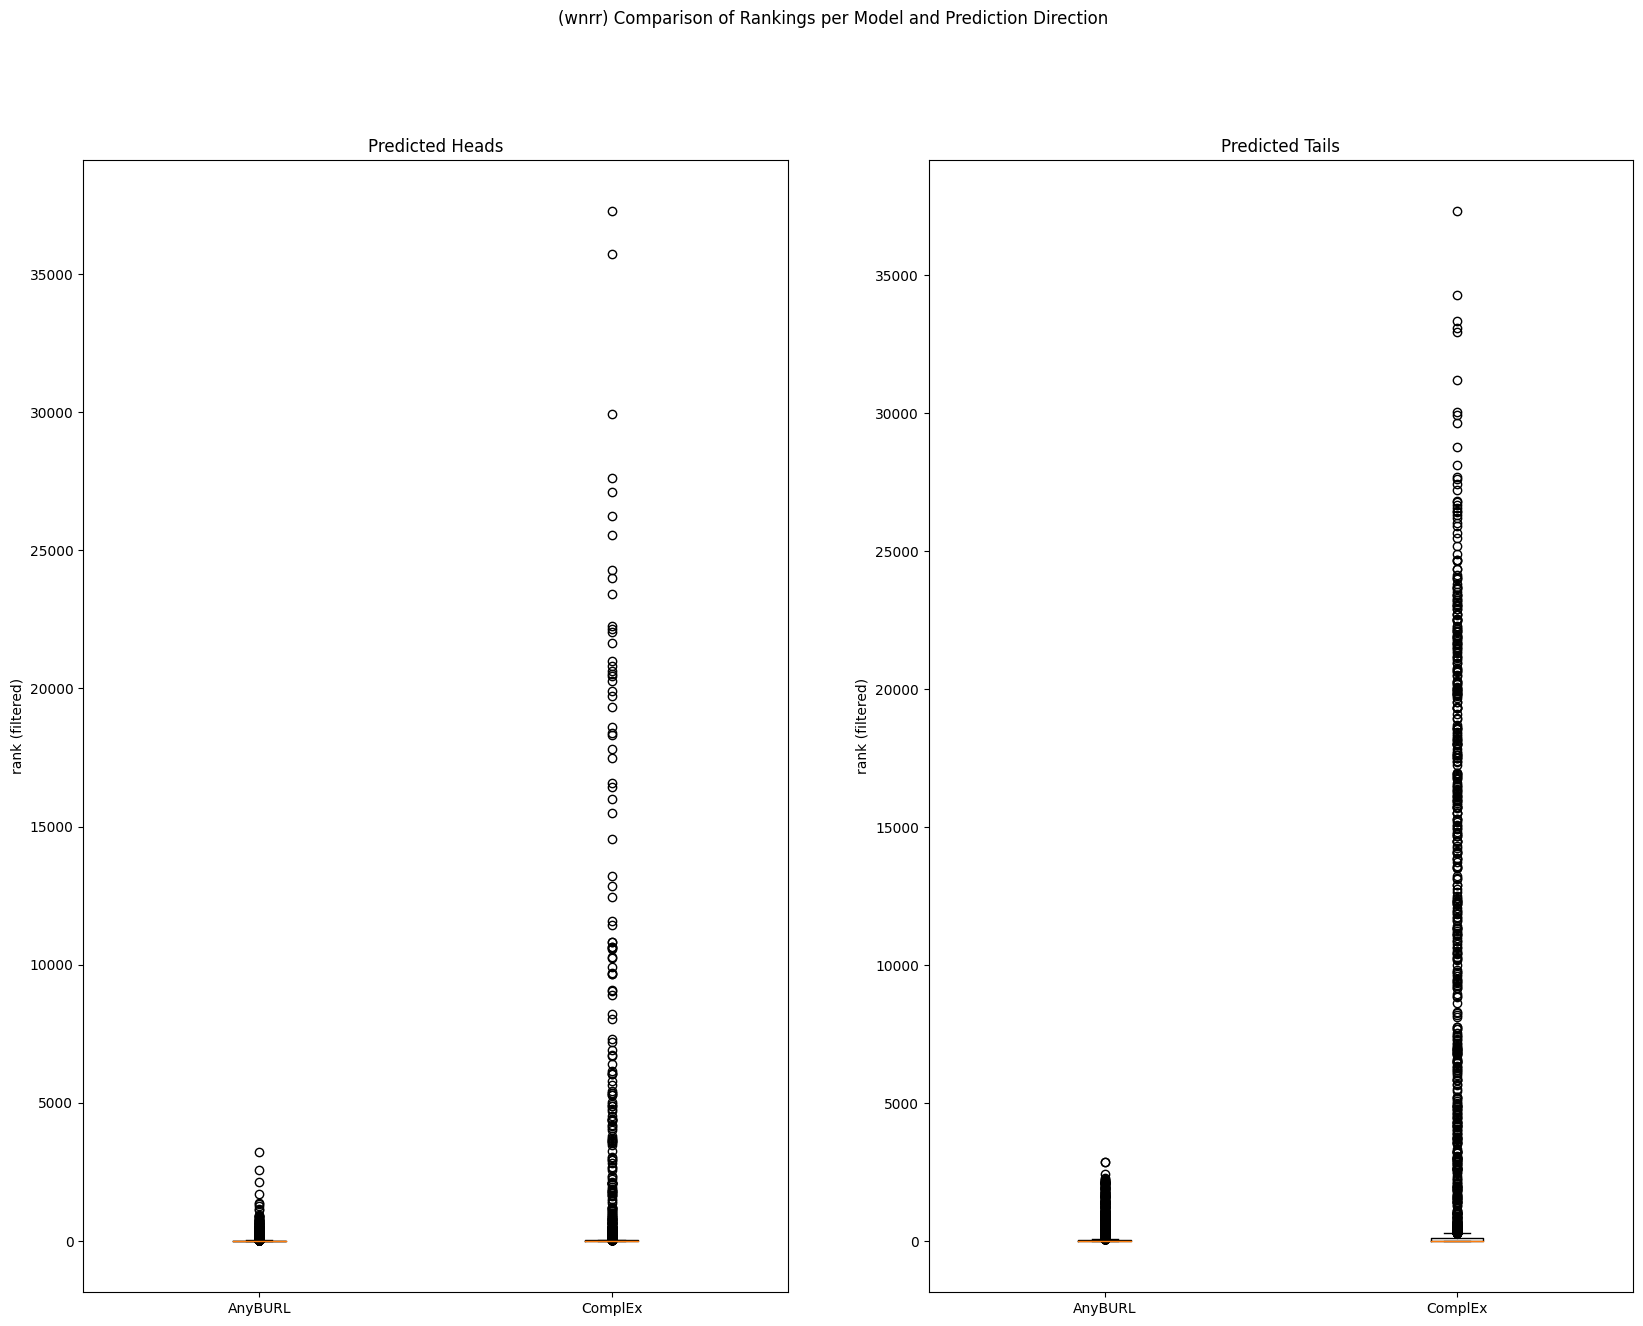

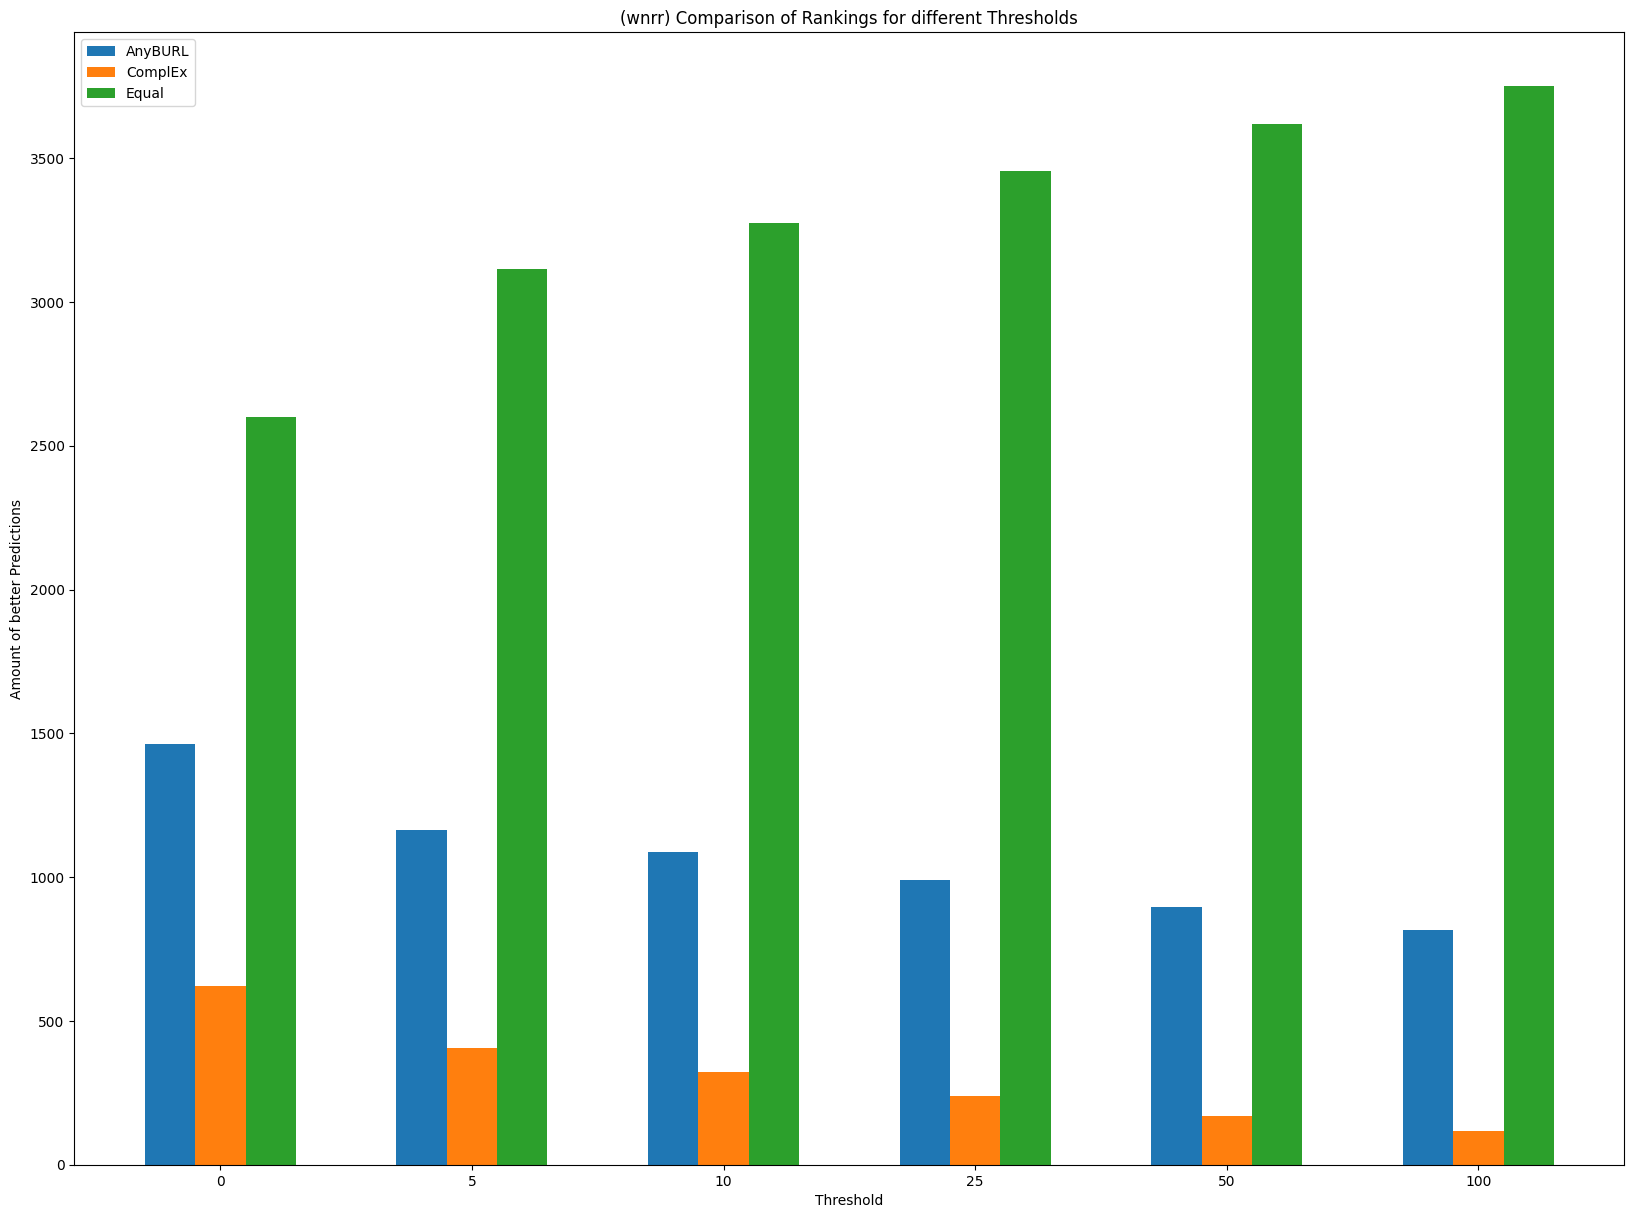

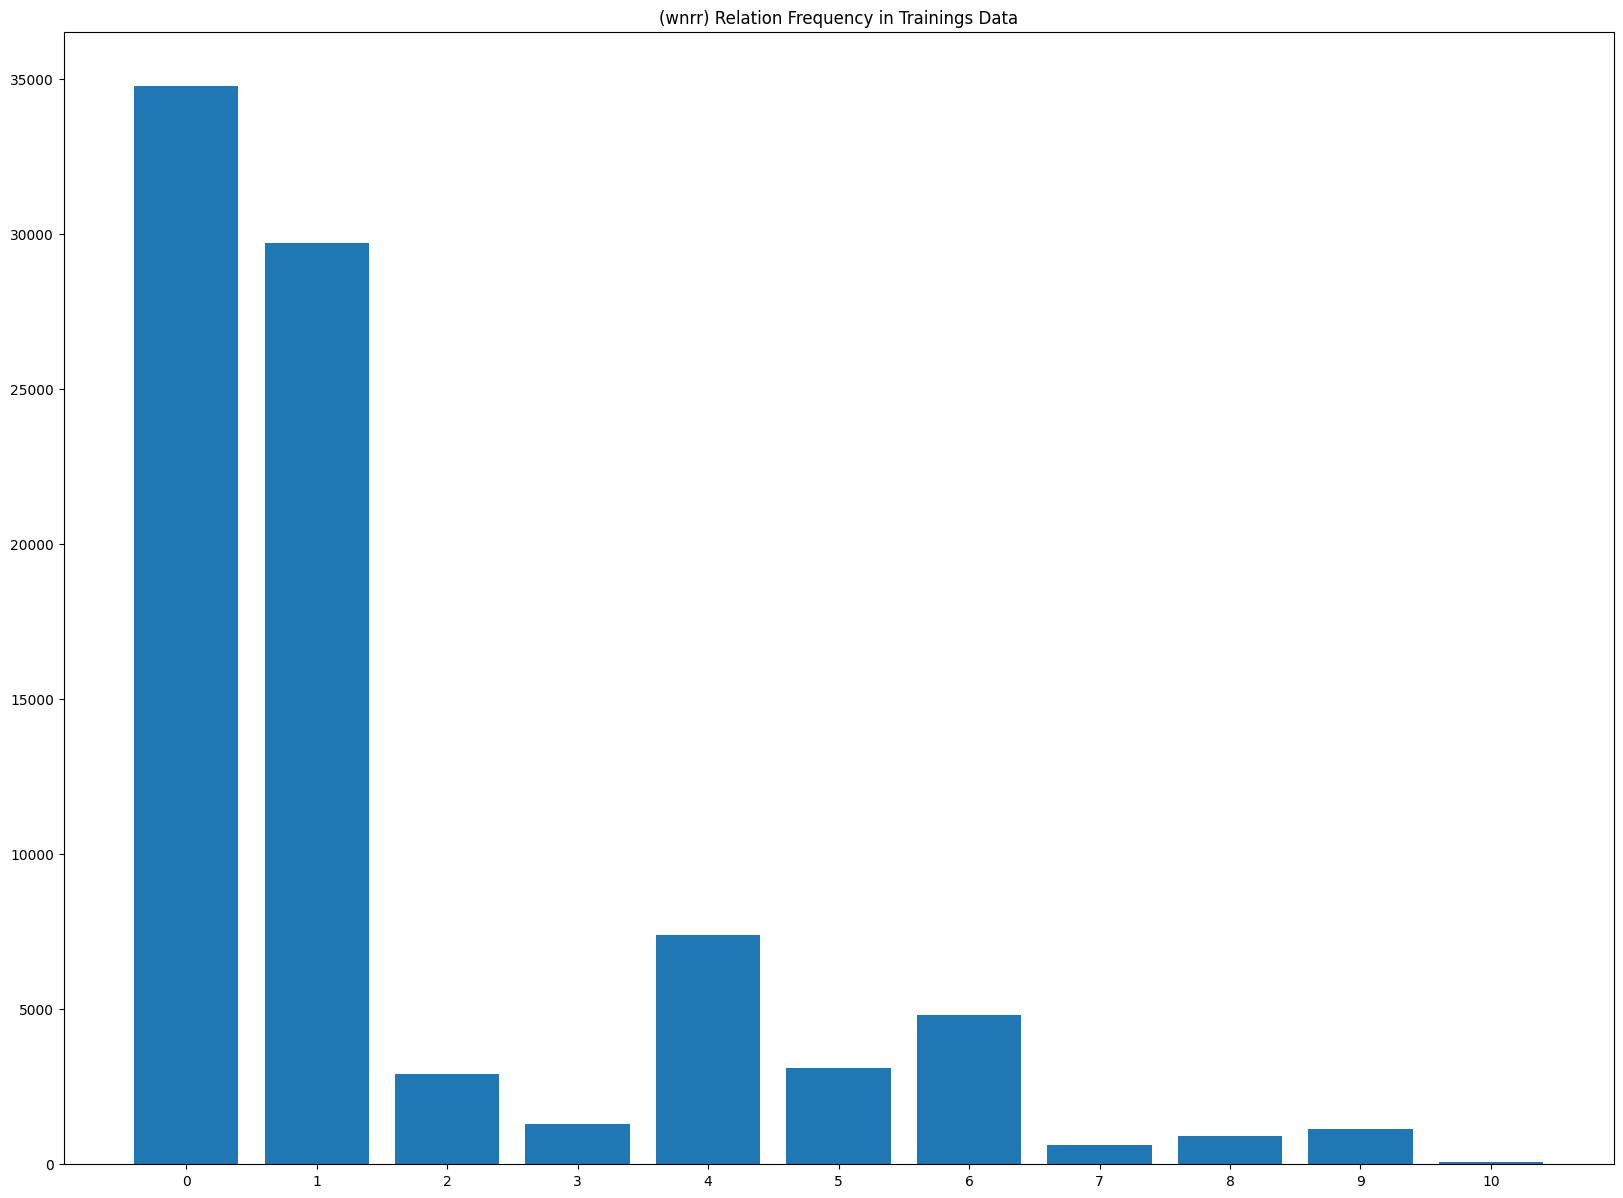

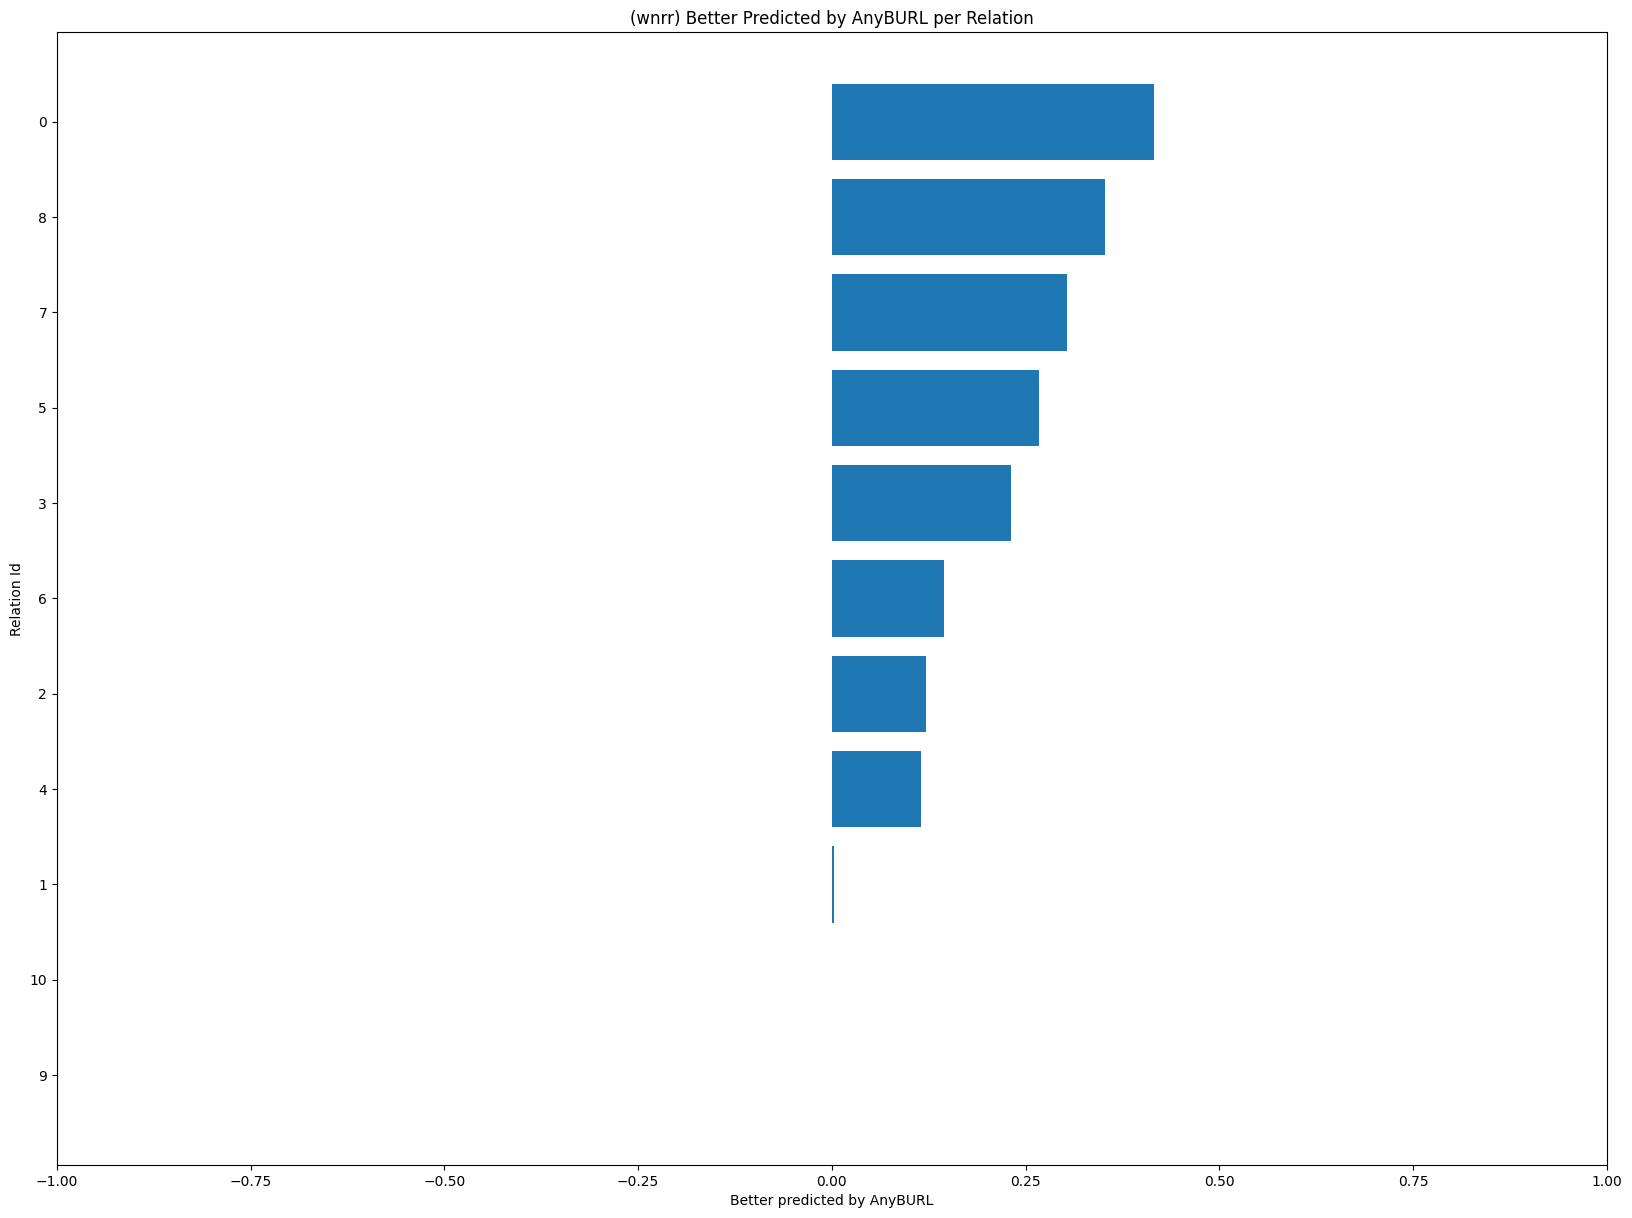

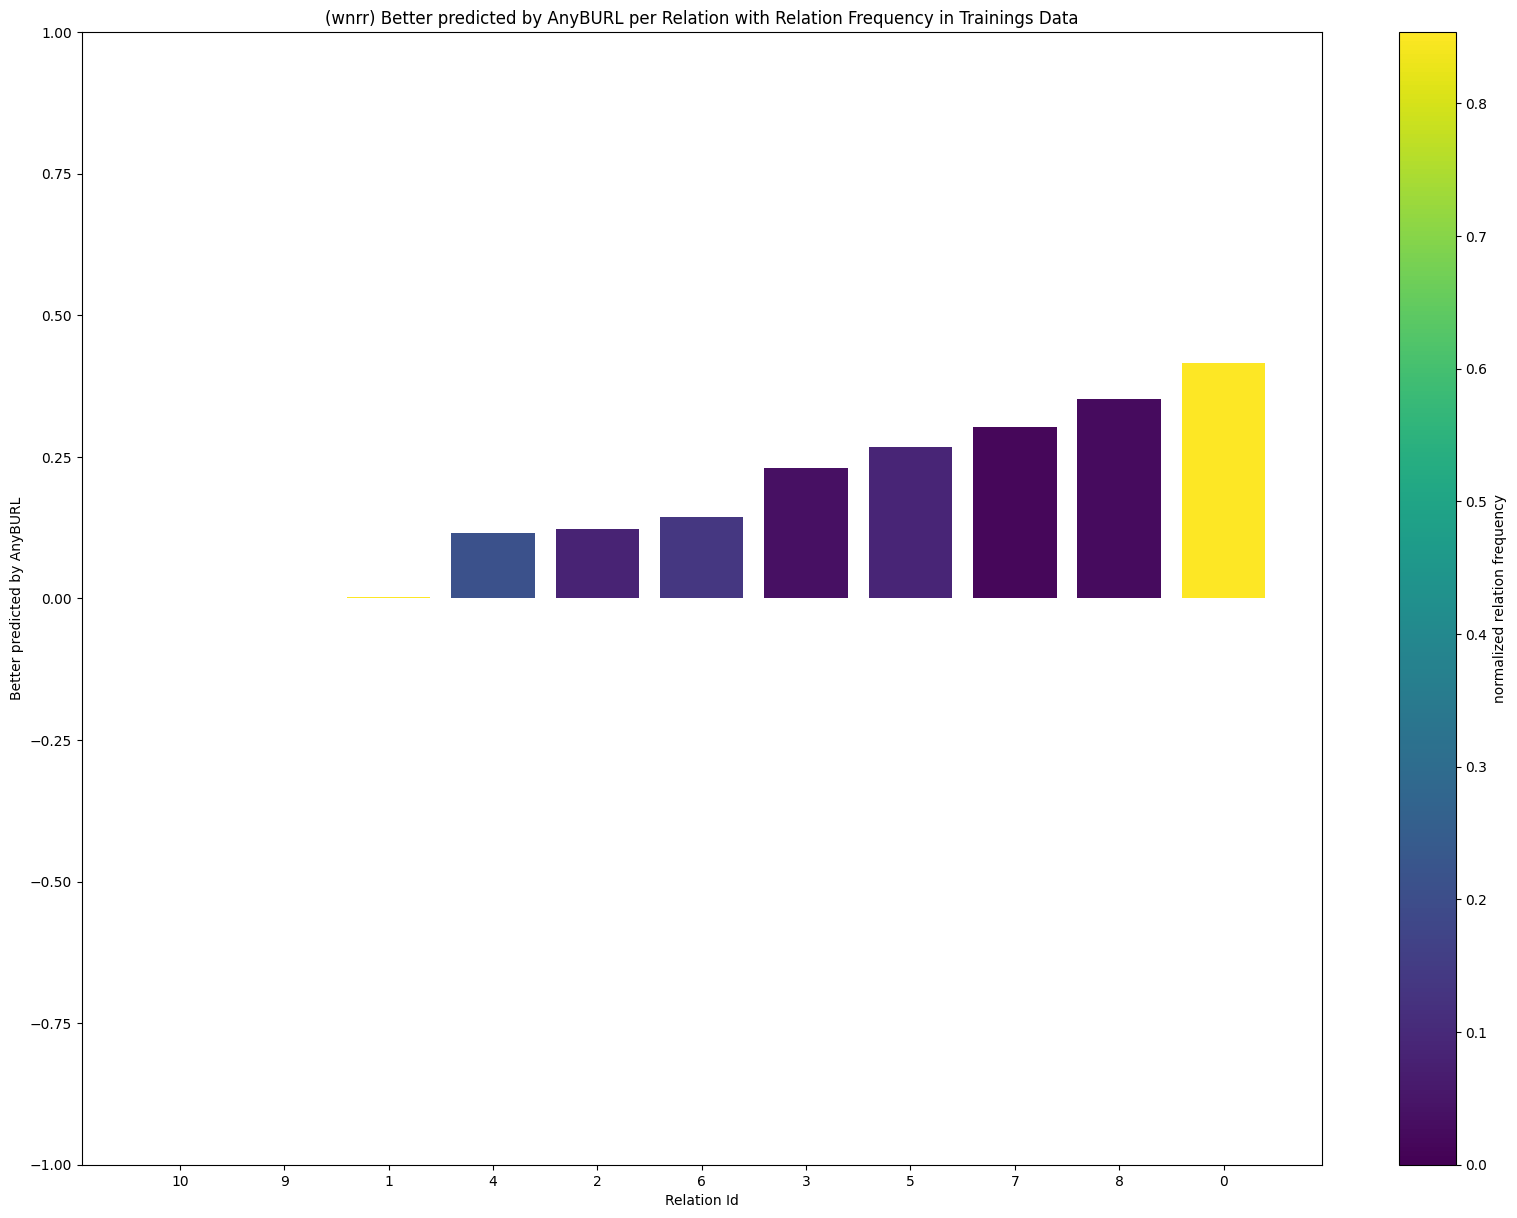

Loading configuration of dataset wnrr from d:\files\git\kge\data\wnrr ...
Loaded 11 keys from map relation_strings
  62547 distinct sp pairs in train
  40962 distinct po pairs in train


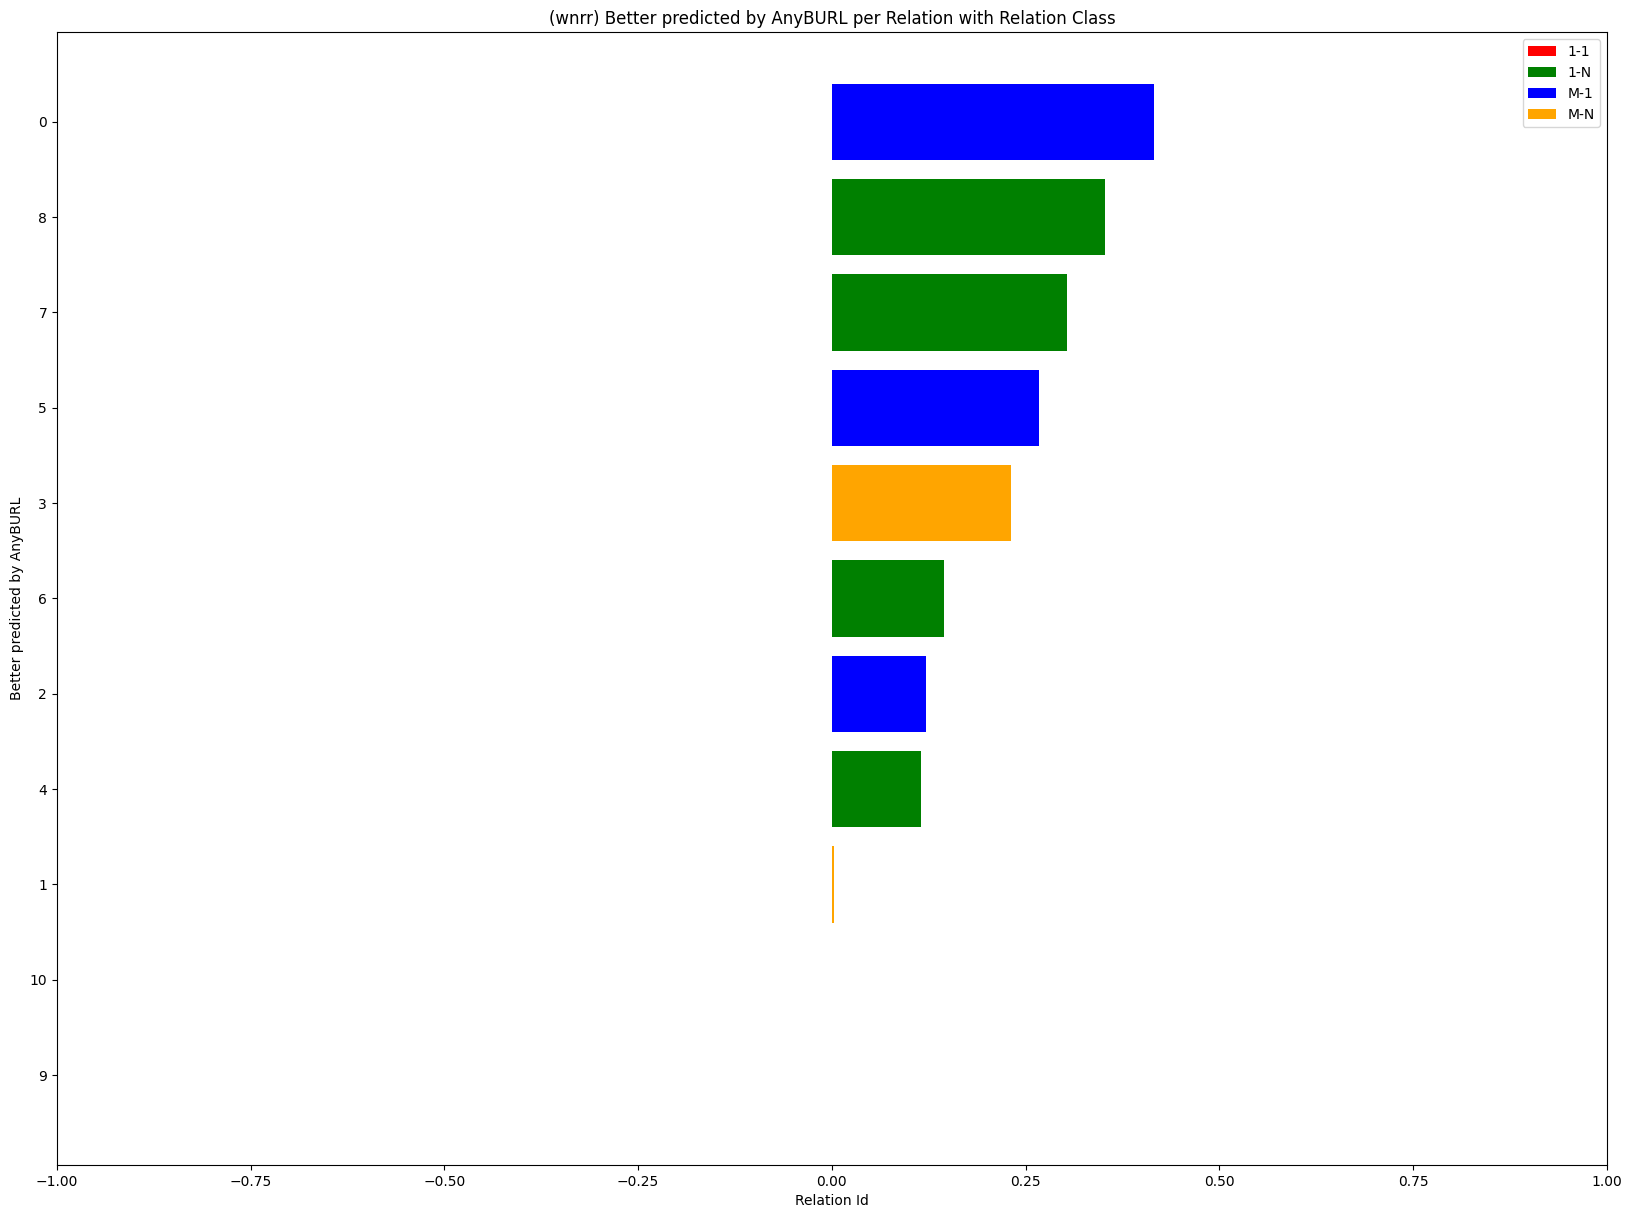

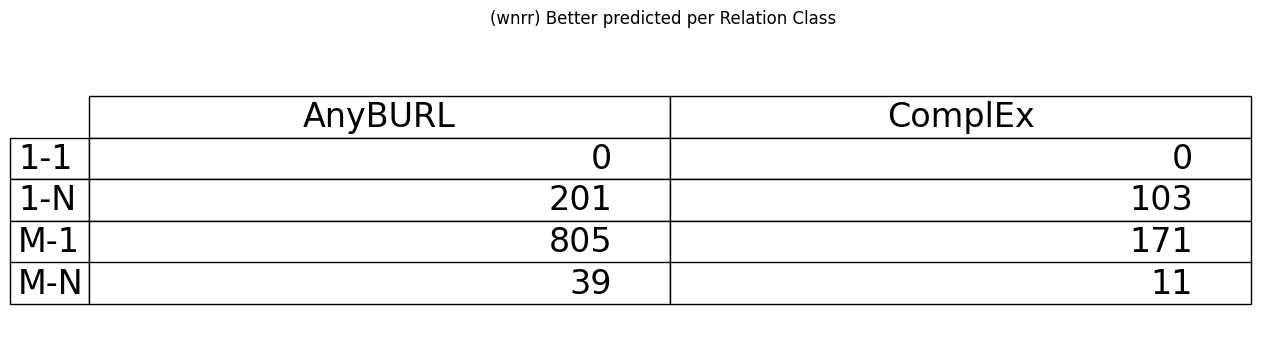

Working on fb15k-237 - AnyBURL - ComplEx


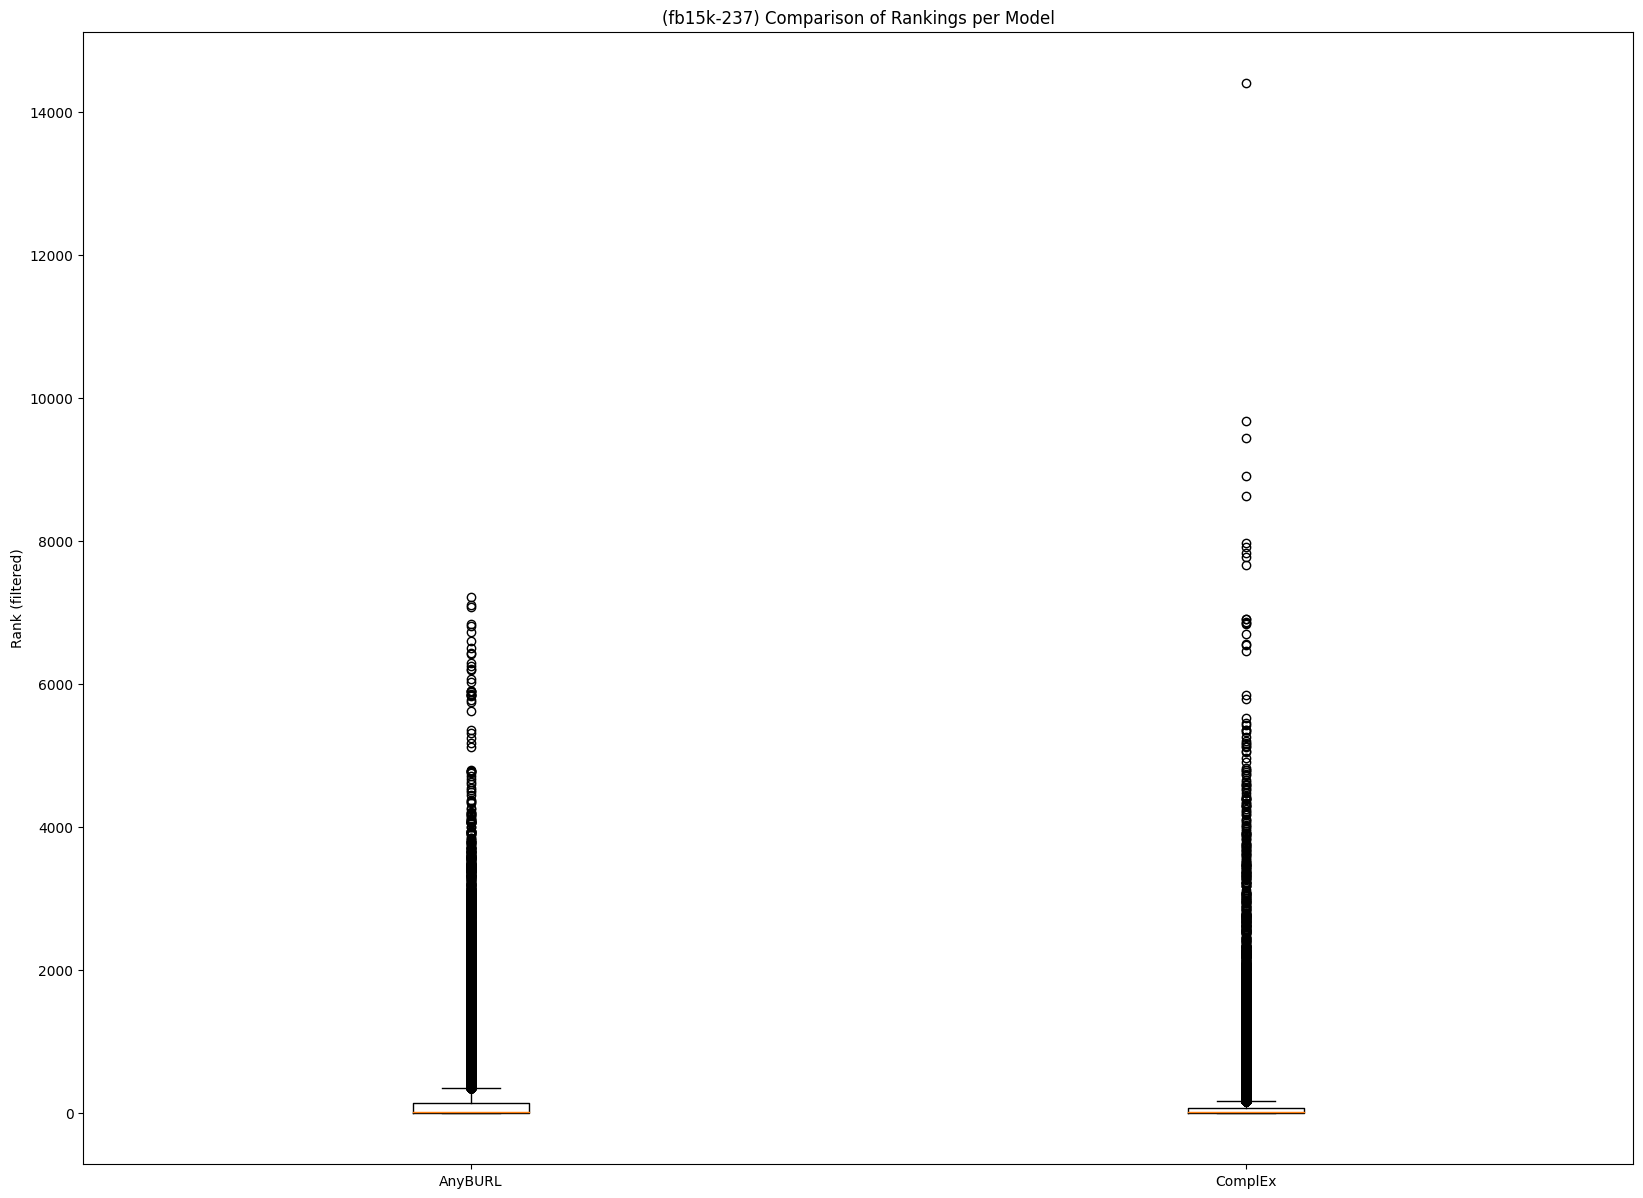

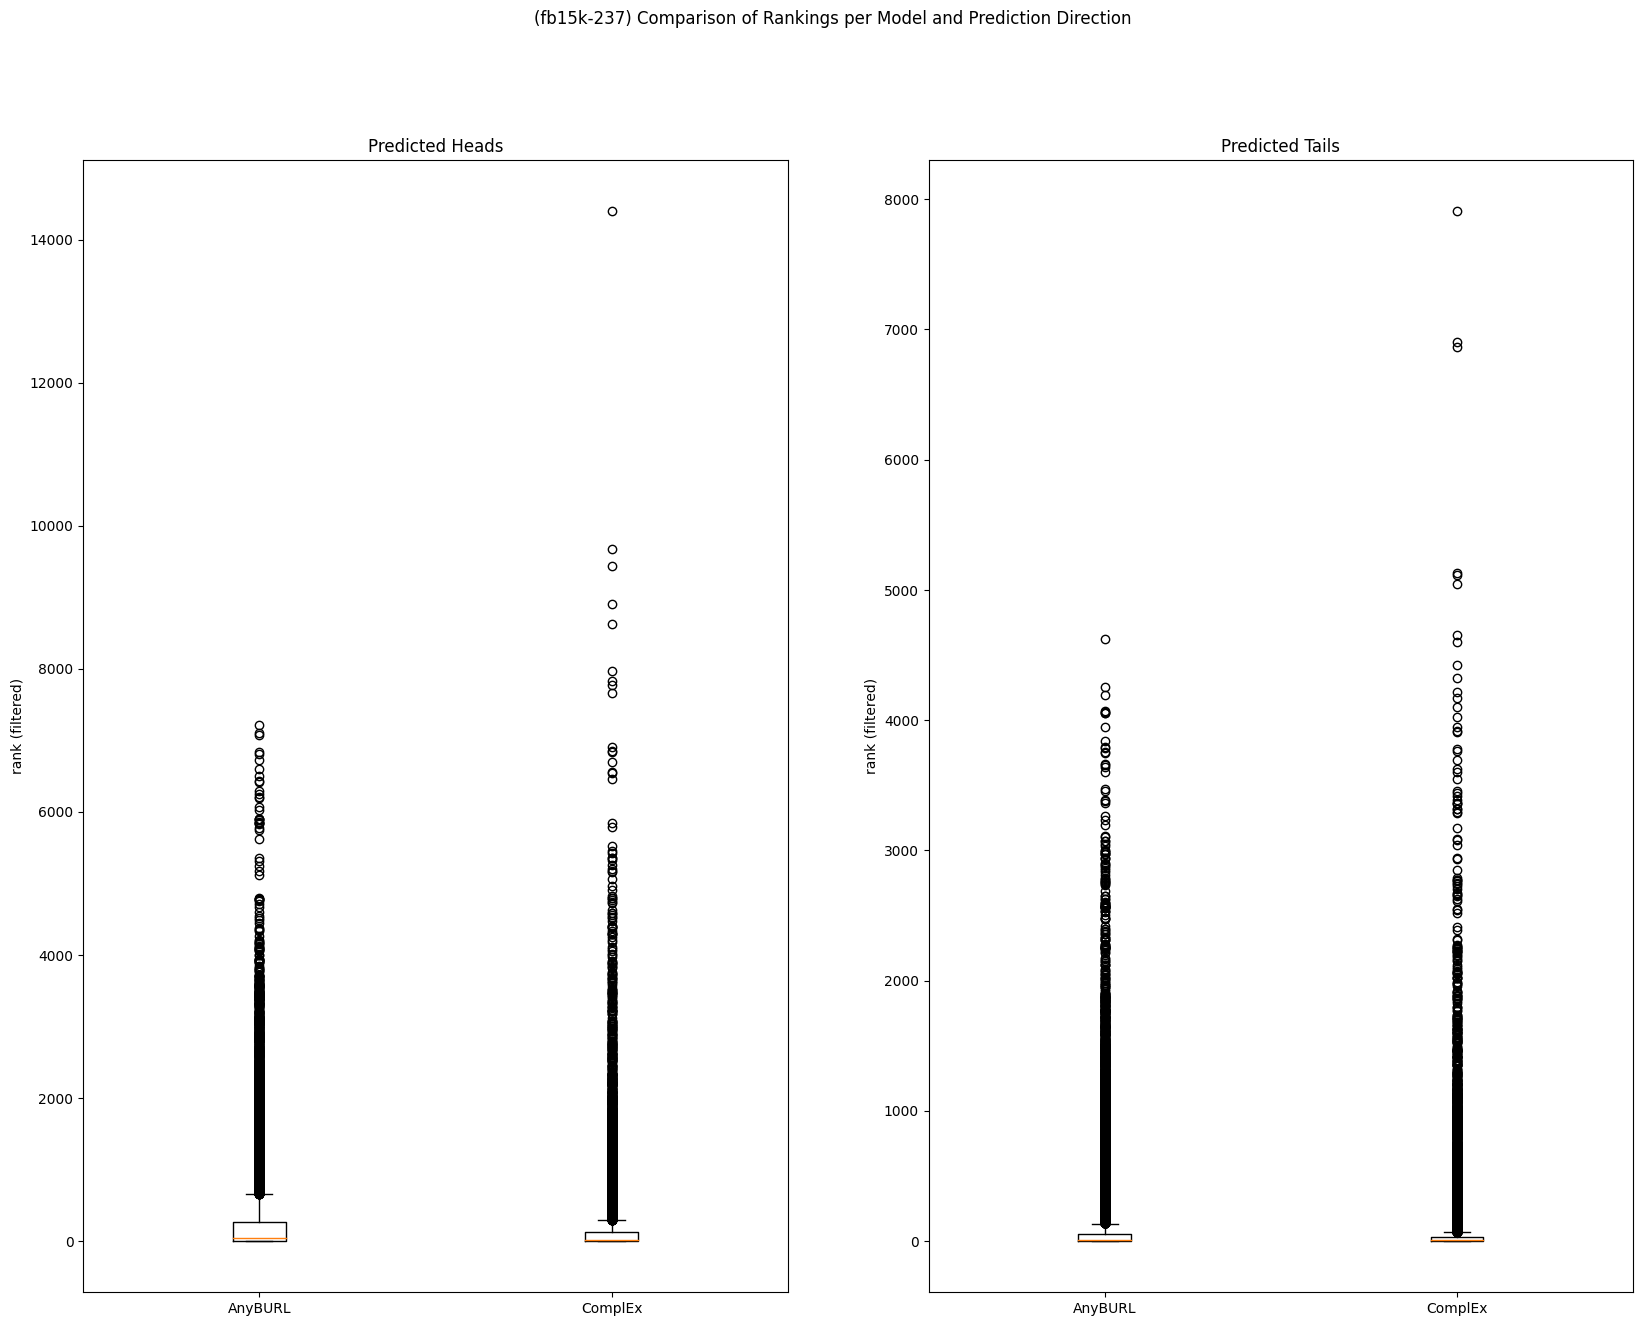

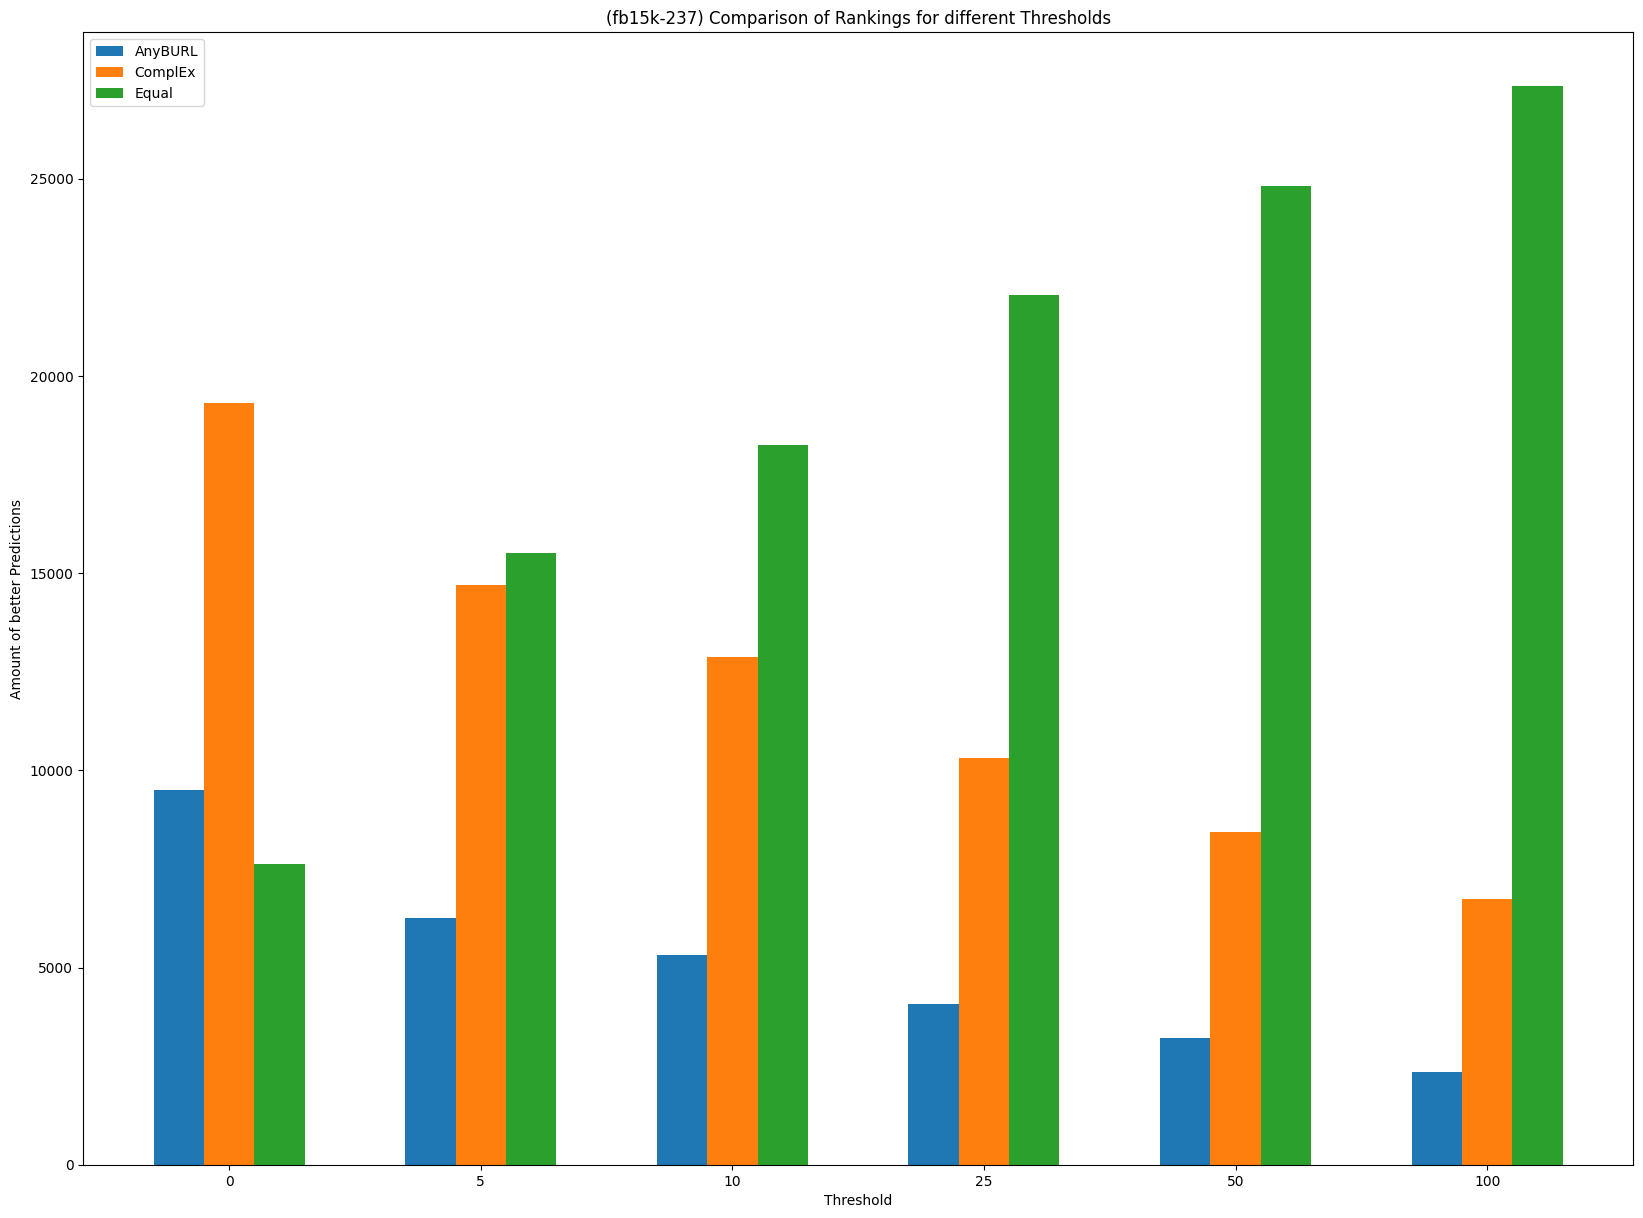

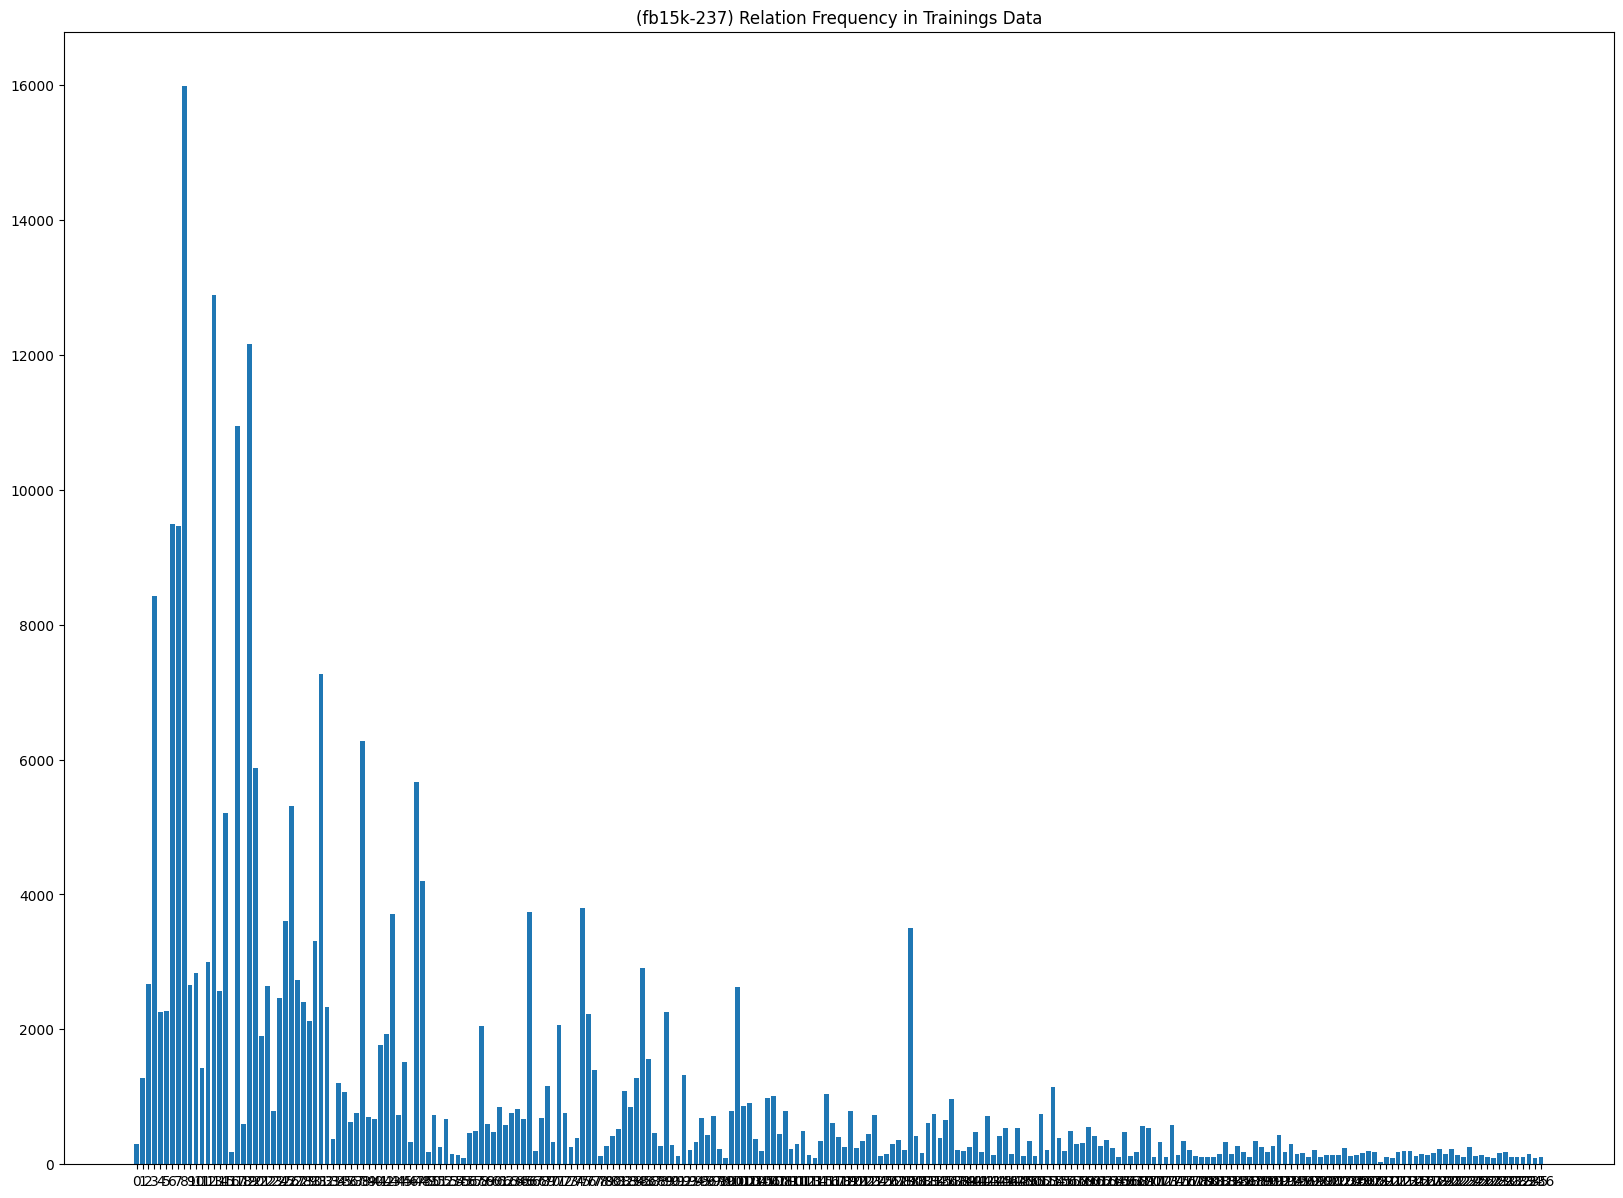

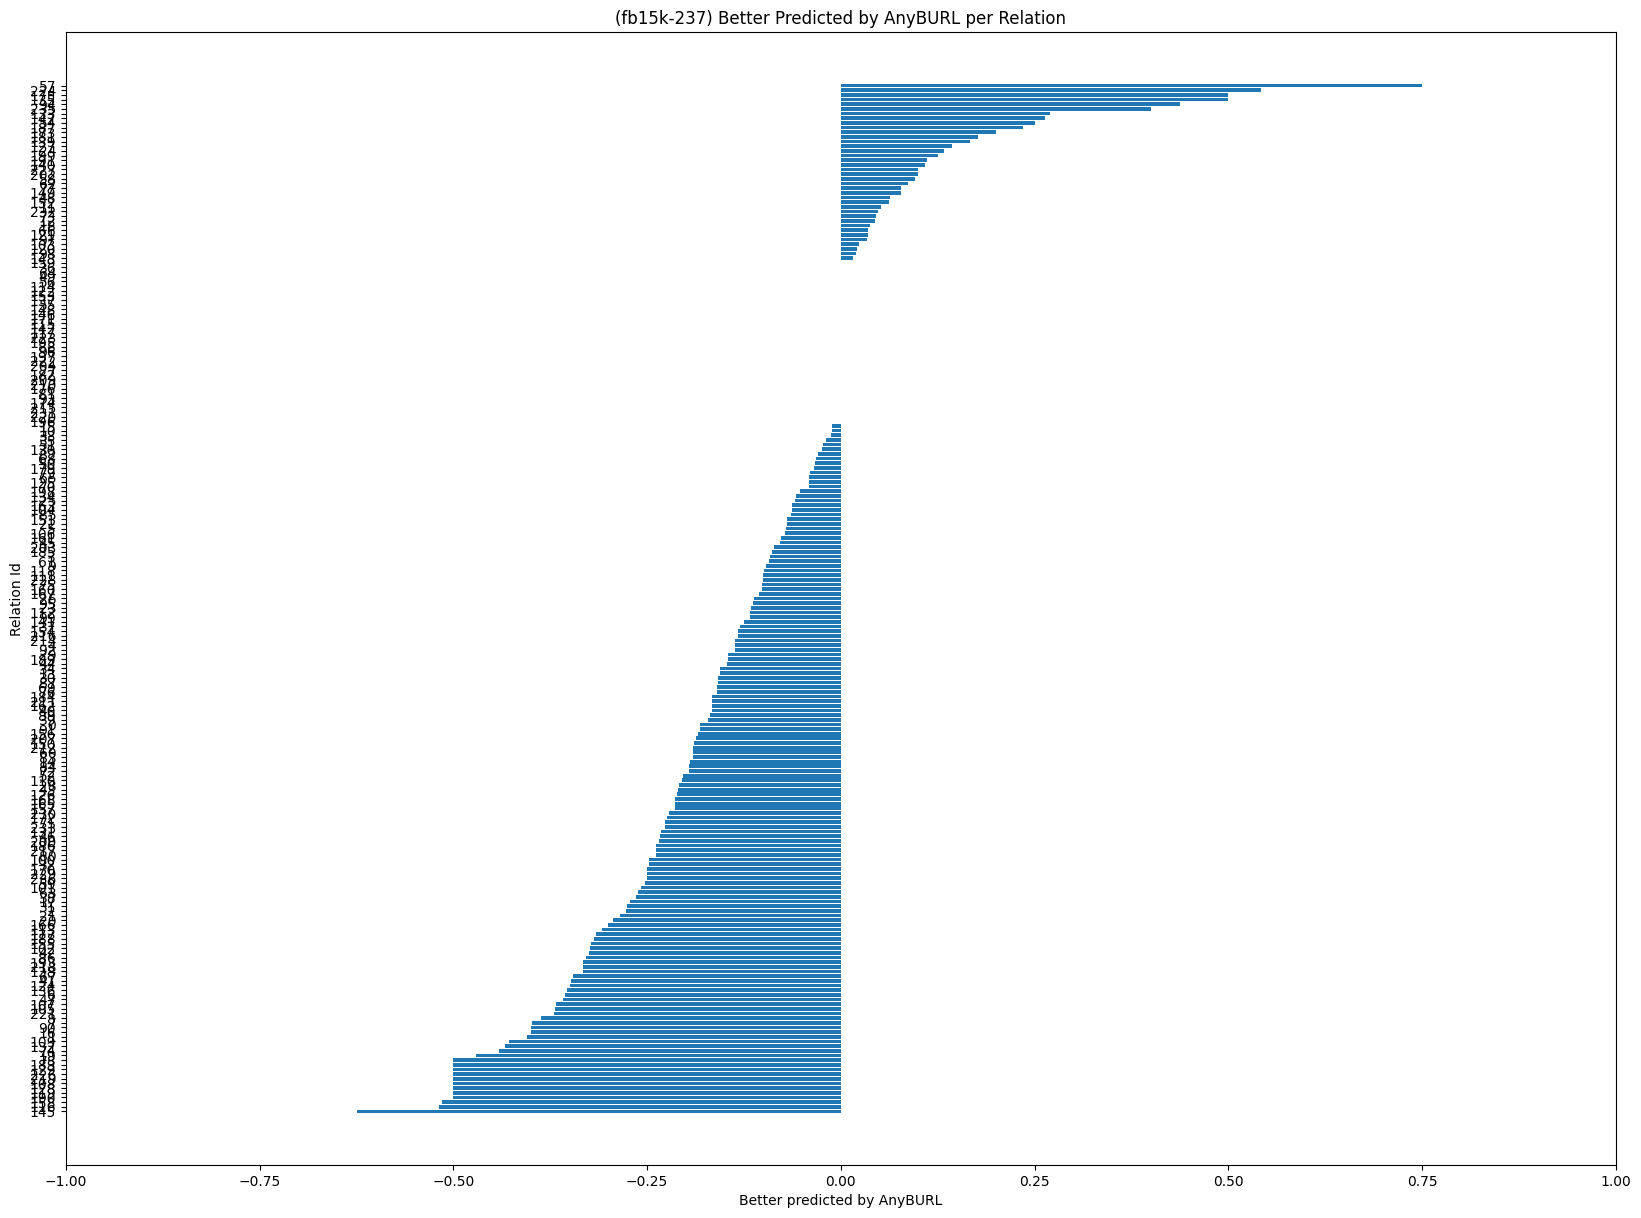

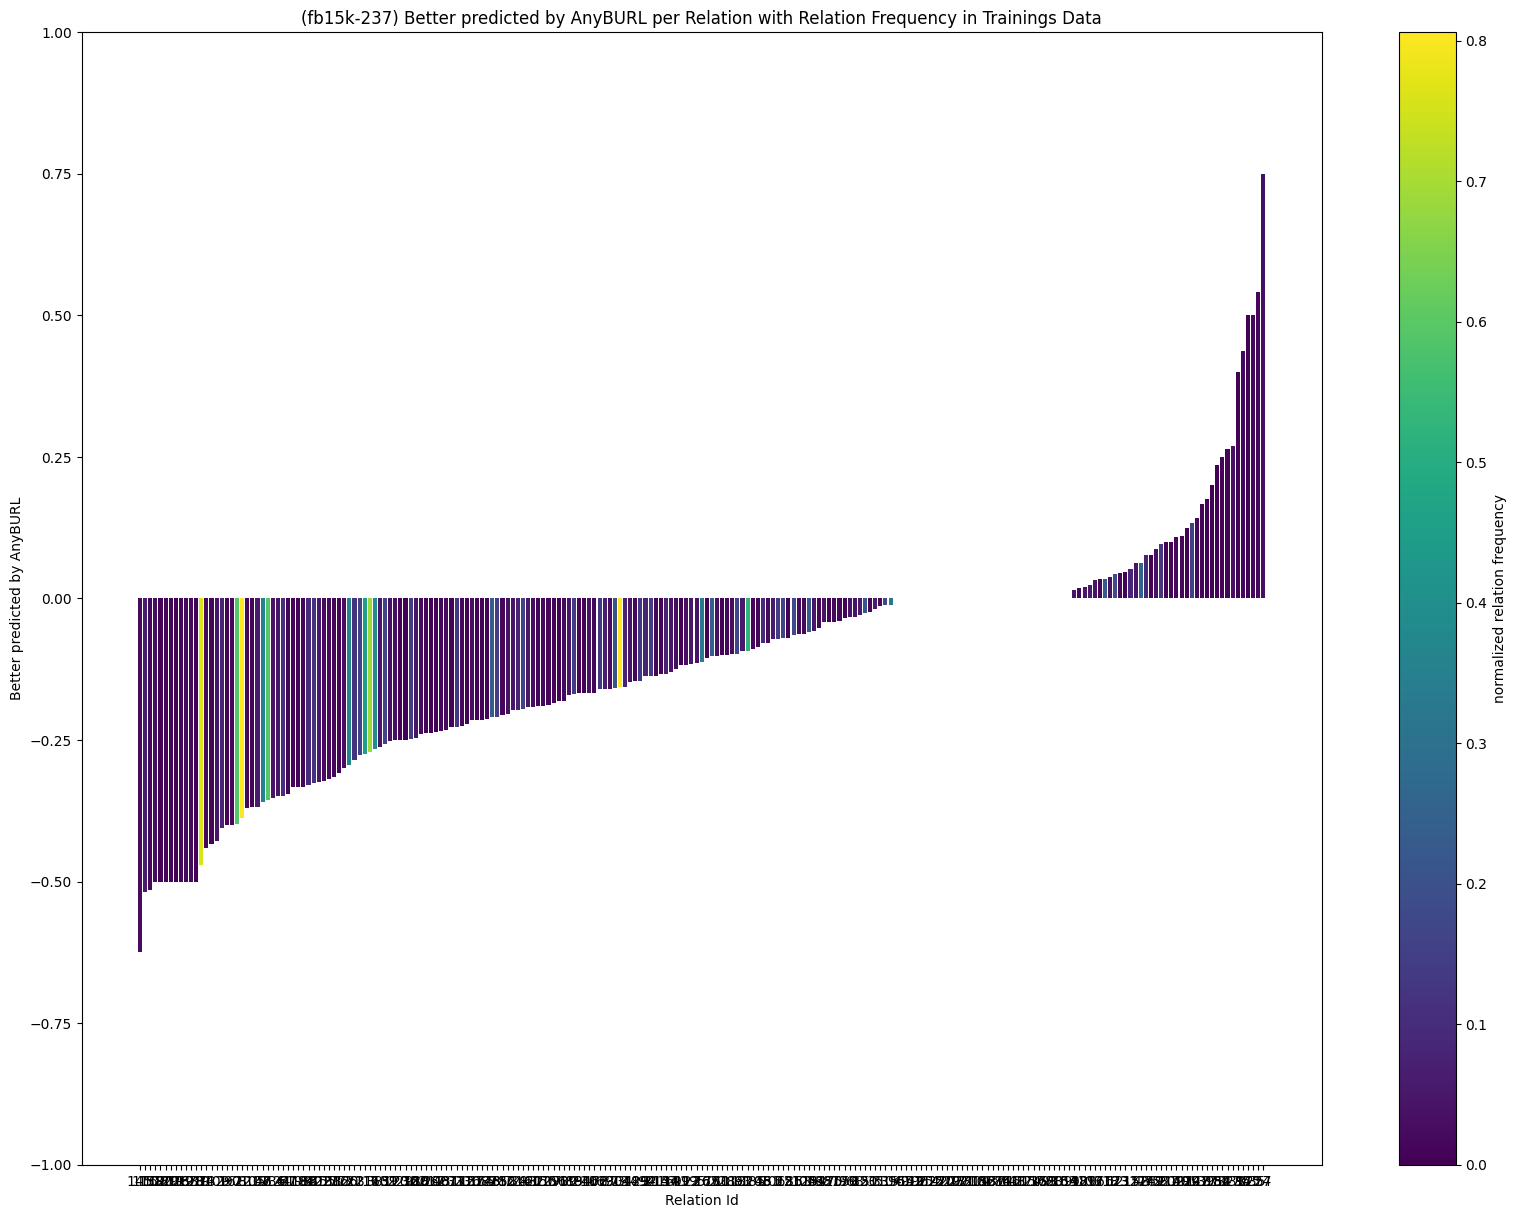

Loading configuration of dataset fb15k-237 from d:\files\git\kge\data\fb15k-237 ...
Loaded 237 keys from map relation_ids
Loaded 237 keys from map relation_strings
  93372 distinct sp pairs in train
  56317 distinct po pairs in train


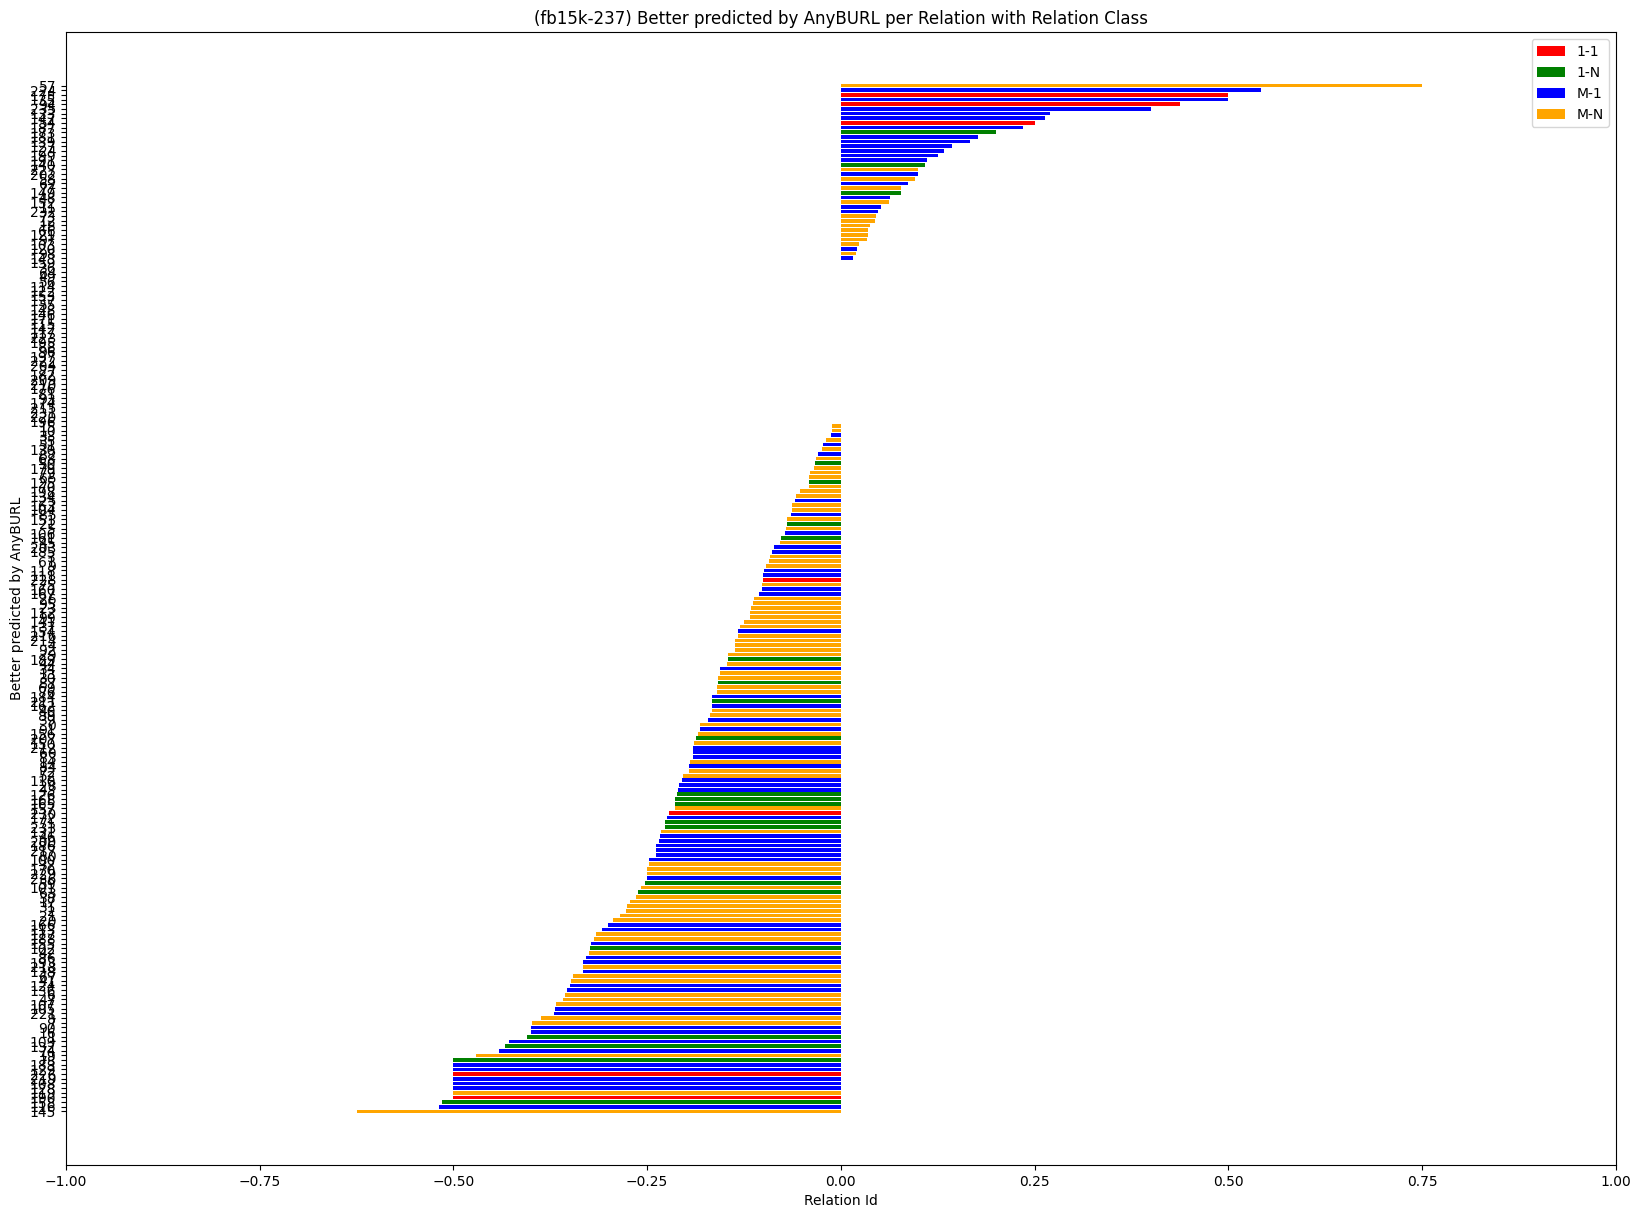

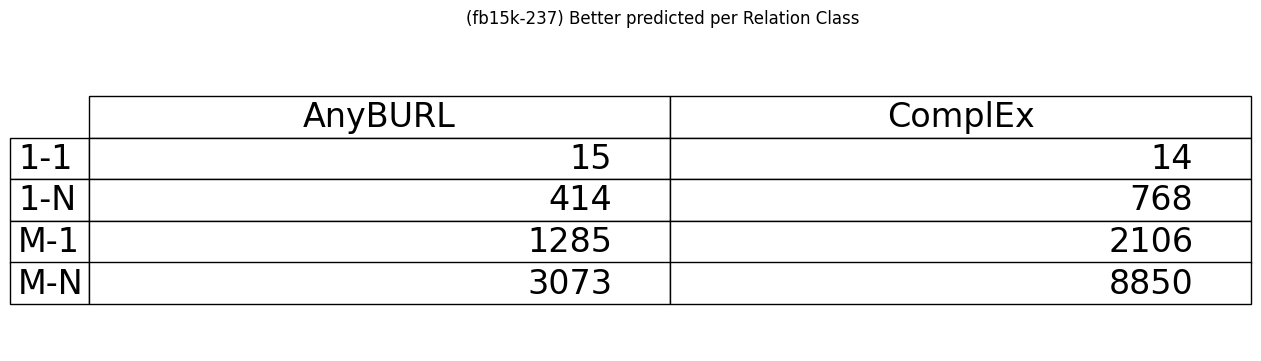

Working on fb15k-237 - AnyBURL - RESCAL


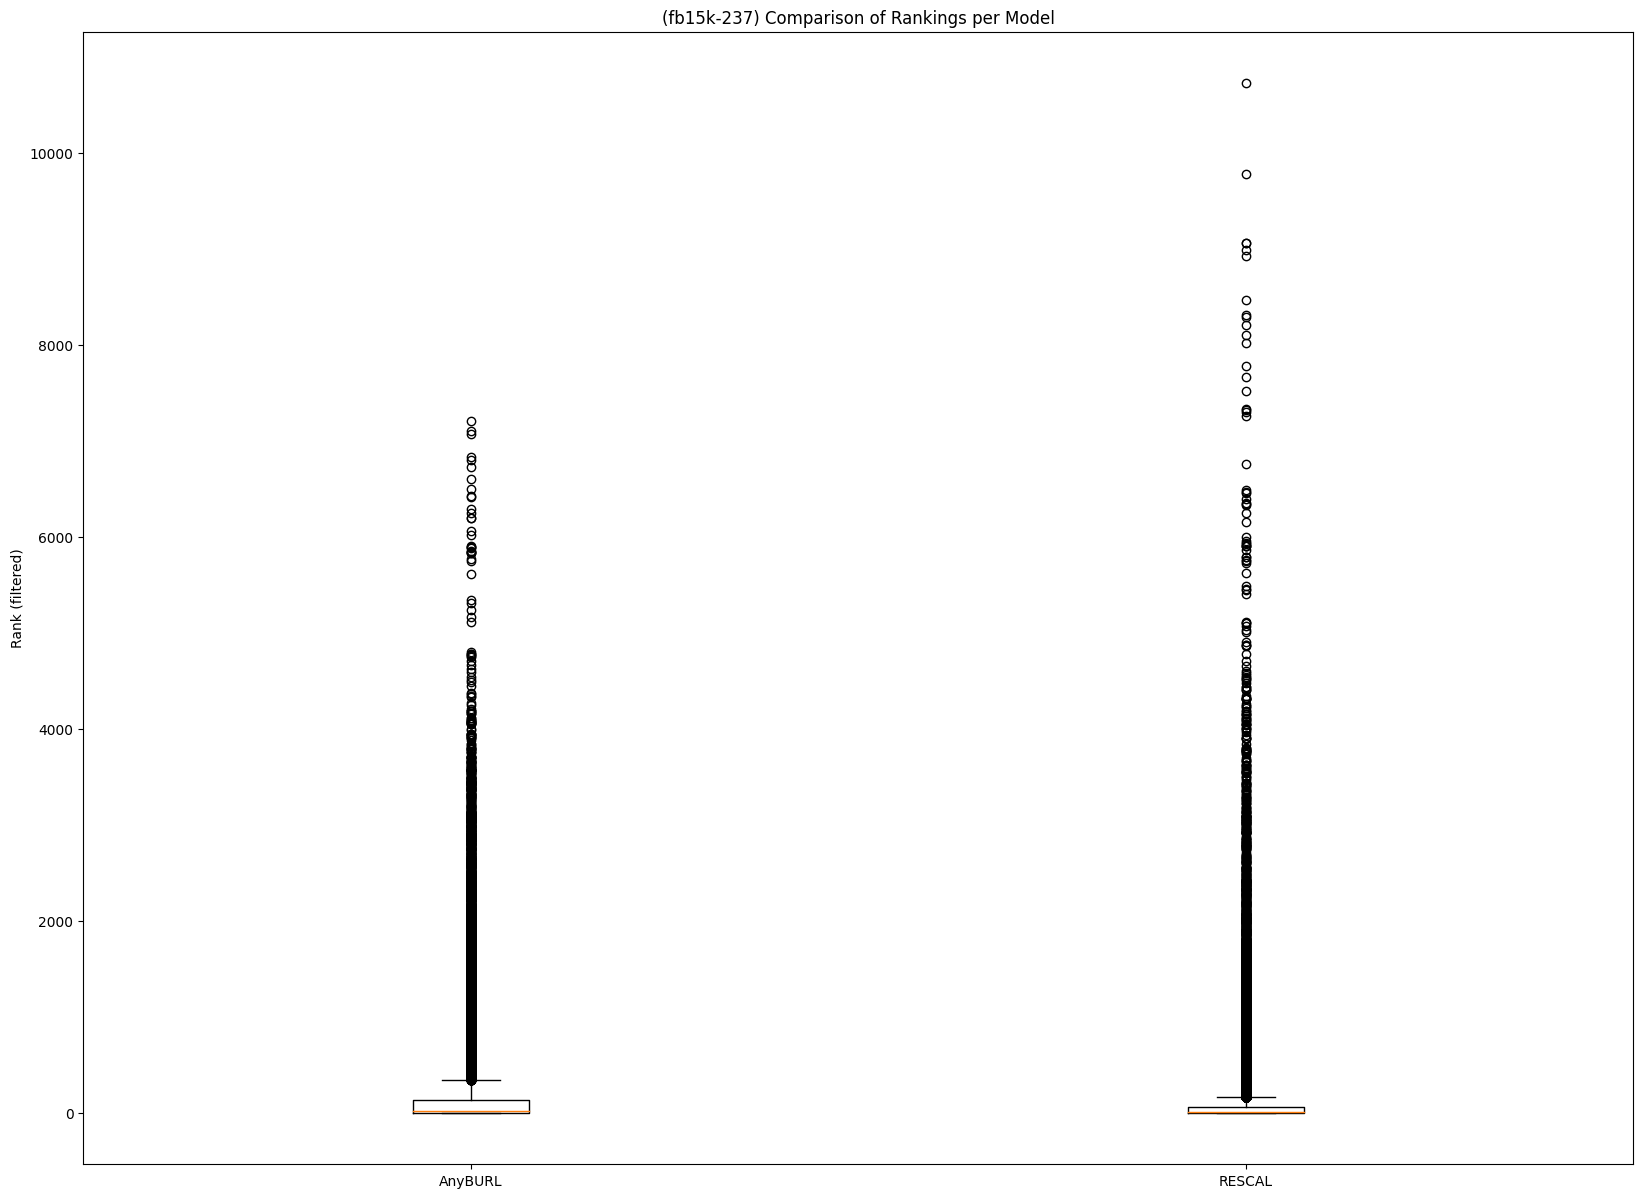

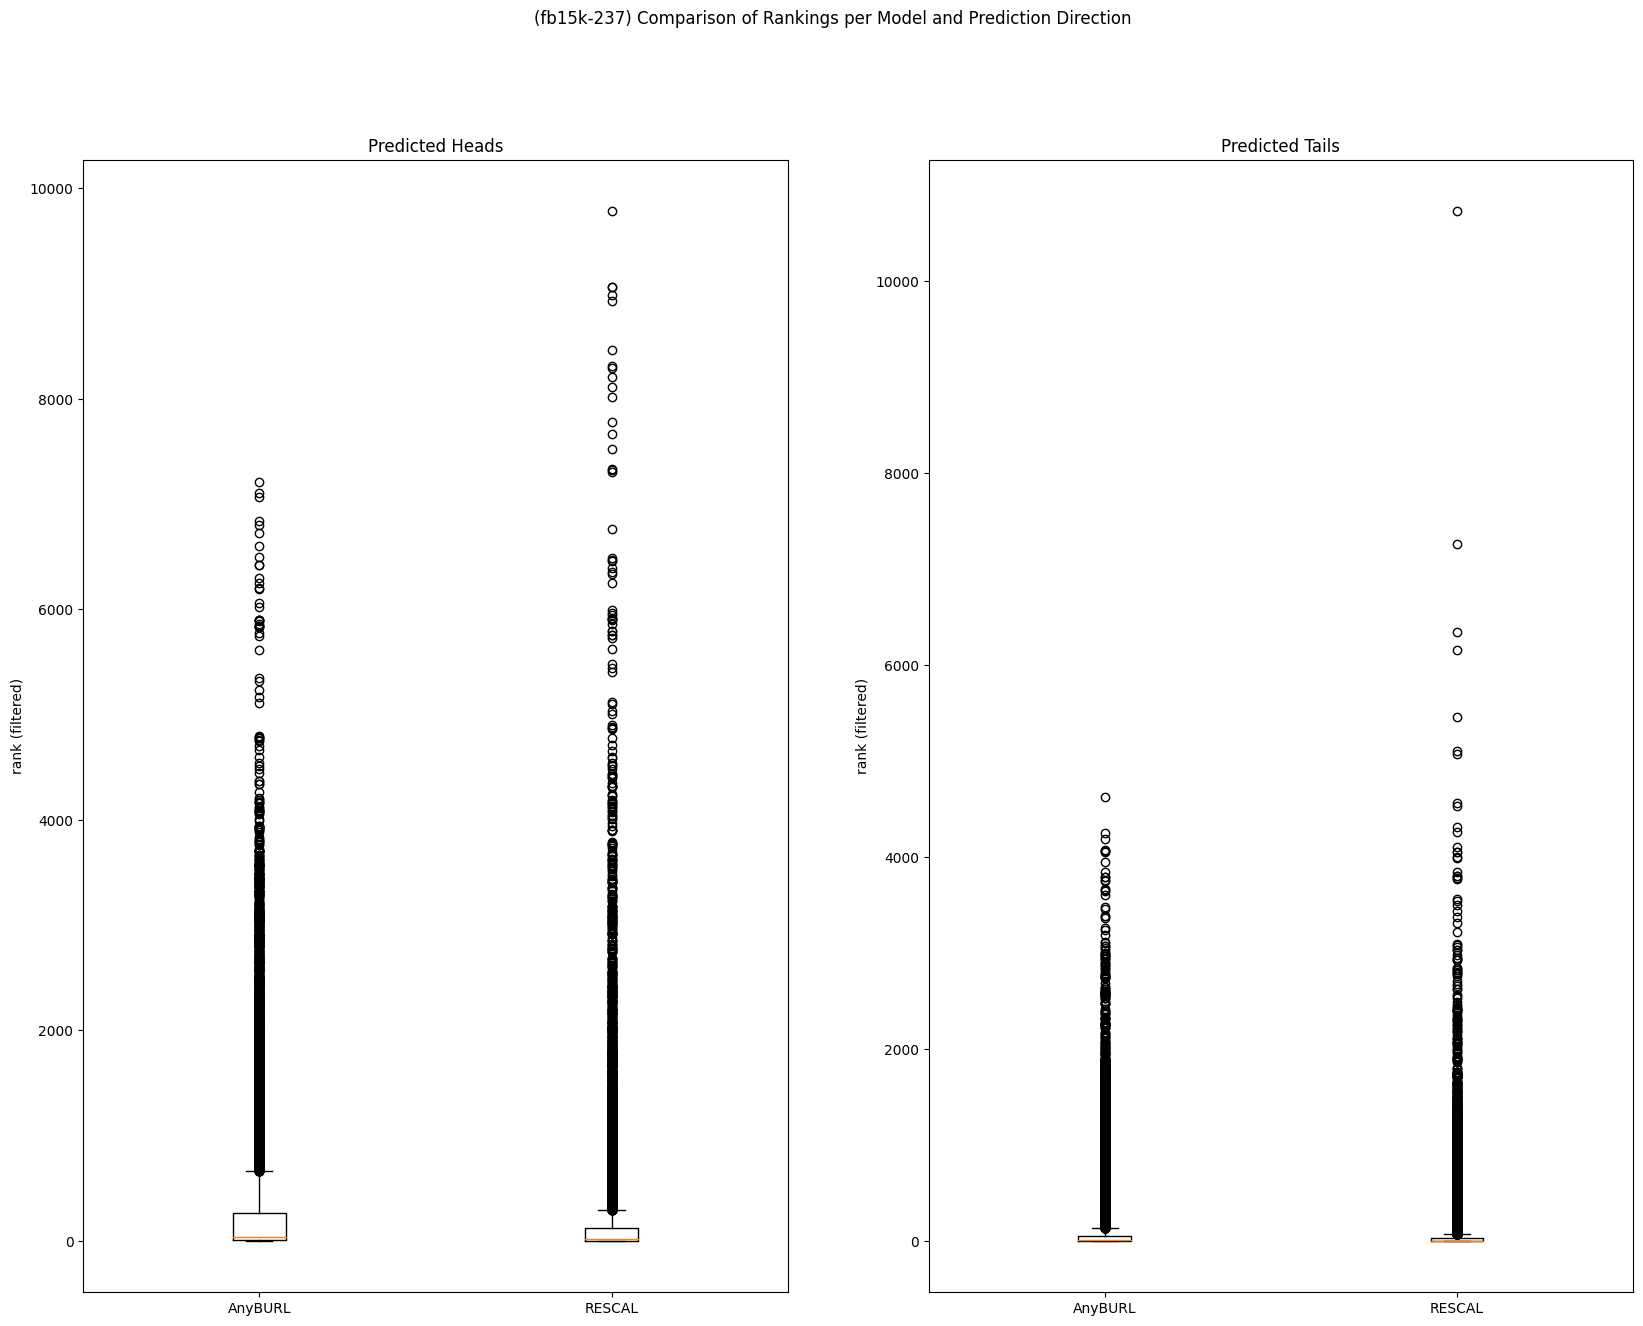

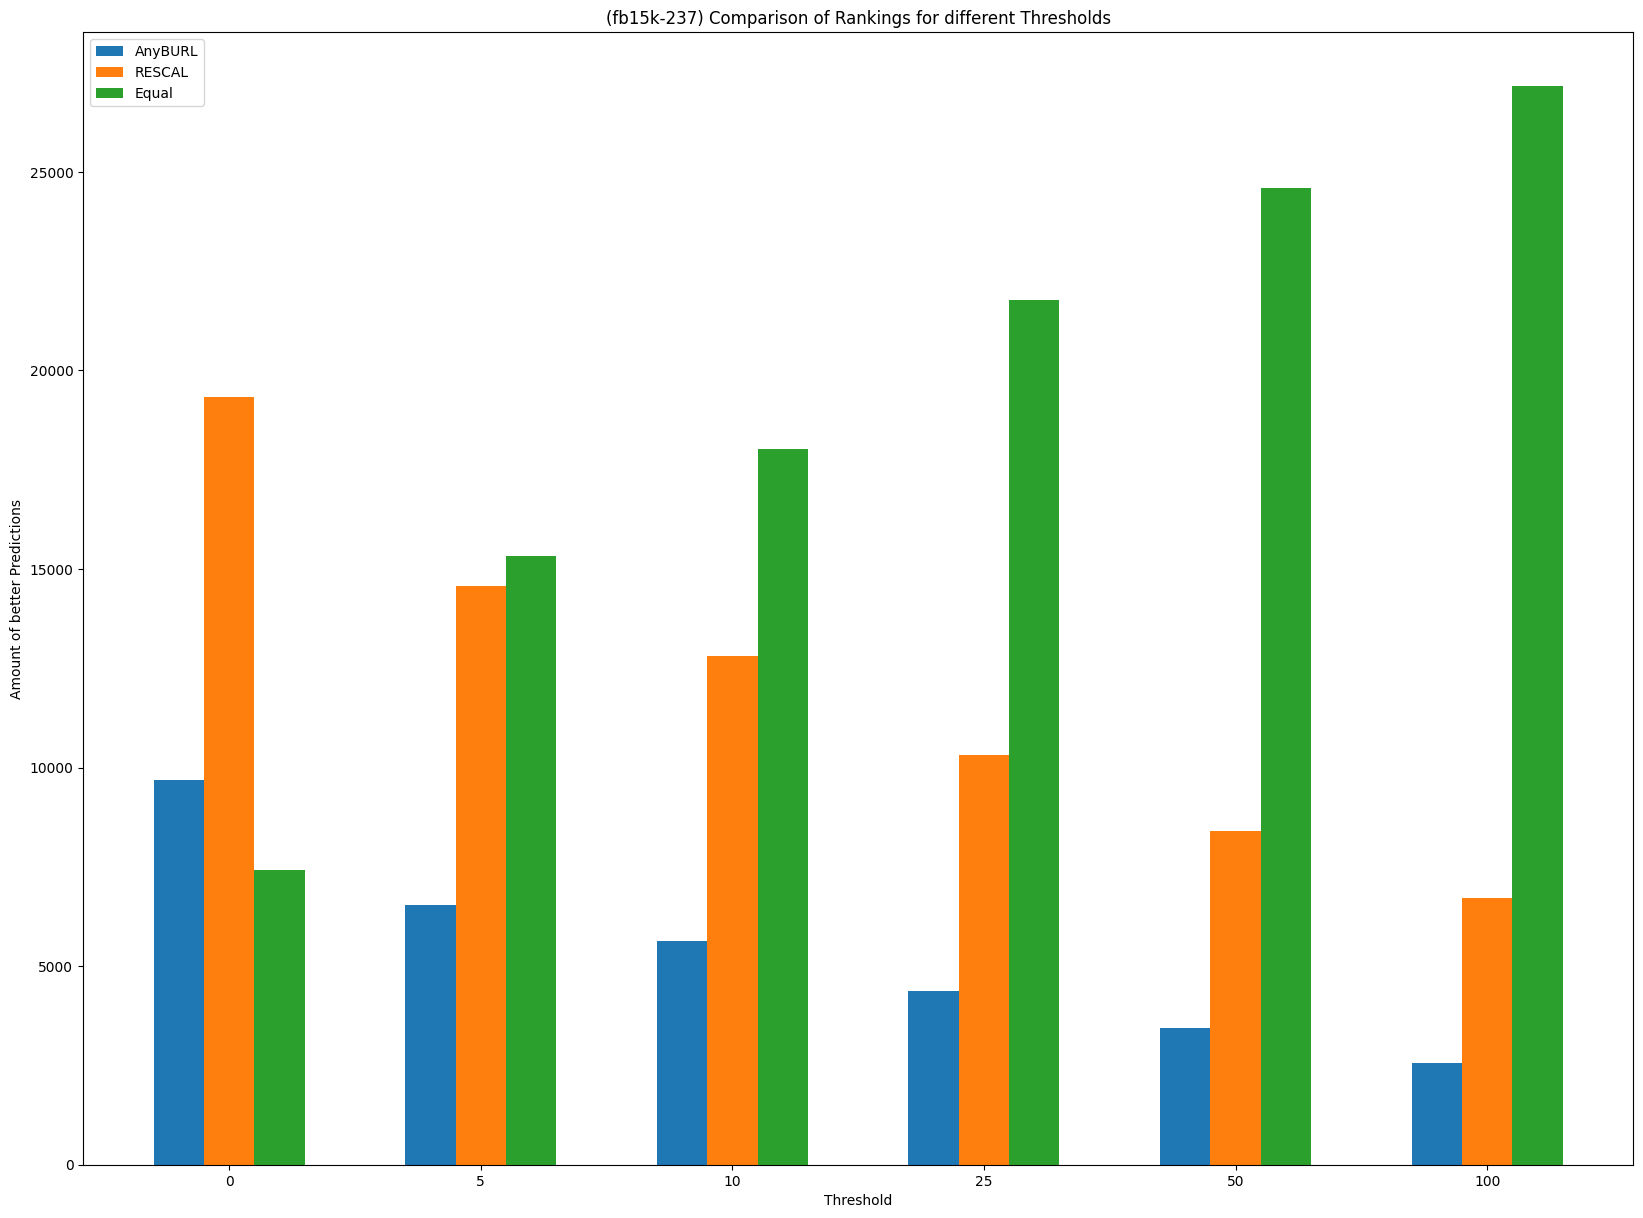

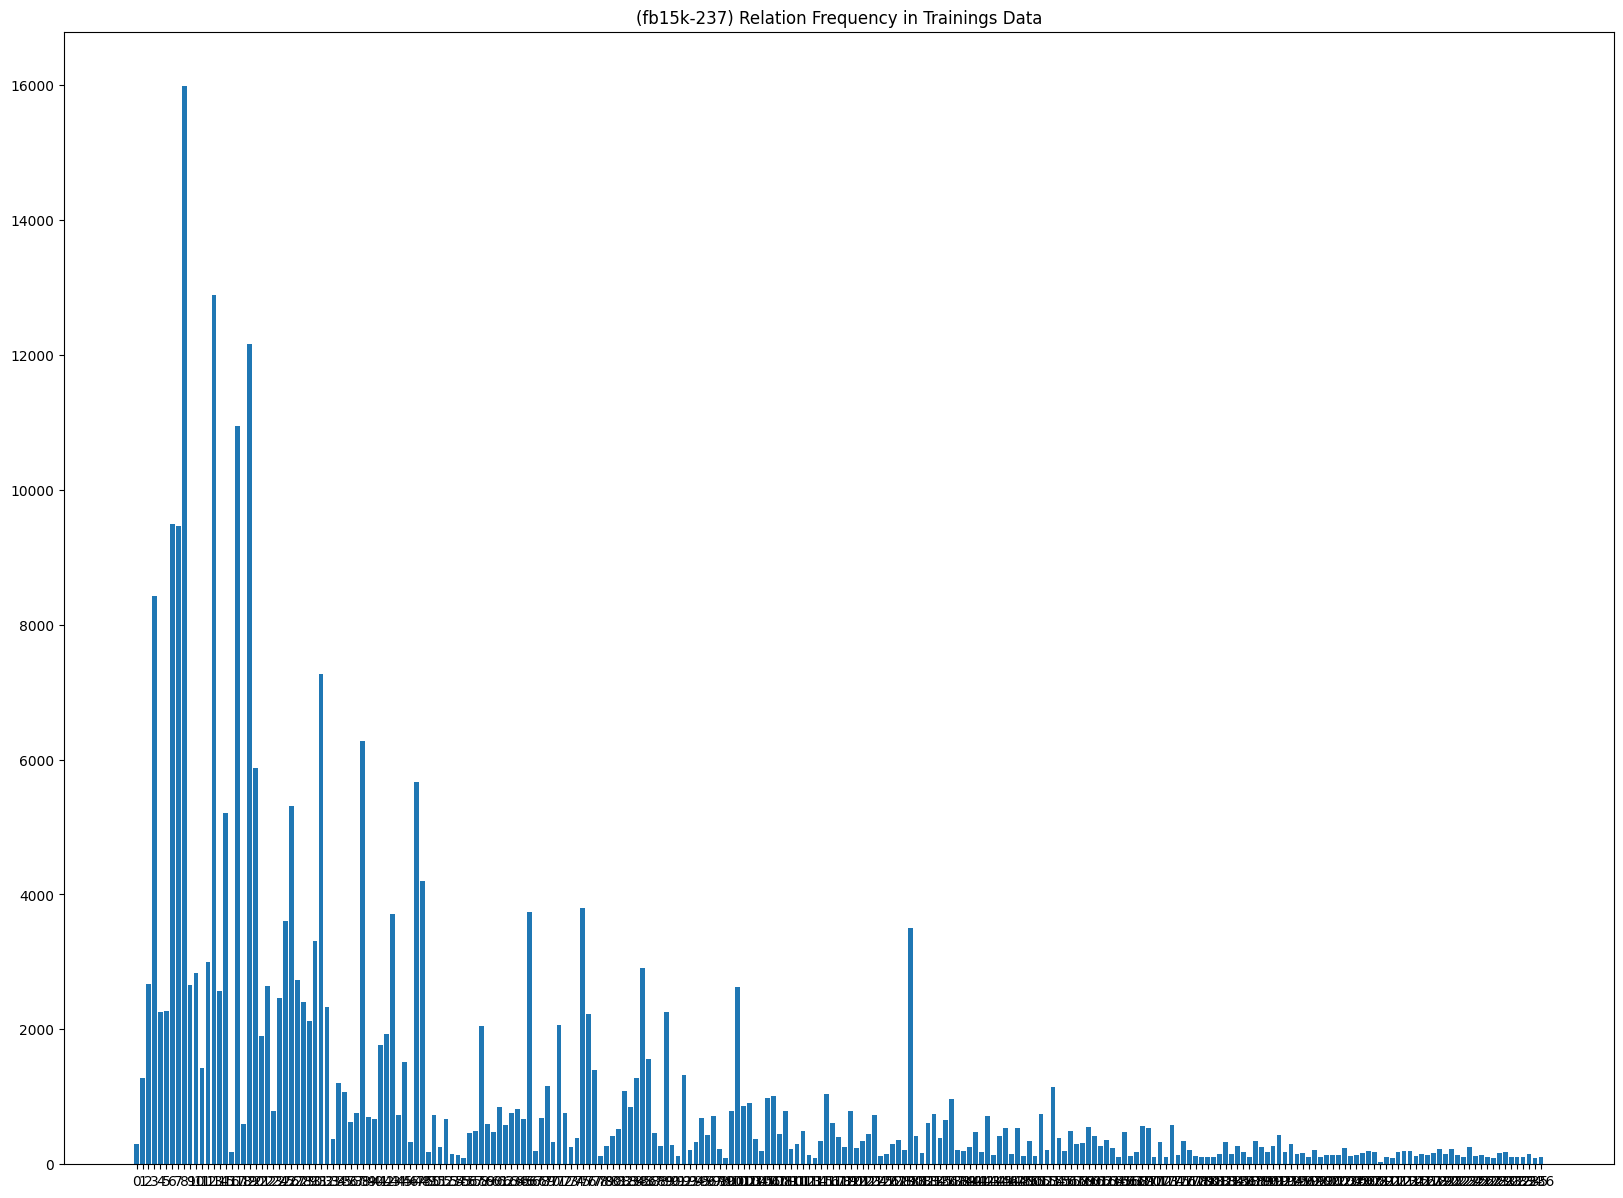

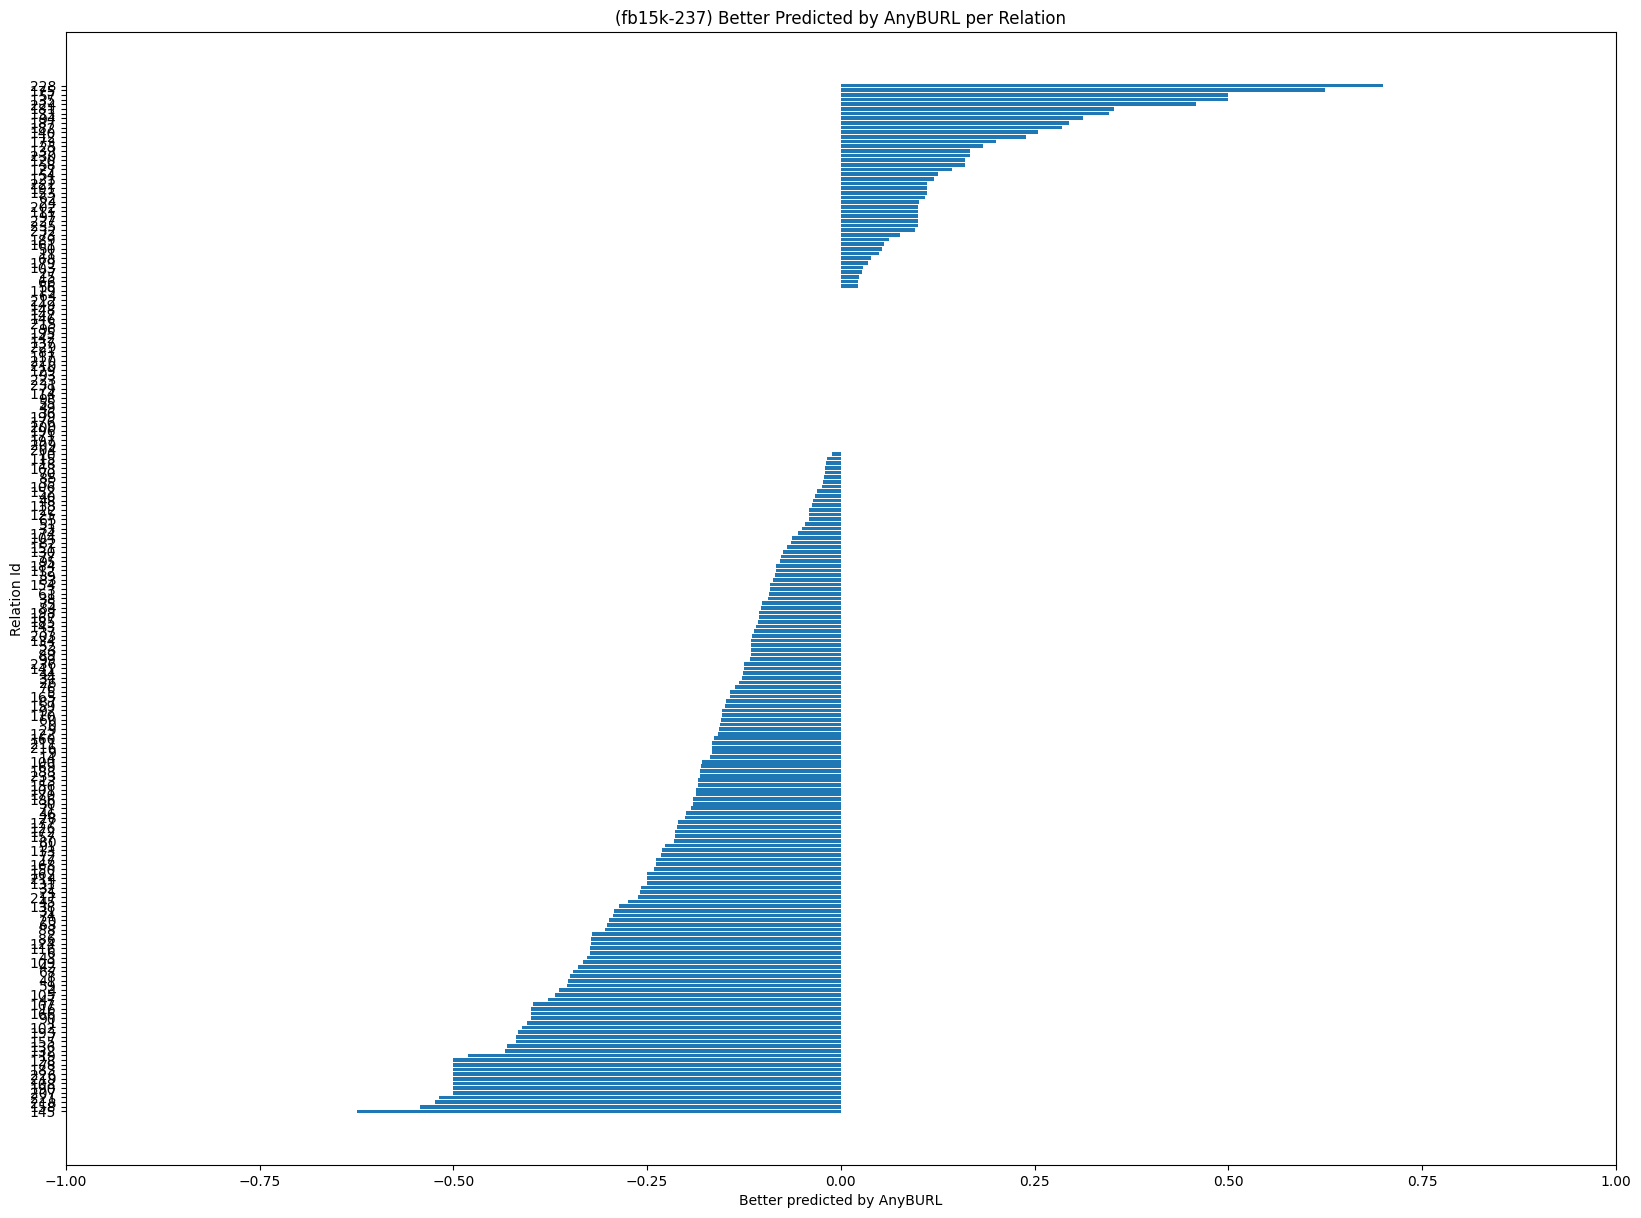

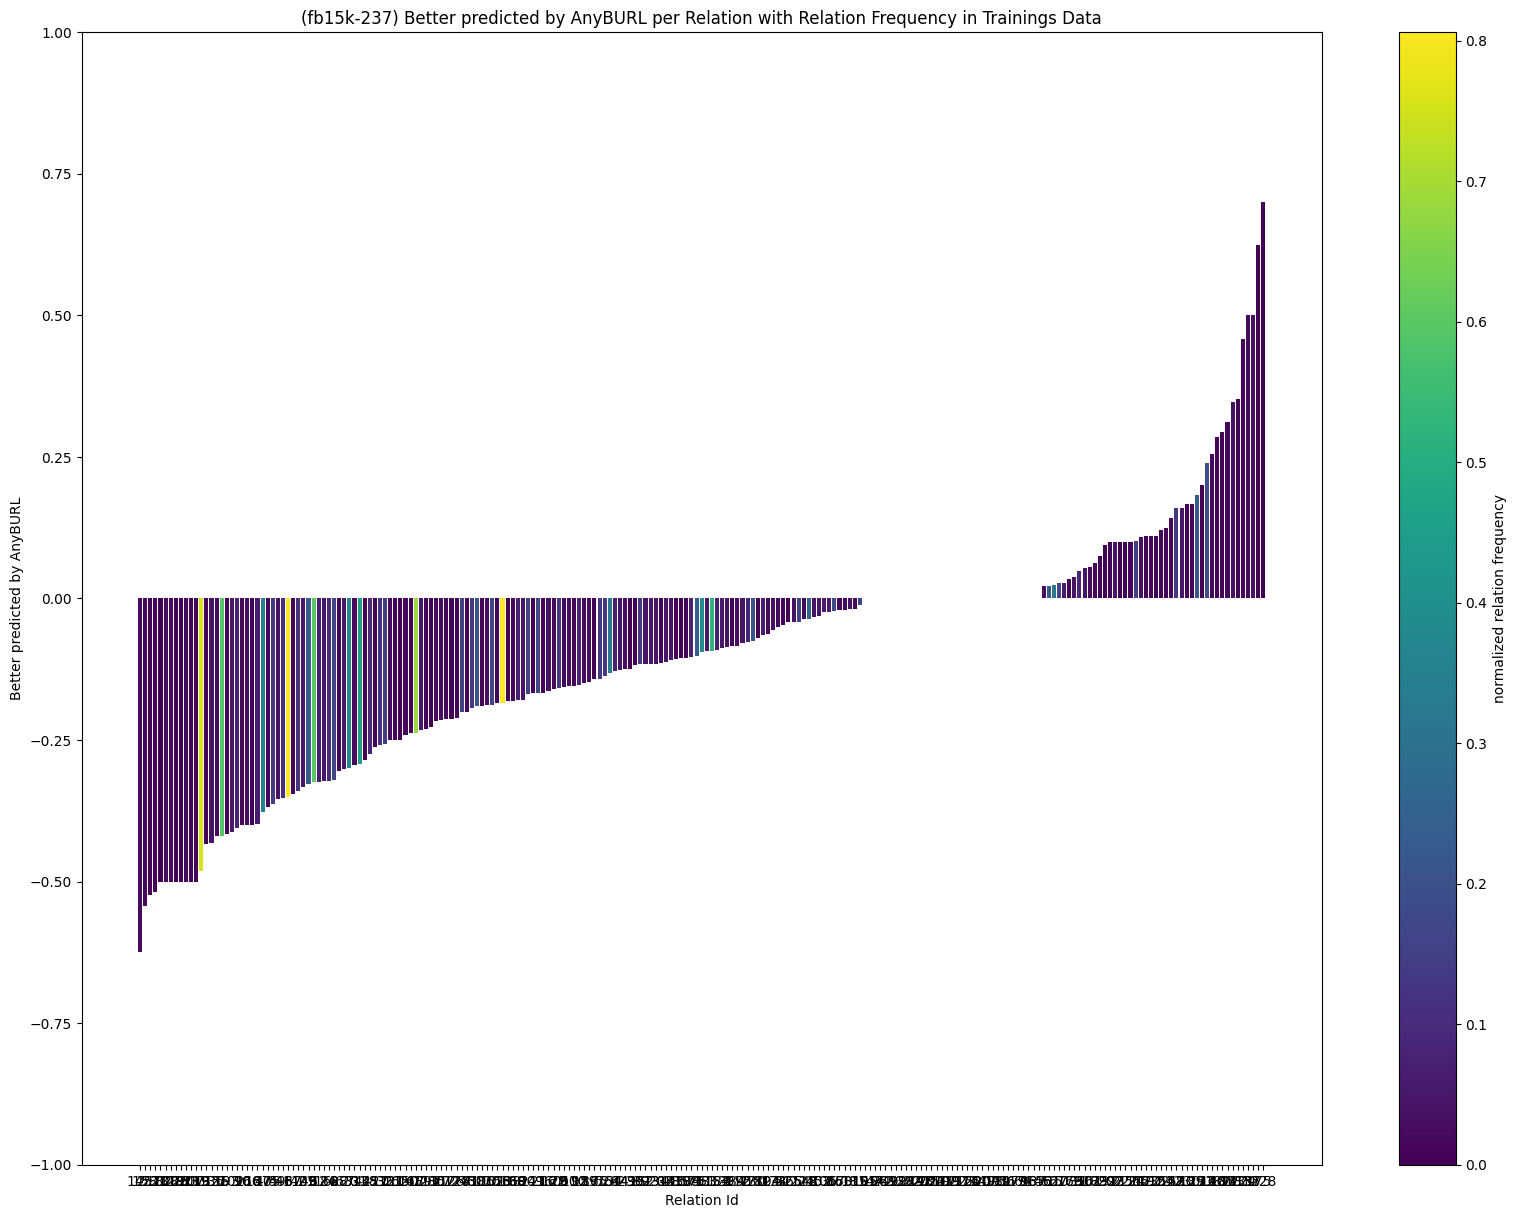

Loading configuration of dataset fb15k-237 from d:\files\git\kge\data\fb15k-237 ...
Loaded 237 keys from map relation_strings
  93372 distinct sp pairs in train
  56317 distinct po pairs in train


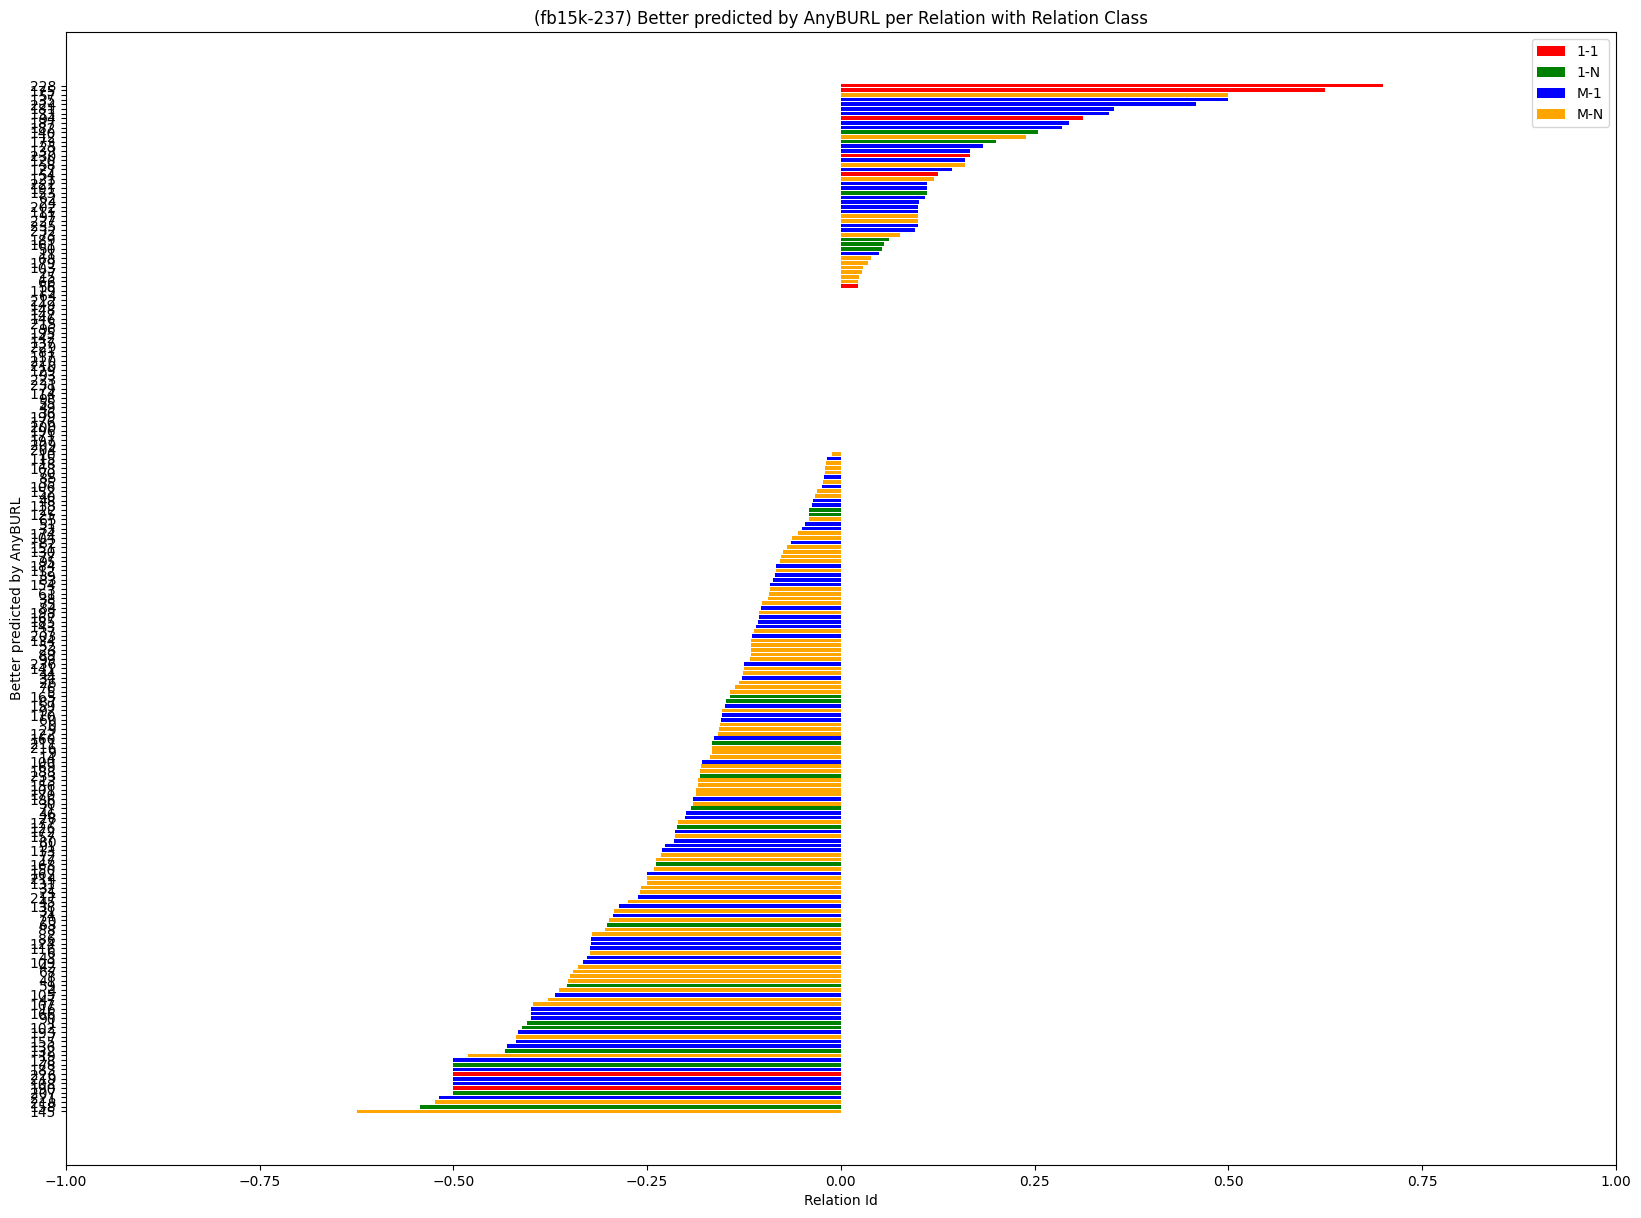

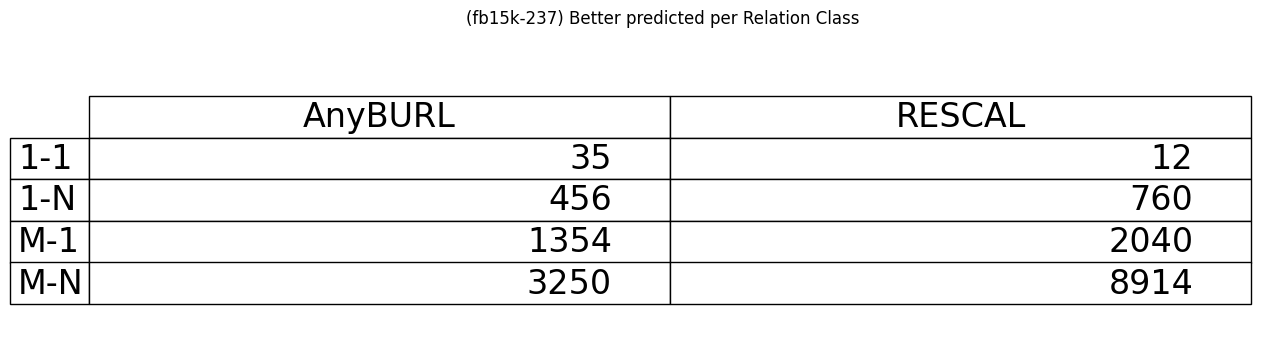

Working on wn18 - AnyBURL - ComplEx


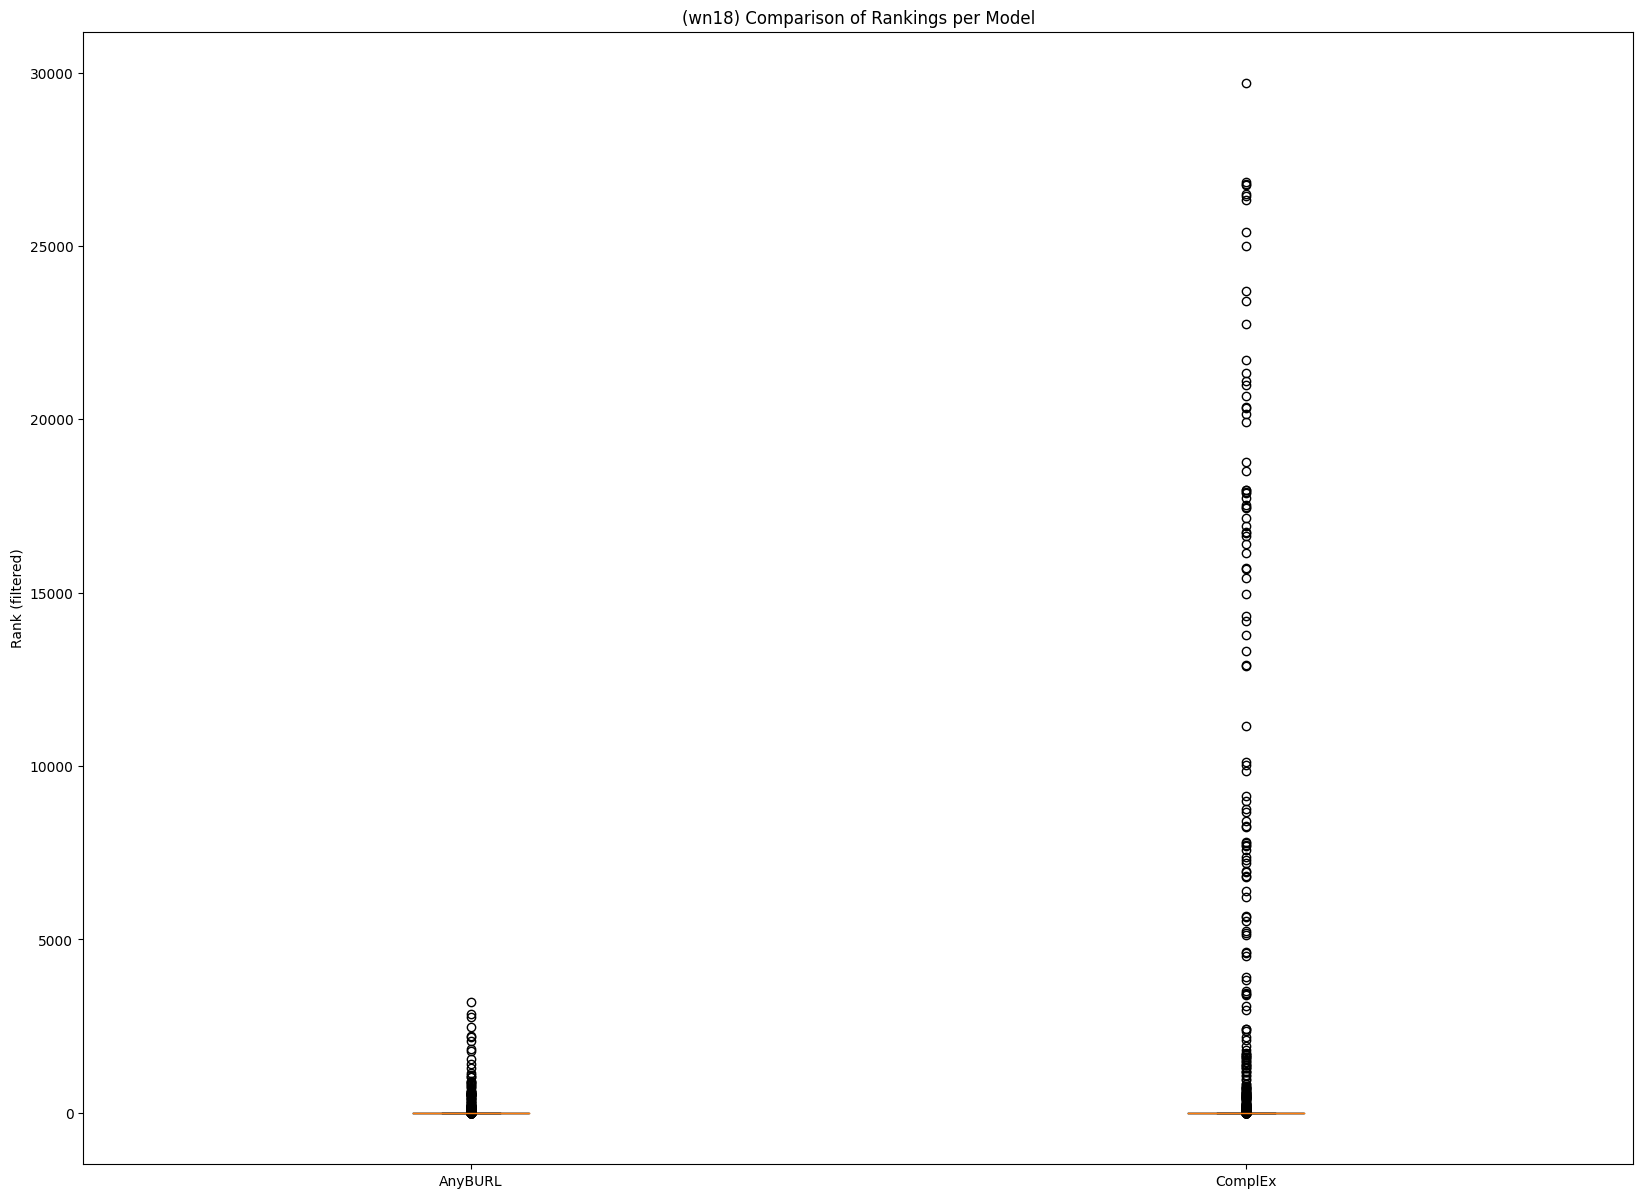

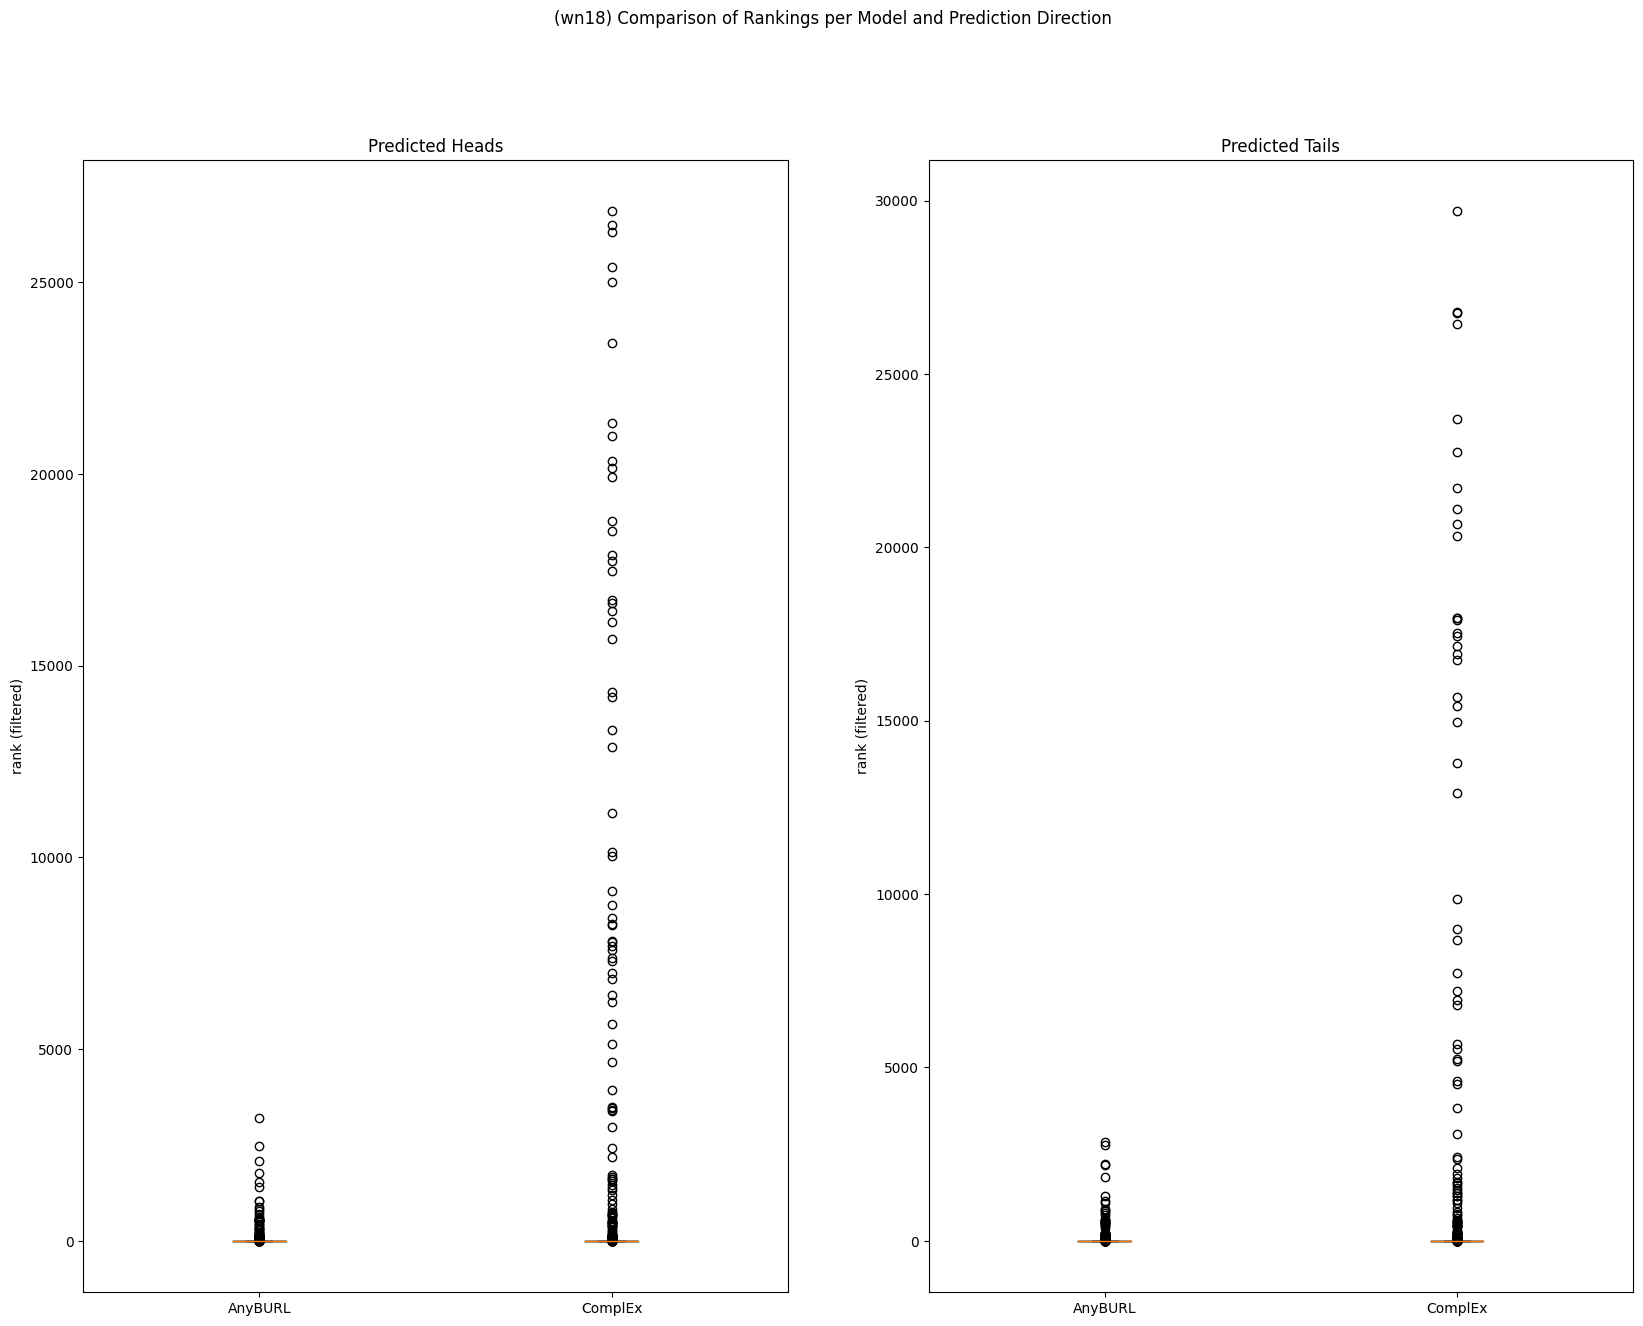

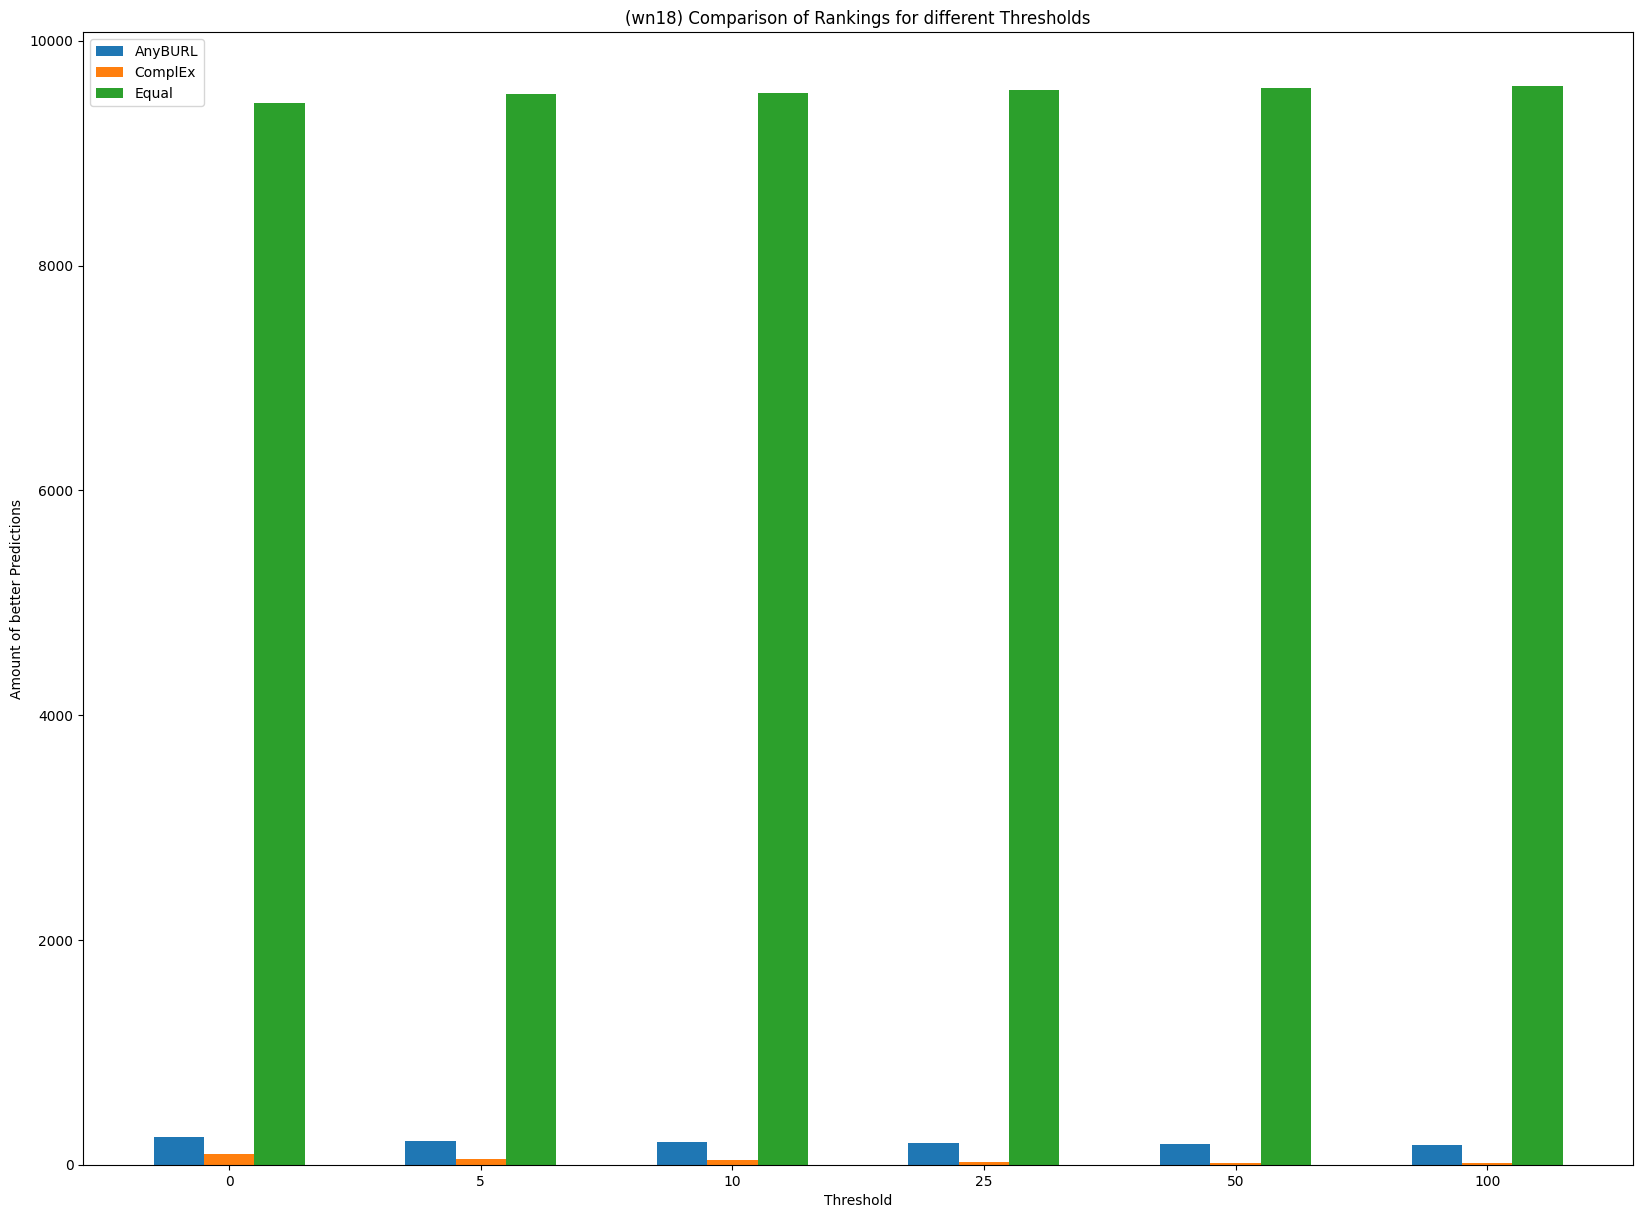

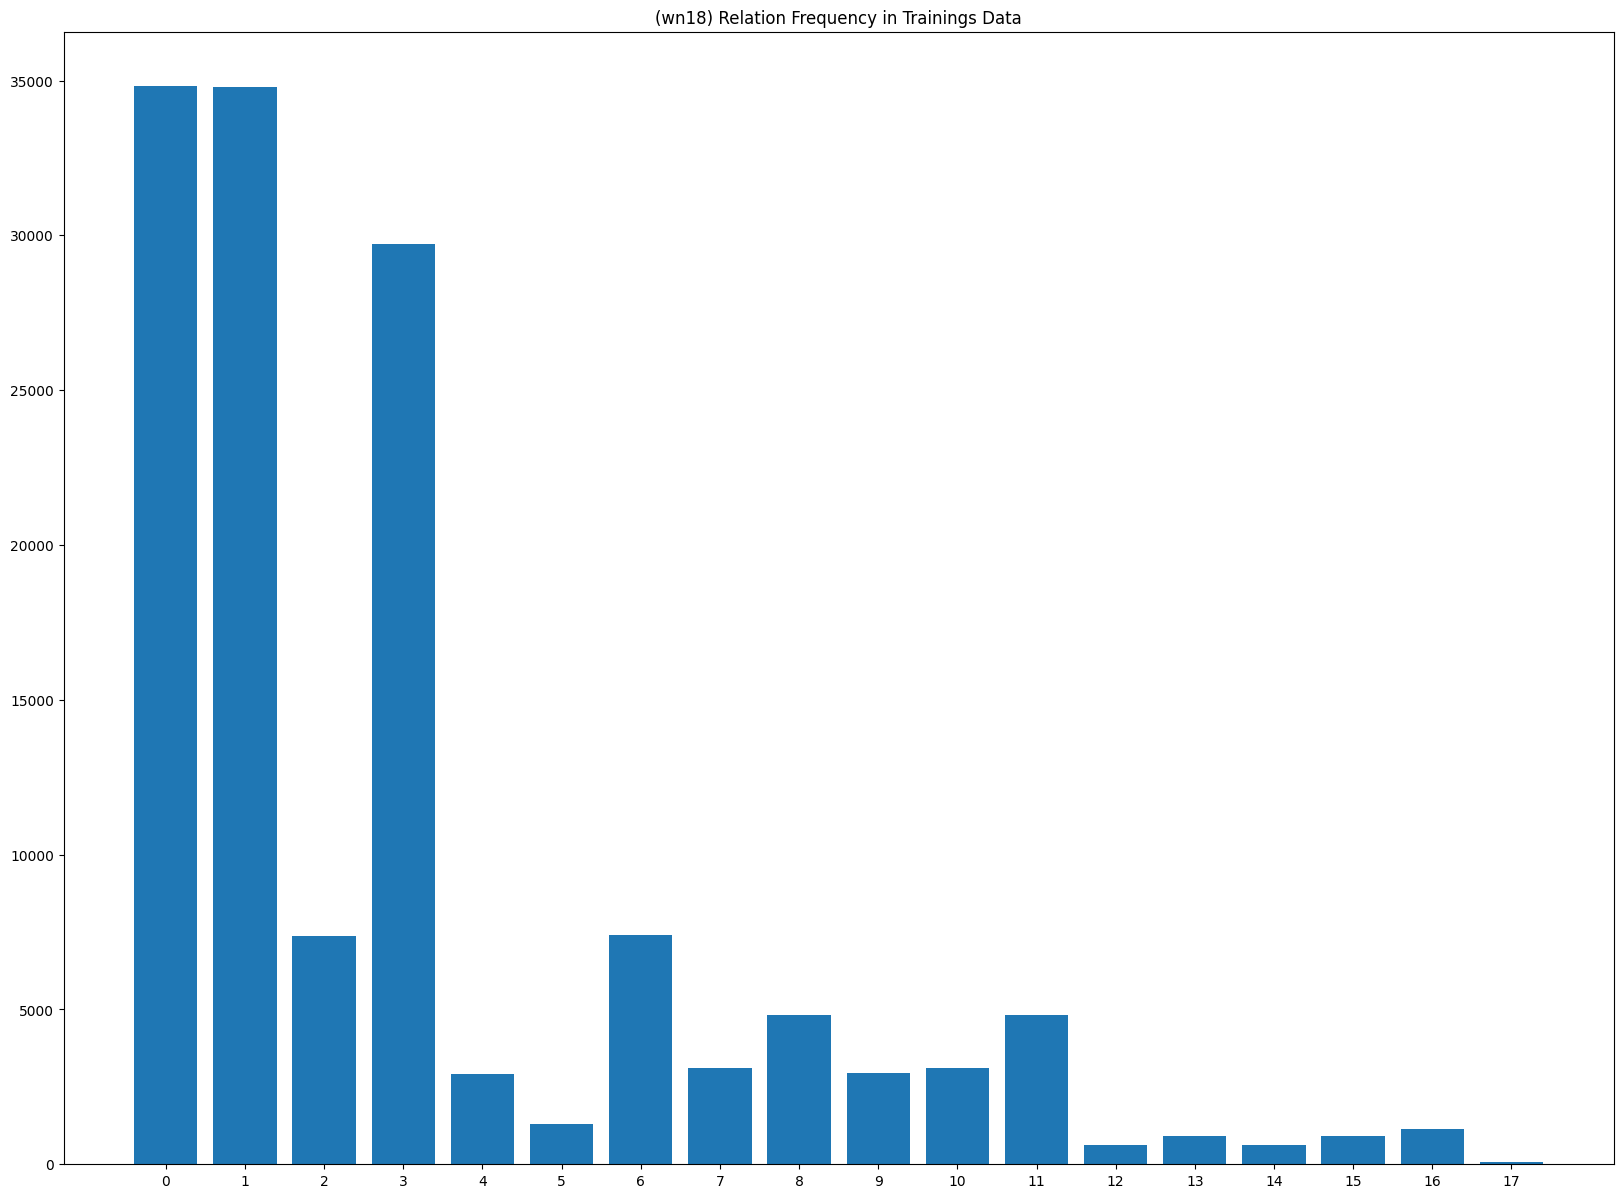

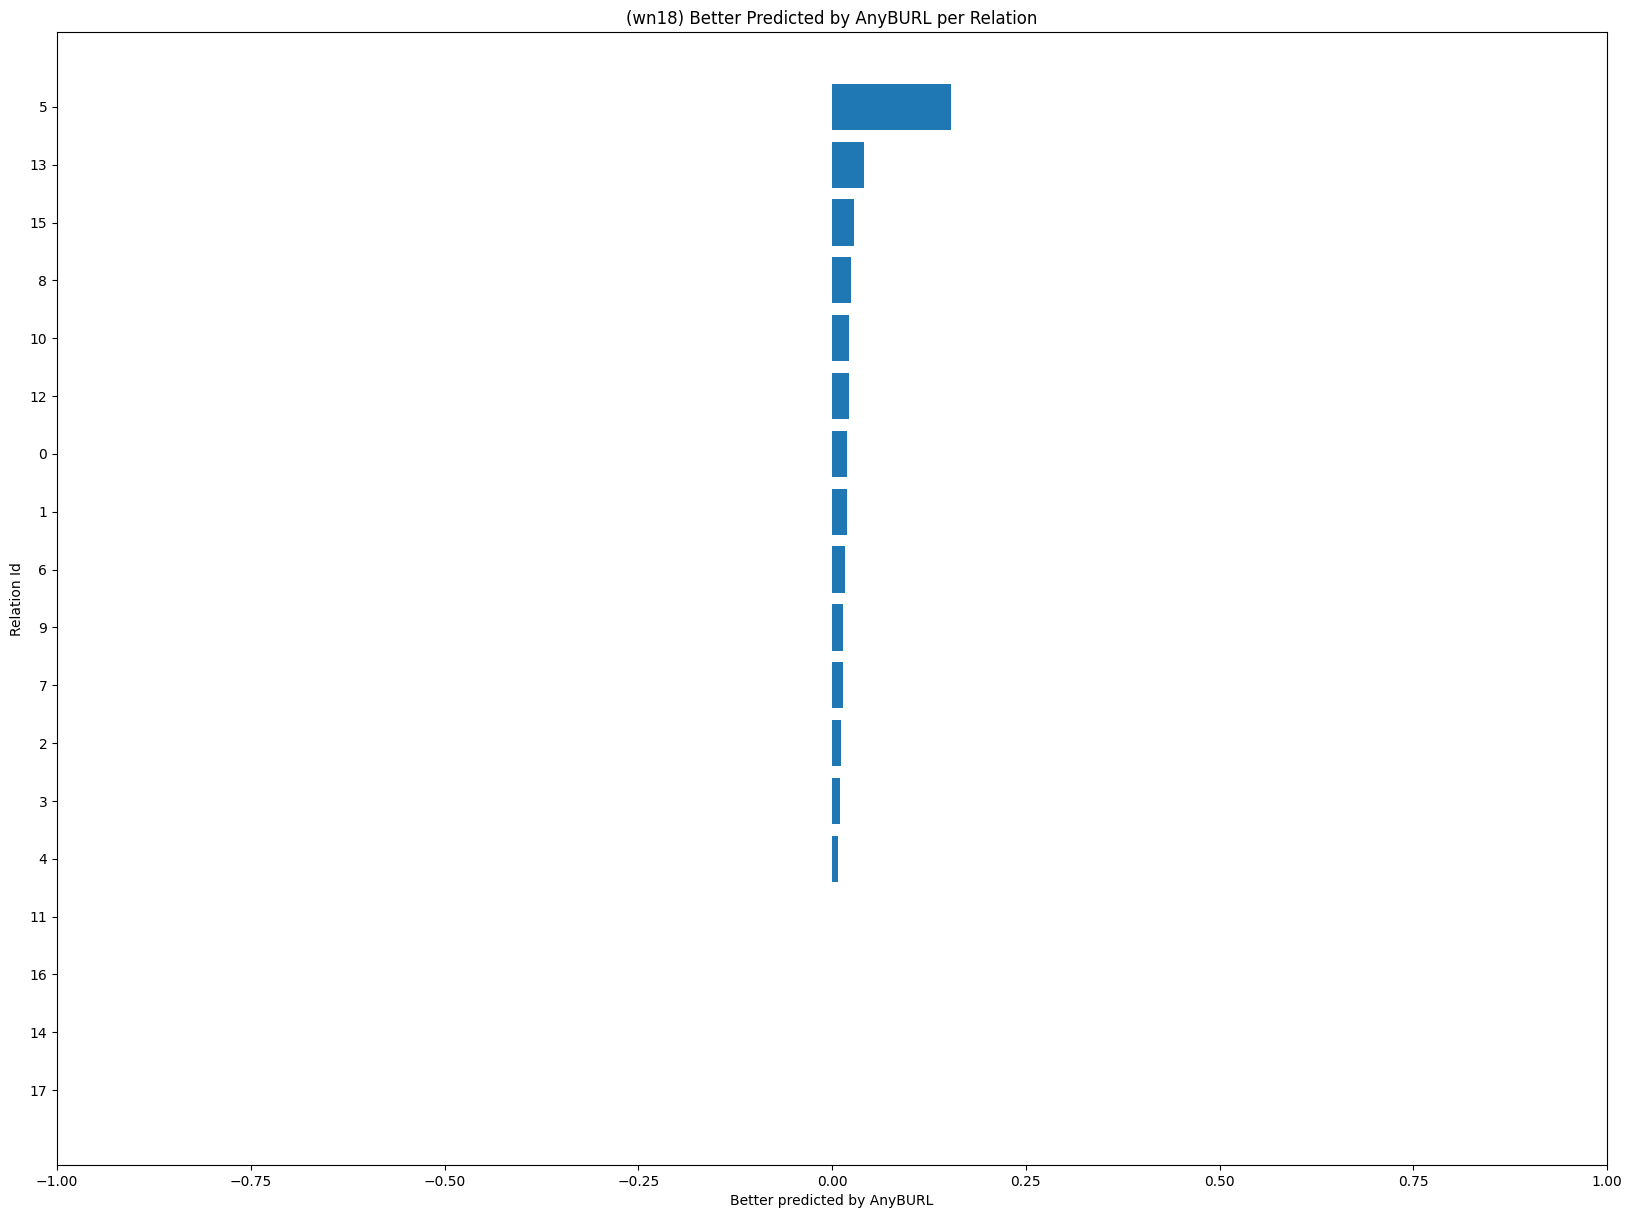

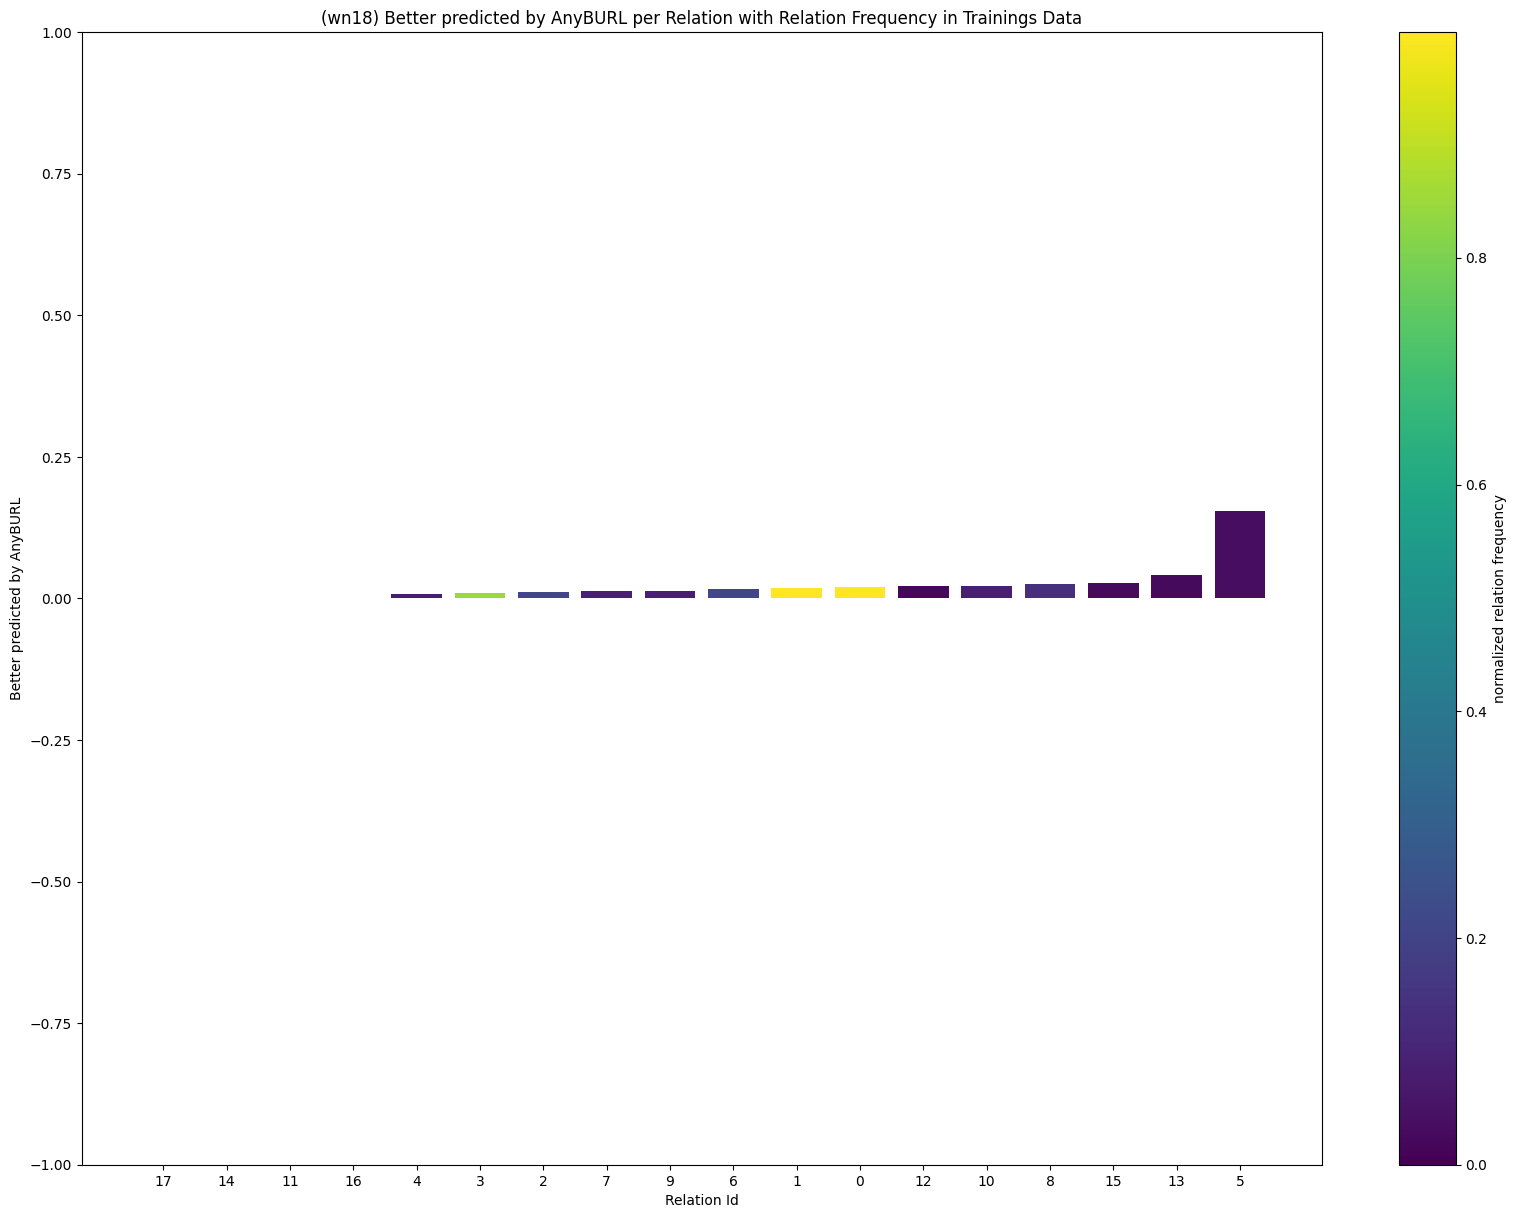

Loading configuration of dataset wn18 from d:\files\git\kge\data\wn18 ...
Loaded 18 keys from map relation_ids
Setting reciprocal_relations_model.base_model.relation_embedder.dropout to 0., was set to -0.355276912359341.
Loaded 18 keys from map relation_strings
  85532 distinct sp pairs in train
  85722 distinct po pairs in train


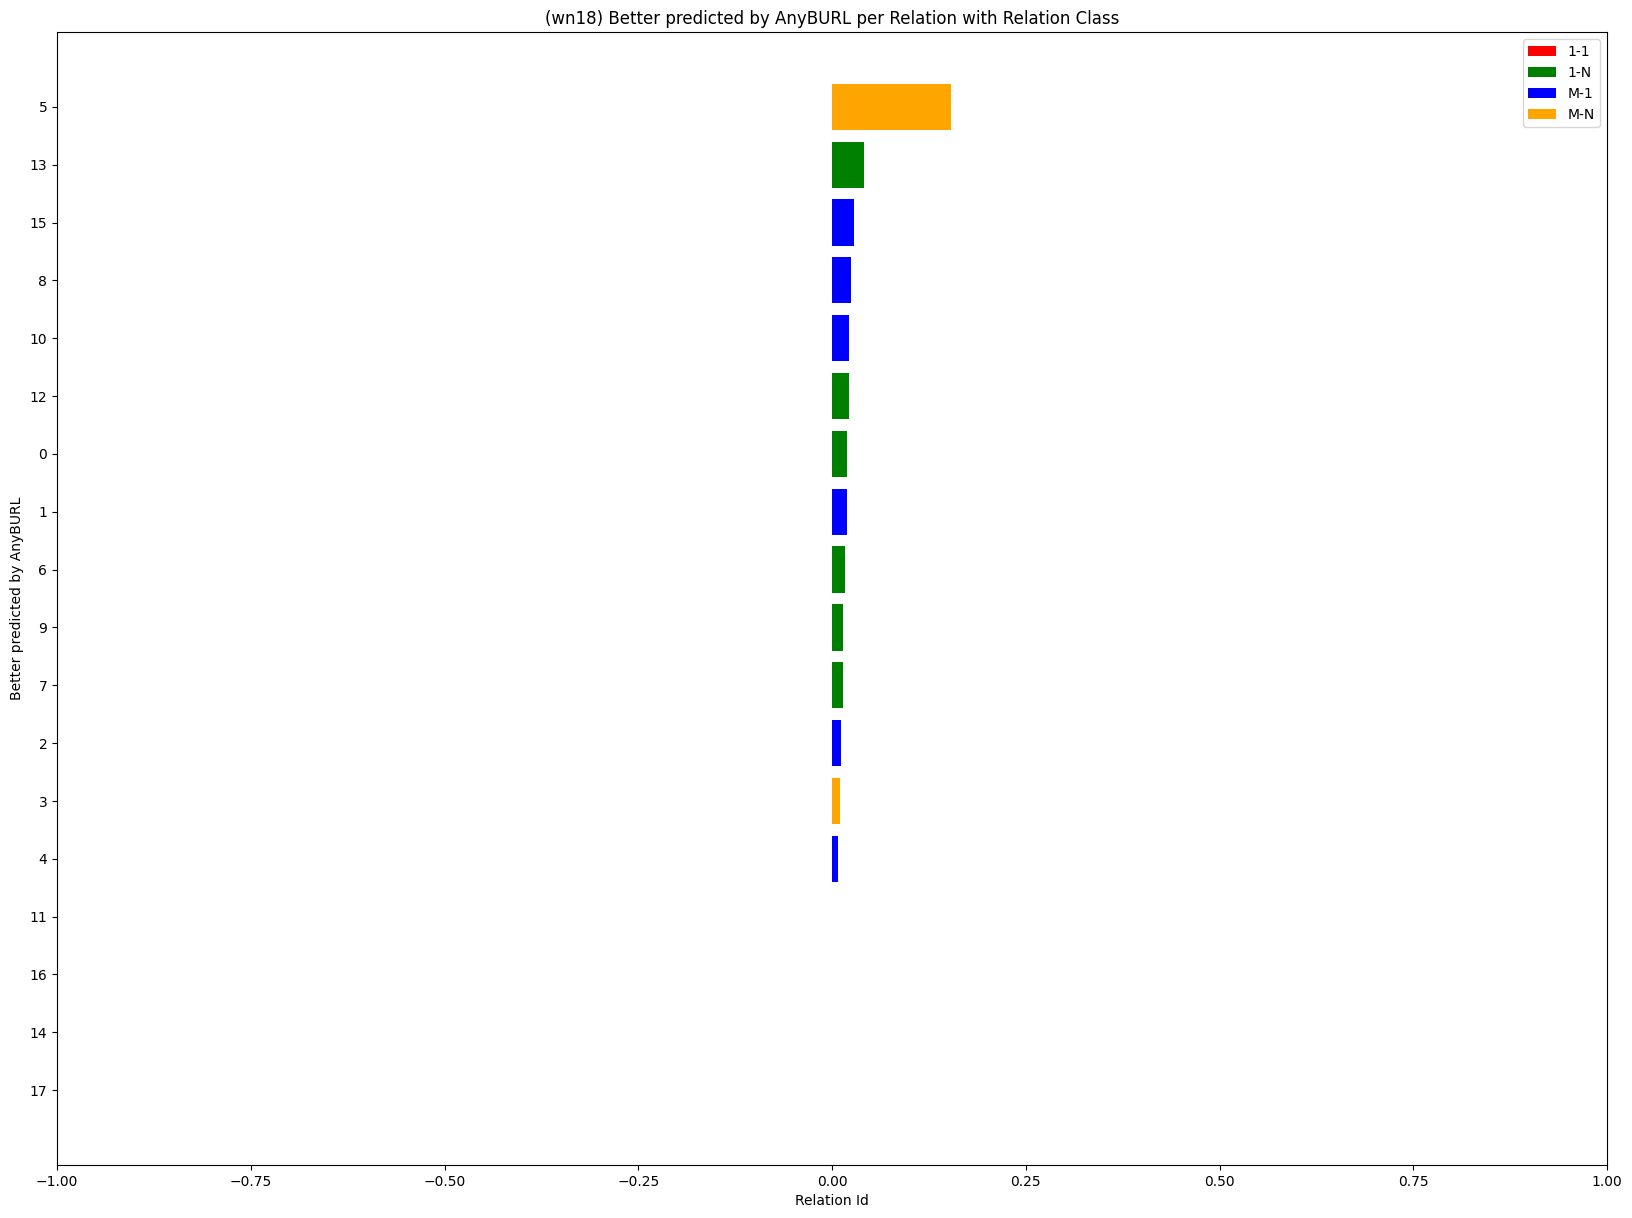

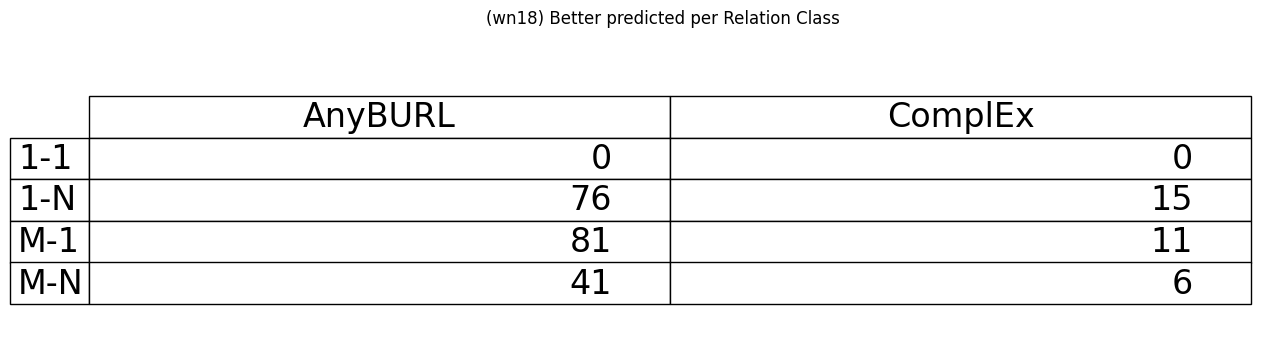

In [6]:
for dataset_name in datasets:
    for (symbolic, symbolic_name) in symbolic_models:
        for (subsymbolic, subsymbolic_name) in subsymbolic_models:
            if os.path.exists(os.path.join('experiments', f'{dataset_name}_{symbolic}')) and os.path.exists(os.path.join('experiments', f'{dataset_name}_{subsymbolic}_1')):
                print(f'Working on {dataset_name} - {symbolic_name} - {subsymbolic_name}')
                df = get_prediction_data(dataset_name, symbolic, subsymbolic)
                df = df[['h_id', 'r_id', 't_id', 'predicted_head', 'rank_filtered_anyburl', 'rank_filtered_kge']]
                df = df.dropna()
                pdf = PdfPages(f'analysis_for_{get_formatted_data_name(dataset_name, symbolic, subsymbolic)[0:-4]}.pdf')
                show_all_graphs(df, dataset_name, bp_threshold)
                pdf.close()